In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df= pd.read_pickle("../data/raw_data/pension_news.pkl")

In [19]:
df.head()

title  \
0       실직 중 지역가입자…국민연금 보험료 50%·최대 12개월 지원   
1            국민연금, 4월 말 수익률 -3.79%…전월보다 악화   
2     [포착] “상식 있는 정부라면 건강보험·국민연금 책임부터 다해야”   
3  ‘더 내고 덜 받는’ 국민연금 개혁, 찬성 48%·반대 45%[NBS]   
4     연금 200만원 받는 70대 피부양자, 9월부턴 건보료 낸다…얼마   

                                                 doc  \
0  [이데일리 양희동 기자] 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중...   
1                               신혜선 "인생은 길고 역할은 많아요"   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 ‘국민연금-건강보험 국가 책임 강...   
3                                                      
4  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...   

              published_date     ch  
0  2022-06-30 10:17:29+09:00  naver  
1  2022-06-29 15:36:43+09:00  naver  
2  2022-06-30 12:08:35+09:00  naver  
3        2022-06-30 00:00:00  naver  
4  2022-06-29 17:23:07+09:00  naver

In [20]:
df['published_date']= pd.to_datetime(df['published_date'], errors='coerce', utc=True)

## **publish_date에 null 값의 갯수 확인**

In [21]:
pd.isnull(df['published_date']).sum()

10755

## **publish_date 값이 NA가 아닌 dataframe 따로 저장**

In [22]:
df_publish_date= df.loc[pd.notna(df['published_date']),:]

In [23]:
df_publish_date = df_publish_date.reset_index(drop=True) # 인덱스 재설정

In [24]:
df_publish_date

title  \
0               실직 중 지역가입자…국민연금 보험료 50%·최대 12개월 지원   
1                    국민연금, 4월 말 수익률 -3.79%…전월보다 악화   
2             [포착] “상식 있는 정부라면 건강보험·국민연금 책임부터 다해야”   
3          ‘더 내고 덜 받는’ 국민연금 개혁, 찬성 48%·반대 45%[NBS]   
4             연금 200만원 받는 70대 피부양자, 9월부턴 건보료 낸다…얼마   
...                                            ...   
47329                      신한금융, 주총서 진옥동 회장 선임안 의결   
47330        하나금융 주총, 이승열 행장 비상임이사 선임…분기배당 위한 정관변경   
47331             1월 국세 수입 6.8조원 감소…나라살림은 7.3조원 흑자   
47332  [비즈토크<상>] 닻 올리기 전 몰아치는 폭풍우…KT 윤경림호 무사히 출범할까   
47333              주총 시즌 막 올랐다…'뜨거운 주총장' 예고한 기업 어디   

                                                     doc  \
0      [이데일리 양희동 기자] 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중...   
1                                   신혜선 "인생은 길고 역할은 많아요"   
2      30일 오전 서울 용산 대통령 집무실 앞에서 열린 ‘국민연금-건강보험 국가 책임 강...   
3                                                          
4      정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...   
...                                                  ...   
47329                                                      
47330  하나금융 주총, 이승열 행장 비상임이사 선임…분기배당 위한 정관변경\n\n입력: 2...   
47331                                                      
47332  [비즈토크<상>] 닻 올리기 전 몰아치는 폭풍우…KT 윤경림호 무사히 출범할까\n\...   
47333  주총 시즌 막 올랐다…'뜨거운 주총장' 예고한 기업 어디\n\n입력: 2023.03...   

                 published_date     ch  
0     2022-06-30 01:17:29+00:00  naver  
1     2022-06-29 06:36:43+00:00  naver  
2     2022-06-30 03:08:35+00:00  naver  
3     2022-06-30 00:00:00+00:00  naver  
4     2022-06-29 08:23:07+00:00  naver  
...                         ...    ...  
47329 2023-03-23 00:00:00+00:00  naver  
47330 2023-03-24 04:42:45+00:00  naver  
47331 2023-03-16 00:00:00+00:00  naver  
47332 2023-03-12 03:00:02+00:00  naver  
47333 2023-03-14 02:03:09+00:00  naver  

[47334 rows x 4 columns]

In [ ]:
pd.to_pickle(df_publish_date, '../data/raw_data/df_publish_date_nona.pkl')

## **데이터 전처리 (publish_date 값이 na인 것도 포함)**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58089 entries, 0 to 58088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   title           58089 non-null  object             
 1   doc             58089 non-null  object             
 2   published_date  47334 non-null  datetime64[ns, UTC]
 3   ch              58089 non-null  object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 1.8+ MB


In [27]:
df.drop(columns=['published_date'], axis=1, inplace=True)

In [28]:
df.head()

title  \
0       실직 중 지역가입자…국민연금 보험료 50%·최대 12개월 지원   
1            국민연금, 4월 말 수익률 -3.79%…전월보다 악화   
2     [포착] “상식 있는 정부라면 건강보험·국민연금 책임부터 다해야”   
3  ‘더 내고 덜 받는’ 국민연금 개혁, 찬성 48%·반대 45%[NBS]   
4     연금 200만원 받는 70대 피부양자, 9월부턴 건보료 낸다…얼마   

                                                 doc     ch  
0  [이데일리 양희동 기자] 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중...  naver  
1                               신혜선 "인생은 길고 역할은 많아요"  naver  
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 ‘국민연금-건강보험 국가 책임 강...  naver  
3                                                     naver  
4  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver

## **한글화**

In [11]:
import re

In [10]:
from tqdm import trange, notebook

In [32]:
# 제목, 본문, 댓글의 한글화
# 댓글 개수의 숫자화
for i in notebook.tqdm(range(len(df))):
    # title에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    df['title'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['title'][i]))
    
    # doc에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    df['doc'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['doc'][i]))

  0%|          | 0/58089 [00:00<?, ?it/s]

In [34]:
df.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3     더 내고 덜 받는 국민연금 개혁 찬성 48반대 45NBS   
4  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   

                                                 doc     ch  
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver  
1                                 신혜선 인생은 길고 역할은 많아요  naver  
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver  
3                                                     naver  
4  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver

## **결측 값 drop**

In [35]:
for i in range(len(df)): # 본문
    if (len(df['doc'][i]) < 2 or df['doc'][i].isspace() == True) or (len(df['title'][i]) < 2 or df['title'][i].isspace() == True): # 문서 내용이 두글자 미만이나 공백문서로만 되있는 경우 결측값 처리
        df = df.drop(i) # 해당 행 삭제
print("ok")

ok


In [36]:
df.shape

(52029, 3)

In [37]:
df= df.reset_index(drop=True)
df.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver  
1                                 신혜선 인생은 길고 역할은 많아요  naver  
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver  
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver  
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver

In [38]:
from konlpy.tag import Komoran # 한국어 형태소 분석을 위해 konlpy 로부터 Komoran 클래스를 import
komoran = Komoran() # Komoran 클래스의 인스턴스 생성

## **제목 토큰화**

In [39]:
title_token_list = [] # 제목의 형태소를 담아낼 리스트
title_token_noun = [] # 제목의 명사를 담아낼 리스트
for i in notebook.tqdm(range(len(df))):
    # komoran.pos() 메서드를 사용하여 형태소 분석 실시
    pos = komoran.pos(u'{}'.format(df['title'][i])) 
    
    # komoran.nouns() 메서드를 사용하여 길이가 2이상인 명사를 추출라고 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(df['title'][i])) if len(term) >1)
    
    title_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    title_token_noun.append(noun) # 추출한 명사를 리스트에 추가

  0%|          | 0/52029 [00:00<?, ?it/s]

### **본문 토큰화**

In [40]:
doc_token_list = [] # 본문의 형태소를 담아낼 리스트
doc_token_noun = [] # 본문의 명사를 담아낼 리스트
for i in notebook.tqdm(range(len(df))):    
    # komoran.pos() 메서드를 사용하여 형태소 분석 결과
    pos = komoran.pos(u'{}'.format(df['doc'][i]))
    
    # komoran.nouns() 메서드를 사용하여 명사만 추출, 길이가 2 이상인 명사만 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(df['doc'][i])) if len(term) >1)
    
    doc_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    doc_token_noun.append(noun) # 추출한 명사를 리스트에 추가

  0%|          | 0/52029 [00:00<?, ?it/s]

In [46]:
df['title_token_list_pos'] = title_token_list  # 형태소와 품사 리스트 
df['title_token_noun'] = title_token_noun      # 명사 리스트
df['doc_token_noun'] = doc_token_noun
df['doc_token_list_pos'] = doc_token_list
df.to_pickle("./pre_stopword.pkl")

In [2]:
import pandas as pd

In [ ]:
df = pd.read_pickle('./data/pre_stopword.pkl')


In [5]:
df

title  \
0             실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1                    국민연금 4월 말 수익률 379전월보다 악화   
2             포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3          연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4                국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   
...                                       ...   
52024   연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관   
52025               진옥동에 반대표 던진 국민연금업계 반응은 글쎄   
52026     하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까   
52028            주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디   

                                                     doc     ch  \
0      이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                     신혜선 인생은 길고 역할은 많아요  naver   
2      30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3      정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4      연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   
...                                                  ...    ...   
52024  연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...  naver   
52025  진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506  수정 ...  naver   
52026  하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...  naver   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...  naver   
52028  주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디입력 20230314 1103  ...  naver   

                                    title_token_list_pos  \
0      [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...   
1      [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...   
2      [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...   
3      [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...   
4      [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...   
...                                                  ...   
52024  [(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...   
52025  [(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...   
52026  [(하나, NR), (금융, NNP), (주총, NNG), (이승열, NNP), (...   
52027  [(비즈, NNP), (토크, NNP), (상, XSN), (닻, NNG), (올리...   
52028  [(주총, NNG), (시즌, NNP), (막, MAG), (오르, VV), (았,...   

                                    title_token_noun  \
0               [실직, 지역, 가입자, 국민연금, 보험료, 최대, 개월, 지원]   
1                            [국민연금, 4월, 수익률, 전월, 악화]   
2                       [포착, 상식, 정부, 건강보험, 국민연금, 책임]   
3                       [연금, 만원, 피부, 양자, 9월, 보료, 얼마]   
4                                [국민, 연금, 토론회, 국민연금]   
...                                              ...   
52024  [연금, 특위, 자문위, 국민연금, 보험료, 수급, 개시, 연령, 상향, 사진관]   
52025                        [옥동, 반대표, 국민연금, 업계, 반응]   
52026  [금융, 주총, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관, 변경]   
52027                      [비즈, 토크, 폭풍우, KT, 윤경, 출범]   
52028                           [주총, 시즌, 총장, 예고, 기업]   

                                          doc_token_noun  \
0      [이데일리, 양희, 기자, 보건, 복지부, 다음, 국민연금, 지역, 가입자, 사업,...   
1                                          [신혜선, 인생, 역할]   
2      [오전, 서울, 용산, 대통령, 집무실, 국민연금, 건강보험, 국가, 책임, 강화,...   
3      [정부, 올해, 9월, 소득, 보험료, 건강보험, 피부, 양자, 보험료, 피부, 양...   
4      [연금, 개혁, 방향, 주장, 제기, 국민, 정부, 개혁, 과제, 연금, 개혁, 이...   
...                                                  ...   
52024  [연금, 특위, 자문위, 국민연금, 보험료, 수급, 개시, 연령, 상향, 사진관, ...   
52025  [옥동, 반대표, 국민연금, 업계, 반응, 수정, 국민연금, 수탁자, 책임, 전문,...   
52026  [금융, 주총, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관, 변경, ...   
52027  [비즈, 토크, 폭풍우, KT, 윤경, 출범, 입력, 수정, KT, 윤경, 그룹, ...   
52028  [주총, 시즌, 총장, 예고, 기업, 입력, 수정, 국내, 대기업, 주주총회, 삼성...   

                                      doc_token_list_pos  
0      [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...  
1      [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...  
2      [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...  
3      [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...  
4      [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...  
...                                                  ...  
52024  [(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...  
52025  [(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...  


In [6]:
title_token_list=df['title_token_list_pos'].tolist()
title_token_noun =df['title_token_noun'].tolist()
doc_token_noun=df['doc_token_noun'].tolist()
doc_token_list=df['doc_token_list_pos'].tolist()

### **불용어 처리**

In [ ]:
#불용어 사전기반 불요어 리스트 정리
f = open("../data/stopwords-ko.txt", "r", encoding = "UTF-8") #  UTF-8으로 저장된 한글 불용어 파일 읽어들여오기
st = f.readlines()  # 불용어가 줄단위로 저장된 리스트
f.close()

In [12]:
stw = []
for i in notebook.tqdm(range(len(st))):
    stw.append(st[i].rstrip('\n')) # st리스트에서 '\n' 제거

  0%|          | 0/679 [00:00<?, ?it/s]

In [13]:
len(stw)

679

In [14]:
# 사용자가 불용어 추가
user_stopwords = ['국민연금','현장','배정','정기','주주총회','개막','시즌','있다','주총','한도','승인','안건','부회장','여부','논란','이슈','전망','열기','주주',
                  '장시간','질의','위기감','대응','주주','경계','사업','상대로','비교','예년','주목','이슈','예정','이데일리','기사','신혜선','오전','오후',
                  '서울','용산','연금','수령','방법','납부','신청','보험료','국민연금공단','가입','조회','소득','경우','금액','기간','기준','만원','가입자','수급',
                  '지급','제도','노후','노령','때문','니다','확인','개월','이후','나이','본인','정보','연령','보장','오늘','일시','자격','조건','미만','댓글','비밀',
                  '감사','안녕하세요','블로그','가요','공감','화이팅','날씨','즐거운 하루','편안','저녁','제가','마무리','답방','응원','지금','말씀','요즘','감기',
                  '정도','기분','해주시','덕분','오후','나중','설명','고맙습니다','조회','월요일','금요일','필요','국민','내용','KBS 뉴스','한국','올해','장관',
                  '필요','대통령','오늘','추진','개최','뉴스','최대','반대','논의','내년','기자','양희','사유','실시','계획','하나로','7월 1일','대상','최대','이다',
                  '웨딩','재생','부산','신부','설정','해상도','사용','컨벤션','사진','준비','생각','대기실','느낌','속도','자막','기본','소거','안함','도움말','투어',
                  '진행','주차','뷔페','영상','취소','결혼','위치','에메랄드','보내기','지도','공유','발생','고딕','사람','480p','변경','예식','전체','마음','계약',
                  '파티','상태','이용','하객','부동산','예약','카드','광고','시도', '크기','배포','금지','전재','무단','사장','오늘', '생각', '기준', '지역','사이트','회원','다운','추가',
                  '완성','포인트','다운로드','충전','신규','제휴','작성','이벤트','저도','바우','해주','아래','링크','자가','해주시','등록','특례',
                  '네이버','구부','다이','이얼','마나','한일','서로','이다','현재','해서','댓글','하기','니다','이하','안녕하세요','해도','오늘','하면',
                  '카페','고맙습니다','이고','제가','내세','가요','만세','이노','때문','블로그','블로거','카페','만원','보내기','준비', '후기', '정리', '경력', 
                  '부탁', '이혼', '햇살', '주차', '공유', '필기', '면접', '공고', '가입', '관련', '방법', '문의', '확인', '신청', '수급', '계획', '경우', '부탁', 
                  '변경', '조희', '기간', '주차', '처리', '공유', '적용', '면접'
                 ]

stw.extend(user_stopwords)

In [15]:
len(stw)

954

#### 정리된 불용어를 각 문서의 제목, 본문, 댓글에서 제거 

In [16]:
for word in notebook.tqdm(stw):
    for i in range(len(title_token_noun)):
        # 리스트에 불용어가 있을 경우 제거
        while word in title_token_noun[i]:
            title_token_noun[i].remove(word)
        while word in doc_token_noun[i]:
            doc_token_noun[i].remove(word)

  0%|          | 0/954 [00:00<?, ?it/s]

In [17]:
df['title_token_list_pos'] = title_token_list  # 형태소와 품사 리스트 
df['title_token_noun'] = title_token_noun      # 명사 리스트
df['doc_token_noun'] = doc_token_noun
df['doc_token_list_pos'] = doc_token_list

In [18]:
df.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...                [실직, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...  
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...  
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...  
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...  
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...

In [ ]:
df.to_pickle("../data/analysis_data/news/pension_news_불용어처리.pkl")

### 제목 데이터 frequecy count

In [21]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*df['title_token_noun'])) # 리스트 접합
noun

['실직',
 '지원',
 '4월',
 '수익률',
 '전월',
 '악화',
 '포착',
 '상식',
 '정부',
 '건강보험',
 '책임',
 '피부',
 '9월',
 '보료',
 '토론회',
 '이대로',
 '90년대',
 '하이브',
 '투자',
 '목적',
 '일반',
 '투자',
 '상향',
 '퇴직',
 '디폴트',
 '옵션',
 '정착',
 '투자자',
 '교육',
 '개혁',
 '학자금 대출',
 '29',
 '고정',
 '금리',
 '전환',
 '지원',
 '퇴직',
 '디폴트',
 '옵션',
 '정착',
 '투자자',
 '교육',
 '개혁',
 '장애인',
 '활동',
 '지원',
 '산정',
 '개혁',
 '세미나',
 '정부',
 '12',
 '하반기',
 '복지',
 '고용',
 '병수',
 '시범',
 '지원',
 '학자금 대출',
 '29',
 '고정',
 '금리',
 '전환',
 '지원',
 '대표소송',
 '장기',
 '수익률',
 '기여',
 '증명',
 '기초',
 '어르신',
 '노인',
 '존중',
 '나라',
 '석명',
 '퍼스펙티브',
 '기초',
 '대상자',
 '노인',
 '선물환',
 '매도',
 '헤지',
 '섰다',
 '포토',
 '의료',
 '민영화',
 '퇴직',
 '시장',
 '증시',
 '훈풍',
 '전주대',
 '기금',
 '운용',
 '본부',
 '로비',
 '디자인',
 '제안',
 '외환',
 '마감',
 '연고',
 '하락',
 '반전',
 '당국',
 '조정',
 '헤지',
 '효과',
 '노인',
 '빈곤',
 '강화',
 '개혁',
 '이제',
 '직장',
 '조기',
 '퇴사',
 '직장인',
 '강진규',
 '테크',
 '이성희',
 '저수지',
 '대비',
 '중도',
 '해지',
 '이유',
 '담소',
 '남편',
 '세상',
 '분할',
 '마켓',
 '인맥',
 '시장',
 '공무원',
 '마이너스',
 '폭락',
 '장서',
 '구원',
 '투수',
 '마켓',
 '워치',

In [22]:
from collections import Counter
count = Counter(noun) # 각 문자가 몇 번 나타나는지 알려주는 객체 반환

In [23]:
top = dict(count.most_common(100)) # 상위 100개 출력
top

{'개혁': 4539,
 '정부': 2355,
 '금융': 1946,
 '투자': 1938,
 '대표': 1464,
 '지원': 1276,
 '재정': 1268,
 '기금': 1261,
 '운용': 1207,
 '기업': 1177,
 '회장': 1128,
 '경제': 1121,
 '기관': 1023,
 '퇴직': 989,
 '국회': 972,
 '수익률': 970,
 '경영': 966,
 '종합': 949,
 '기초': 945,
 '사회': 939,
 '적자': 935,
 '인상': 890,
 '복지부': 873,
 '노인': 868,
 '후보': 860,
 '선임': 851,
 '확대': 792,
 '복지': 780,
 '달러': 724,
 '공공': 695,
 '펀드': 679,
 '포스코': 679,
 '사설': 676,
 '이사': 670,
 '서비스': 643,
 '정책': 634,
 '연임': 634,
 '주식': 633,
 '자산': 609,
 '전북': 606,
 '나라': 599,
 '구현': 593,
 '시장': 592,
 '대체': 577,
 '위기': 575,
 '강화': 573,
 '단독': 572,
 '외환': 571,
 '노조': 549,
 '차기': 541,
 '미래': 538,
 '국민은행': 534,
 '전문가': 526,
 '보험': 526,
 '발표': 521,
 '고용': 520,
 '고갈': 519,
 '살림': 517,
 '장애인': 513,
 '지분': 508,
 '환율': 507,
 '청년': 505,
 '정치': 505,
 '세대': 504,
 '엘리엇': 498,
 '이사장': 495,
 '은퇴': 493,
 '은행': 493,
 '노동': 483,
 '연장': 482,
 '돌파': 479,
 '전주': 478,
 '관리': 477,
 '현대차': 477,
 '구조': 467,
 '인사': 464,
 '우려': 456,
 '정년': 452,
 '증가': 452,
 '행동주의': 451,
 '개선': 438,
 '

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/news/제목 top100.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

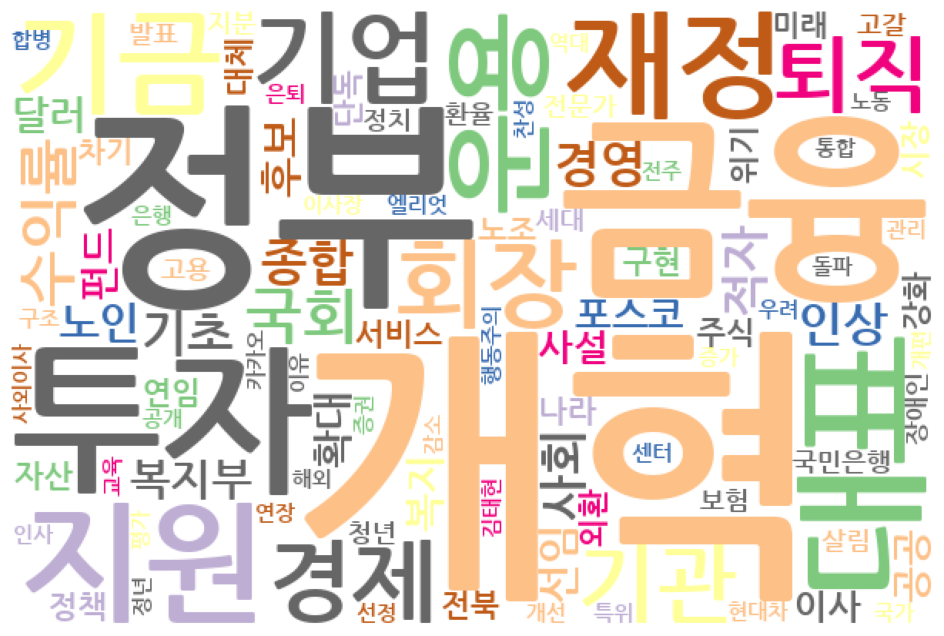

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### **본문 데이터 마이닝**

In [27]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*df['doc_token_noun'])) # 리스트 접합
noun

['보건',
 '복지부',
 '중단',
 '실직',
 '휴직',
 '예외자',
 '지원',
 '종합',
 '운영',
 '개선',
 '방안',
 '예외자',
 '재개',
 '지원',
 '복지부',
 '지원',
 '사각지대',
 '예외자',
 '재개',
 '유도',
 '확대',
 '강화',
 '기대',
 '사업장',
 '부담',
 '중단',
 '실직',
 '예외',
 '비율',
 '이로',
 '인해',
 '사업장',
 '상대',
 '상황',
 '경제',
 '어려움',
 '지원',
 '확대',
 '혜택',
 '지원',
 '1995년 7월',
 '어업인',
 '처음',
 '시작',
 '2012년 7월',
 '영세',
 '사업장',
 '근로자',
 '누리',
 '지원',
 '확대',
 '7월',
 '지원',
 '지원',
 '예외자',
 '중단',
 '실직',
 '휴직',
 '하반기',
 '재개',
 '지원',
 '예상',
 '지원',
 '전국',
 '지사',
 '방문',
 '우편',
 '팩스',
 '센터',
 '전국',
 '공단',
 '지사',
 '안내',
 '정호',
 '복지부',
 '정책',
 '국장',
 '중단',
 '어려움',
 '사업장',
 '지원',
 '예외자',
 '도움',
 '기대',
 '계층',
 '지원',
 '지속',
 '확대',
 '적극',
 '노력',
 '인생',
 '역할',
 '집무실',
 '건강보험',
 '국가',
 '책임',
 '강화',
 '의료',
 '민영화',
 '기자회견',
 '공공',
 '운수',
 '노조',
 '클레임',
 '공공',
 '운수',
 '노조',
 '무상',
 '의료',
 '운동',
 '본부',
 '공적',
 '강화',
 '공동',
 '행동',
 '건강보험',
 '확대',
 '국가',
 '책임',
 '강화',
 '정부',
 '요구',
 '발표',
 '집무실',
 '건강보험',
 '국가',
 '책임',
 '강화',
 '의료',
 '민영화',
 '기자회견',
 '공공',
 '운수',
 '노조',
 '공공',
 '운수',
 '

In [28]:
from collections import Counter
count = Counter(noun) # 각 문자가 몇 번 나타나는지 알려주는 객체 반환

In [29]:
top = dict(count.most_common(100)) # 상위 100개 출력
top

{'정부': 86284,
 '투자': 84903,
 '개혁': 70652,
 '기업': 59803,
 '금융': 59539,
 '대표': 59087,
 '재정': 57368,
 '시장': 43628,
 '기금': 43584,
 '지원': 40402,
 '경제': 40137,
 '위원회': 39987,
 '사회': 39402,
 '은퇴': 38262,
 '회장': 36567,
 '지난해': 36394,
 '운용': 36070,
 '자산': 35310,
 '기관': 34662,
 '문제': 34139,
 '미국': 32713,
 '국회': 32181,
 '주식': 31869,
 '정책': 31728,
 '상황': 31111,
 '퇴직': 31045,
 '확대': 30539,
 '지분': 29678,
 '규모': 29342,
 '달러': 28515,
 '대비': 27248,
 '후보': 26936,
 '수준': 26739,
 '미래': 26238,
 '인상': 26129,
 '경영': 26076,
 '대체': 26061,
 '최근': 24929,
 '이사': 24875,
 '증가': 24784,
 '평가': 24604,
 '국내': 24508,
 '국가': 24033,
 '구조': 23992,
 '방안': 23505,
 '서비스': 23199,
 '결과': 22846,
 '관리': 22182,
 '선임': 22111,
 '의원': 21992,
 '강화': 21872,
 '수익률': 20941,
 '부담': 20871,
 '개선': 20805,
 '발표': 20595,
 '세대': 20270,
 '회사': 20178,
 '제공': 20101,
 '결정': 20051,
 '안정': 19548,
 '배당': 19522,
 '노인': 19487,
 '보유': 19477,
 '운영': 19412,
 '복지부': 19321,
 '기초': 18946,
 '복지': 18838,
 '인구': 18545,
 '해외': 18260,
 '지속': 17892,
 '사실': 17456,
 

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/news/본문 top100.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

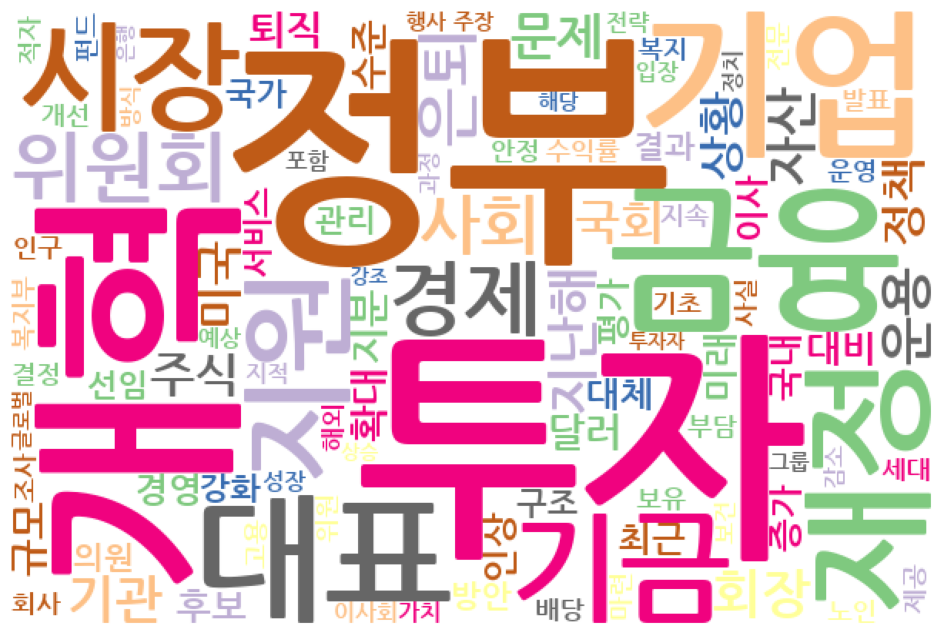

In [ ]:
# 글씨체 위치 지정
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### 전체 데이터 마이닝 (의미 없음)

In [32]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*df['title_token_noun'])) # 리스트 접합
noun += list(itertools.chain(*df['doc_token_noun']))

In [33]:
from collections import Counter
count = Counter(noun) # 각 문자가 몇 번 나타나는지 알려주는 객체 반환

In [34]:
top = dict(count.most_common(100)) # 상위 100개 출력
top

{'정부': 88639,
 '투자': 86841,
 '개혁': 75191,
 '금융': 61485,
 '기업': 60980,
 '대표': 60551,
 '재정': 58636,
 '기금': 44845,
 '시장': 44220,
 '지원': 41678,
 '경제': 41258,
 '사회': 40341,
 '위원회': 40340,
 '은퇴': 38755,
 '회장': 37695,
 '운용': 37277,
 '지난해': 36725,
 '자산': 35919,
 '기관': 35685,
 '문제': 34366,
 '국회': 33153,
 '미국': 32811,
 '주식': 32502,
 '정책': 32362,
 '퇴직': 32034,
 '확대': 31331,
 '상황': 31171,
 '지분': 30186,
 '규모': 29581,
 '달러': 29239,
 '후보': 27796,
 '대비': 27509,
 '경영': 27042,
 '인상': 27019,
 '수준': 26911,
 '미래': 26776,
 '대체': 26638,
 '이사': 25545,
 '증가': 25236,
 '평가': 25018,
 '최근': 24957,
 '국내': 24896,
 '국가': 24459,
 '구조': 24459,
 '서비스': 23842,
 '방안': 23774,
 '결과': 23040,
 '선임': 22962,
 '관리': 22659,
 '강화': 22445,
 '의원': 22319,
 '수익률': 21911,
 '개선': 21243,
 '부담': 21241,
 '발표': 21116,
 '세대': 20774,
 '노인': 20355,
 '회사': 20348,
 '결정': 20333,
 '제공': 20240,
 '복지부': 20194,
 '안정': 19918,
 '기초': 19891,
 '배당': 19726,
 '보유': 19721,
 '운영': 19683,
 '복지': 19618,
 '인구': 18823,
 '해외': 18674,
 '적자': 18346,
 '지속': 18200,
 

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/news/전체 데이터 top100.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

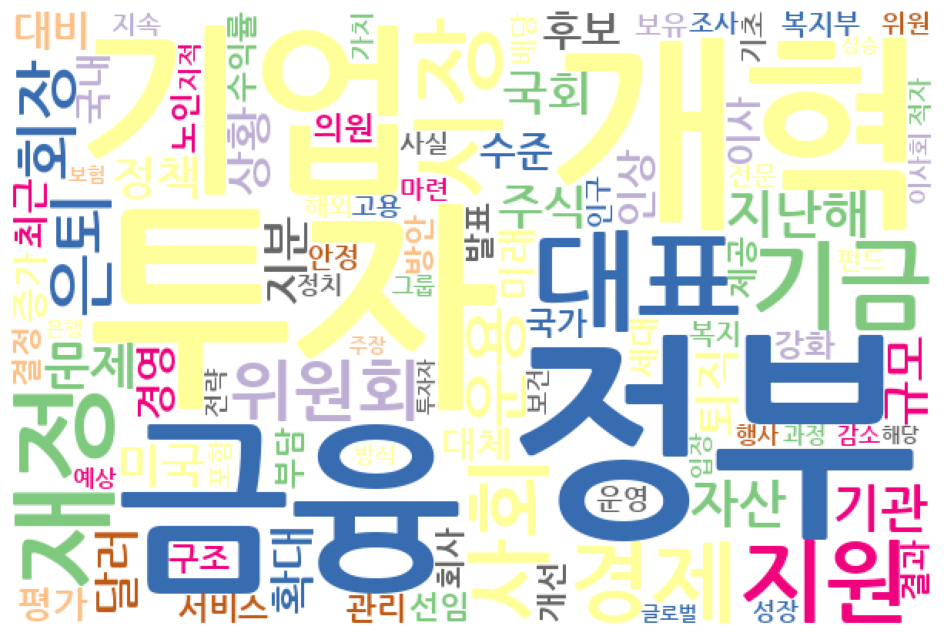

In [ ]:
# 글씨체 위치 지정
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

##  K-Means Clustering

In [ ]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict # 딕셔너리 기본값을 설정할 수 있는 라이브러리
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud # Word Cloud 만들기
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리

from IPython.display import set_matplotlib_formats #matplotlib의 plot 출력 형식 지정 Ex: set_matplotlib_formats('pdf', 'svg'), svg(Scalable Vector Graphics)
from gensim import corpora, models # 토픽 모델링을 위한 라이브러리
set_matplotlib_formats('retina')   # 고해상도 시각화
font_path = '../data/NanumGothicBold.ttf'  # 폰트 경로 지정
from sklearn.cluster import KMeans # KMeans 군집화 알고리즘을 사용하는 라이브러리
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

/tmp/ipykernel_39594/3102239397.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 고해상도 시각화


In [4]:
df= pd.read_pickle("../data/analysis_data/news/pension_news_불용어처리.pkl")

NameError: name 'pd' is not defined

### 본문 k-means clustering

In [39]:
df.head(10)

title  \
0        실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1               국민연금 4월 말 수익률 379전월보다 악화   
2        포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3     연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4           국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   
5                   이대로는 90년대생부터 국민연금 없다   
6           국민연금 하이브 등 16곳 투자목적 일반투자로 상향   
7        퇴직연금 디폴트옵션 정착 위해 투자자 교육제도 개혁 필요   
8  학자금 대출29 고정금리로 전환 저소득층 국민연금 보험료 50 지원   
9        퇴직연금 디폴트옵션 정착 위해 투자자 교육제도 개혁 필요   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   
5  29일 국회의원회관 제2세미나실에서 열린 한국 연금체계의 개혁 방향과 과제 토론회에...  naver   
6   저작권자  서울경제 무단 전재 및 재배포 금지 국민연금공단이 6월 들어 기업 지분...  naver   
7  본보채널A 제31회 동아모닝포럼디폴트옵션 도입 연금 백만장자 시대 열릴까를 주제로 ...  naver   
8  일본 여성 한국 원정 성매매 조직이 처음으로 경찰에 적발된 가운데 온라인상에는 순수...  naver   
9  본보채널A 제31회 동아모닝포럼디폴트옵션 도입 연금 백만장자 시대 열릴까를 주제로 ...  naver   

                                title_token_list_pos  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...   
5  [(이대로, NNP), (는, JX), (90년대, NNP), (생, XSN), (...   
6  [(국민연금, NNP), (하이브, NNP), (등, NNB), (16, SN), ...   
7  [(퇴직, NNG), (연금, NNP), (디폴트, NNP), (옵션, NNP), ...   
8  [(학자금 대출, NNP), (29, NNP), (고정, NNP), (금리, NNP...   
9  [(퇴직, NNG), (연금, NNP), (디폴트, NNP), (옵션, NNP), ...   

                 title_token_noun  \
0                        [실직, 지원]   
1               [4월, 수익률, 전월, 악화]   
2          [포착, 상식, 정부, 건강보험, 책임]   
3                    [피부, 9월, 보료]   
4                           [토론회]   
5                     [이대로, 90년대]   
6       [하이브, 투자, 목적, 일반, 투자, 상향]   
7  [퇴직, 디폴트, 옵션, 정착, 투자자, 교육, 개혁]   
8    [학자금 대출, 29, 고정, 금리, 전환, 지원]   
9  [퇴직, 디폴트, 옵션, 정착, 투자자, 교육, 개혁]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   
5  [국회의원, 회관, 세미나실, 체계, 개혁, 방향, 과제, 토론회, 건호, 정책, ...   
6  [저작권, 서울경제, 6월, 기업, 지분, 보유, 목적, 일반, 투자, 지정, 사례...   
7  [본보, 채널A, 동아, 모닝, 포럼, 디폴트, 옵션, 도입, 백만장자, 시대, 주...   
8  [일본, 여성, 원정, 성매매, 조직, 처음, 경찰, 적발, 가운데, 온라인, 순수...   
9  [본보, 채널A, 동아, 모닝, 포럼, 디폴트, 옵션, 도입, 백만장자, 시대, 주...   

                                  doc_token_list_pos  
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...  
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...  
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...  
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...  
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...  
5  [(29, SN), (일, NNB), (국회의원, NNG), (회관, NNG), (...  
6  [(저작권, NNP), (자, NNB), (서울경제, NNP), (무단, NNP),...  
7  [(본보, NNG), (채널A, NNP), (제, XPN), (31, SN), (회...  
8  [(일본, NNP), (여성, NNG), (한국, NNP), (원정, NNP), (...  
9  [(본보, NNG), (채널A, NNP), (제, XPN), (31, SN), (회...

In [40]:
doc_noun = []
for i in notebook.tqdm(range(0,len(df['doc_token_noun']))):
    # data['doc_token_noun'][i]에서 추출한 명사를 하나의 문자열로 연결 후 doc_noun 리스트에 추가
    doc_noun.append(' '.join(df['doc_token_noun'][i]))  # 각 문서의 명사들을 str으로 연결     
    #['문서1 명사', '문서2 명사', '...']

  0%|          | 0/52029 [00:00<?, ?it/s]

In [41]:
# 텍스트 문서 모음을 단어 tf-idf 행렬로 변환 
vec = TfidfVectorizer(min_df = 0.01, max_df=0.95) # 문서의 1%~95%로 나타나는 단어만 고려.  #min_df: 특정 단어가 나타나는 '문서의 수의 최소 빈도값을 설정/소수형태면 %로 설정
X = vec.fit_transform(doc_noun) # 설정한 Vectorizer로 벡터화

In [42]:
print(vec.get_feature_names_out()) # tf-idf 행렬 추출

['10' '10년' '10대' ... '흐름' '흑자' '희망']


In [43]:
print(X)  # (문서인덱스, 등장단어인덱스) tf-idf값

  (0, 406)	0.06107232122268132
  (0, 1541)	0.05687766668539466
  (0, 1756)	0.04995739801819169
  (0, 177)	0.0739192733803512
  (0, 507)	0.07461230009727961
  (0, 299)	0.09472880356698955
  (0, 1620)	0.04851149093488955
  (0, 1120)	0.09172091100720996
  (0, 208)	0.07101085470088386
  (0, 980)	0.06486691119022117
  (0, 665)	0.07580895544268383
  (0, 1755)	0.16764465869091333
  (0, 1549)	0.13374810071971666
  (0, 1232)	0.0530254979084051
  (0, 2067)	0.08194856124949174
  (0, 416)	0.09813642936999431
  (0, 328)	0.0733271392443454
  (0, 1069)	0.053854488972004885
  (0, 1841)	0.06436053856090669
  (0, 40)	0.20847529409073007
  (0, 2163)	0.0661862246617418
  (0, 1152)	0.1633362822286269
  (0, 163)	0.04350903368606715
  (0, 910)	0.04394298449487409
  (0, 887)	0.07066260948019054
  :	:
  (52028, 2202)	0.06946771891670618
  (52028, 1621)	0.03486064747823089
  (52028, 627)	0.028464610465260345
  (52028, 2192)	0.03061043051214287
  (52028, 727)	0.04341618204928654
  (52028, 680)	0.0391283118092665

### KMeans(algorithm=full :개별관측치와 중심간의 거리 계산 , elkan :중심간의 거리를 더 효율적으로 계산) 

1
2
3
4
5
6
7
8
9


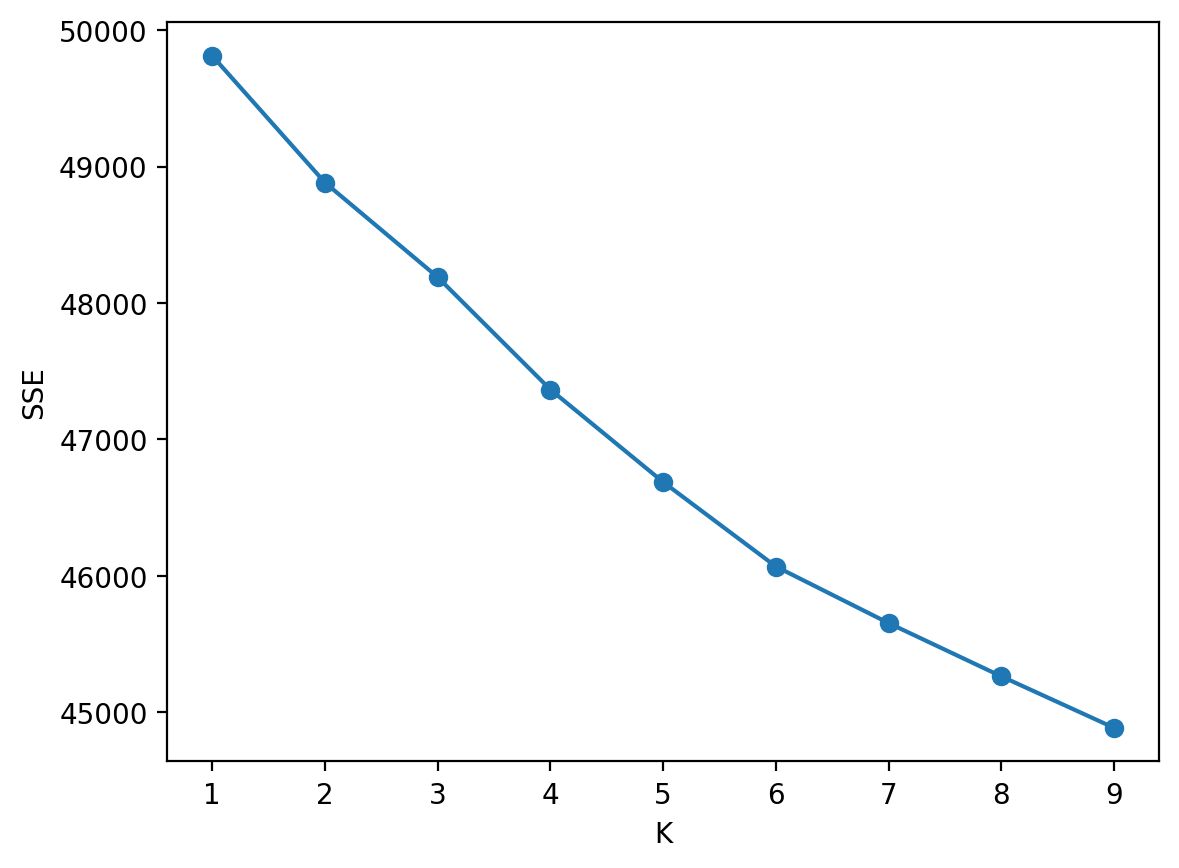

In [44]:
# 군집수가 1~9개일때로 elbow 그래프 시각화
def elbow(X):
    sse = []  # sse 값을 저장할 리스트

    for i in range(1,10):  
        km = KMeans(n_clusters=i, algorithm='auto', random_state=1)  #k-means algorithm: auto(기본값) )
        km.fit(X) # k-means 군집화 수행
        sse.append(km.inertia_)  # sse 값을 리스트에 추가
        print(i) # 현재 i 출력(진행 상황 확인용)

    # Elbow 그래프 시각화    
    plt.plot(range(1,10), sse, marker='o')
    plt.xlabel('K') # K 값 (클러스터 수)
    plt.ylabel('SSE') # see 값
    plt.xticks(range(1,10))
    plt.show()

elbow(X)

In [45]:
# 최적의 클러스터 수(5)로 k-means 실행
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, algorithm='auto', random_state=0) # K-means 모델 생성, 클러스터 수를 4로 설정
model.fit(X)  # K-means 군집화 수행

KMeans(algorithm='auto', n_clusters=5, random_state=0)

In [46]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]   # 군집 중심의 단어들을 내림차순으로 정렬하여 인덱스 반환
terms = vec.get_feature_names_out()  # mac :terms = vec.get_feature_names()
for i in range(5): # 5개의 클러스터에 대해 반복
    print("Cluster %d:" % (i)) # 현재 클러스터 번호 출력
    for ind in order_centroids[i, :500]:   # [행, 열]     # [클러스터 인덱스, 클러스터 내 인덱스] 
        print(' %s' % terms[ind])   # ind: 가져온 단어 인덱스    #terms[ind]: 해당 인덱스를 가진 단어
    print('\n')

Top terms per cluster:
Cluster 0:
 투자
 운용
 시장
 달러
 금융
 주식
 기업
 수익률
 지분
 기금
 자산
 펀드
 국내
 해외
 외환
 투자자
 주가
 보유
 미국
 지난해
 채권
 환율
 금리
 은행
 규모
 글로벌
 기관
 상장
 증권
 거래
 자금
 평가
 매각
 연기금
 자산운용
 가치
 인수
 상품
 비중
 업계
 수익
 카카오
 분기
 확대
 자본
 본부
 운용사
 하락
 종목
 상승
 대표
 최근
 상황
 회사
 매도
 경영
 증시
 공시
 경제
 매수
 기록
 대비
 손실
 지수
 성장
 대체
 퇴직
 정부
 당국
 위탁
 전략
 실적
 포트폴리오
 배당
 행사
 개선
 수준
 행동주의
 대주주
 보유액
 위원회
 위험
 안정
 가격
 관계자
 확보
 옵션
 책임
 매입
 증가
 이익
 정책
 분석
 결정
 영업
 영향
 목표
 회장
 출자
 성과
 세계
 제고
 지속
 증권사
 적극
 장기
 구조
 중국
 그룹
 사모펀드
 감소
 위기
 변동
 전문
 방안
 코스
 기대
 산업
 관리
 우려
 의결권
 부문
 예상
 발표
 강화
 지배
 지주
 한국은행
 연구원
 고객
 이날
 선정
 작년
 에너지
 지원
 전문가
 지난달
 코리아
 일본
 서비스
 통화
 참여
 사모
 사주
 가운데
 목적
 전환
 제공
 솔루션
 문제
 투자가
 매출
 고려
 업체
 기존
 원화
 물가
 환경
 수요
 디폴트
 환원
 외국인
 경기
 이사장
 인력
 위원
 강조
 리스크
 발행
 관심
 한국거래소
 배분
 비율
 개인
 공개
 도입
 완화
 프로그램
 상반기
 반도체
 대출
 인상
 지적
 활동
 법인
 본부장
 적립금
 향후
 일반
 활용
 포함
 재무
 국내외
 분야
 마련
 시작
 9월
 인프라
 연준
 시중
 결과
 3월
 제안
 해당
 회수
 노력
 당시
 삼성전자
 외화
 설립
 스튜
 공제
 긴축
 개발
 체결
 유지
 저작권
 베스트
 리츠
 단기
 어치
 규제
 마감
 구성
 유동성
 미래
 센터
 검토
 

In [47]:
# 클러스터별 상위 100개 단어 리스트 생성
cluster0_list = []  # 클러스터 0의 상위 단어 리스트
cluster1_list = []  # 클러스터 1의 상위 단어 리스트
cluster2_list = []  # 클러스터 2의 상위 단어 리스트
cluster3_list = []  # 클러스터 3의 상위 단어 리스트
cluster4_list = []  # 클러스터 3의 상위 단어 리스트

for i in range(5):  # 6개의 클러스터에 대해 반복
    cluster_terms = [] # 현재 클러스터의 상위 단어들을 저장할 리스트
    for ind in order_centroids[i, :500]:  # 군집 중심의 상위 100개 단어에 대해 반복
        cluster_terms.append(terms[ind])  # 해당 인덱스에 해당하는 단어를 리스트에 추가
    if i == 0:  # 클러스터에 따라서 리스트를 해당하는 변수에 할당
        cluster0_list = cluster_terms
    elif i == 1:
        cluster1_list = cluster_terms
    elif i == 2:
        cluster2_list = cluster_terms
    elif i == 3:
        cluster3_list = cluster_terms
    elif i == 4:
        cluster4_list = cluster_terms

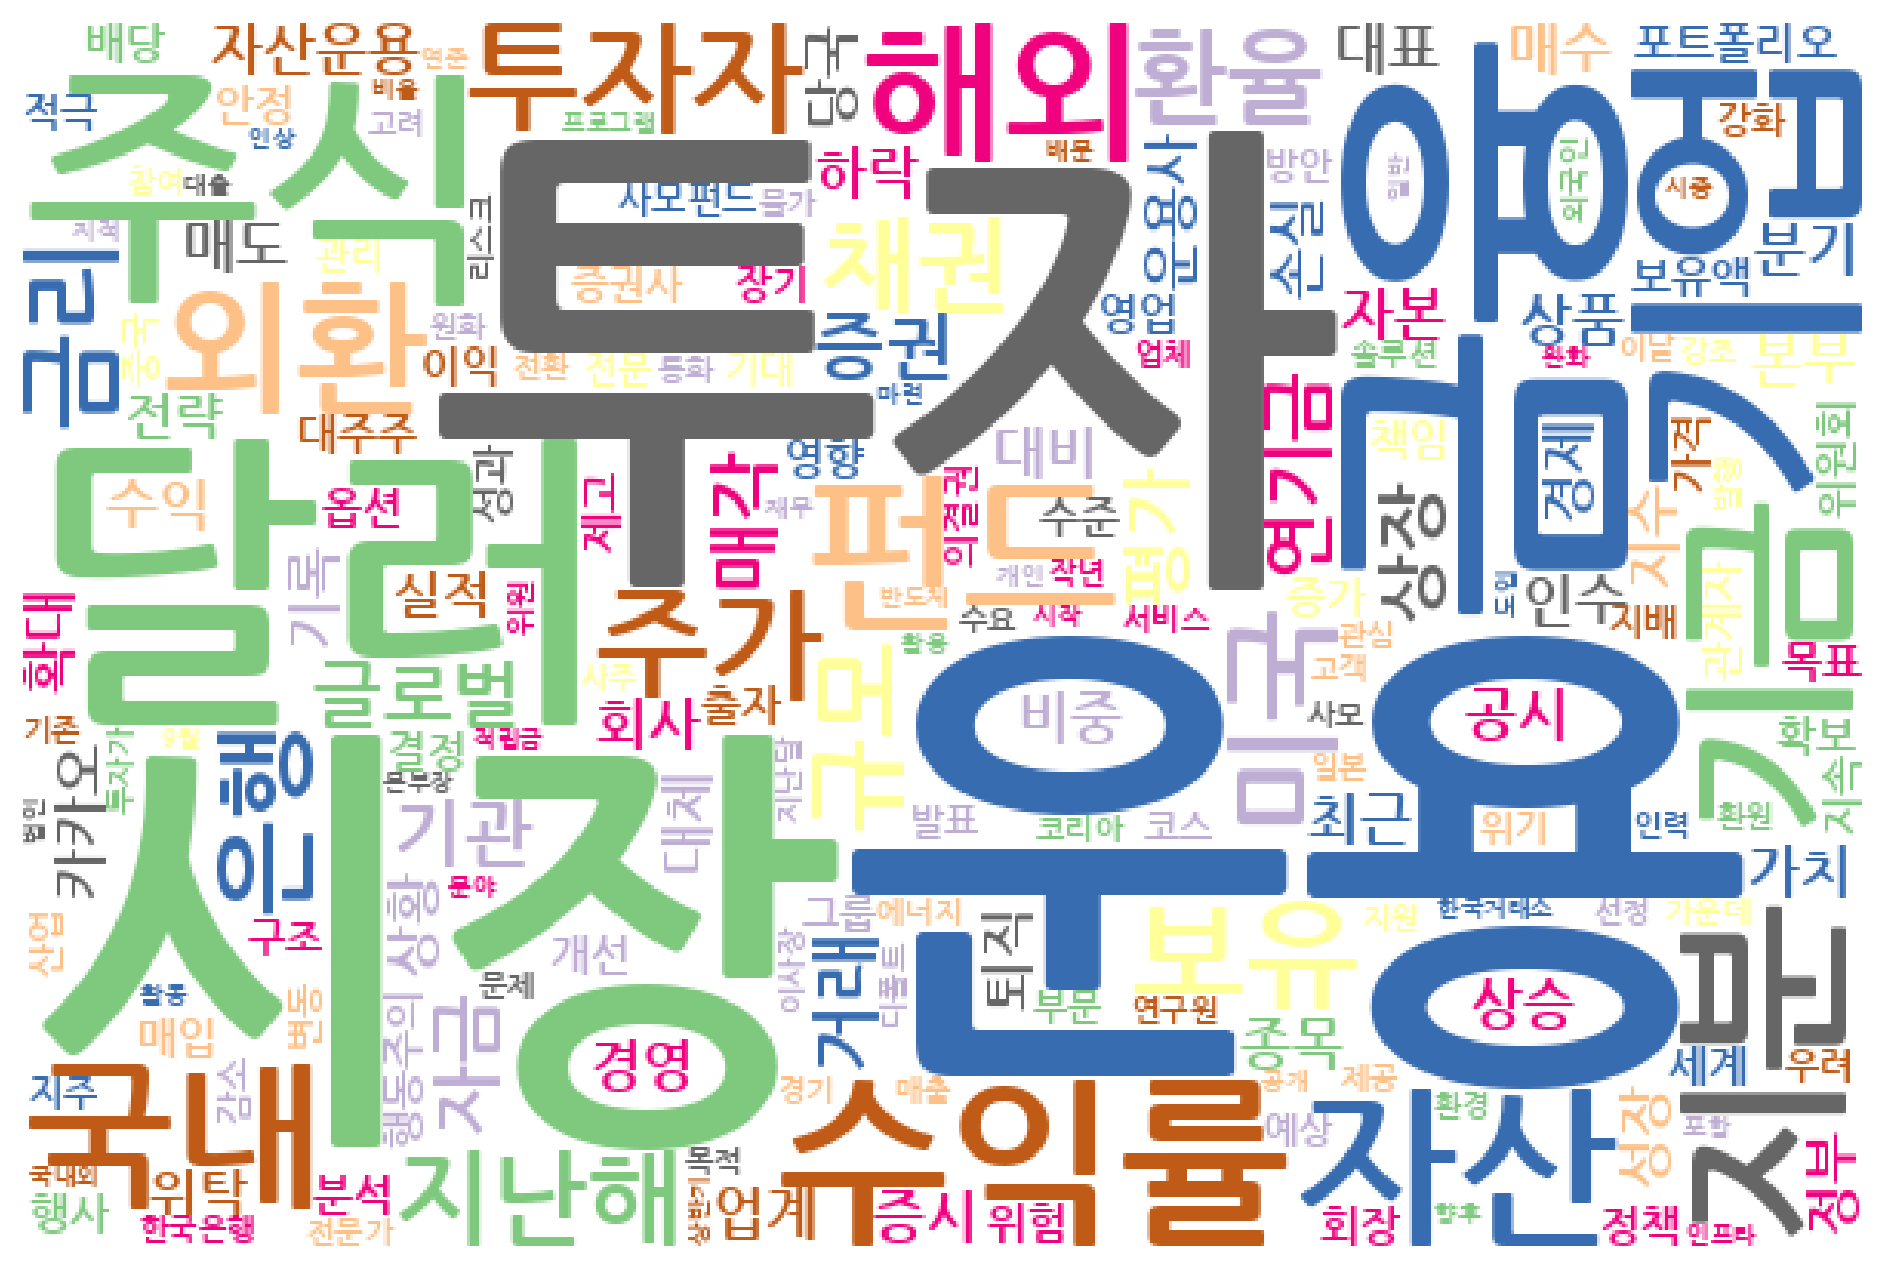

In [ ]:
text = ' '.join(cluster0_list)  # 'cluster0_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)
# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

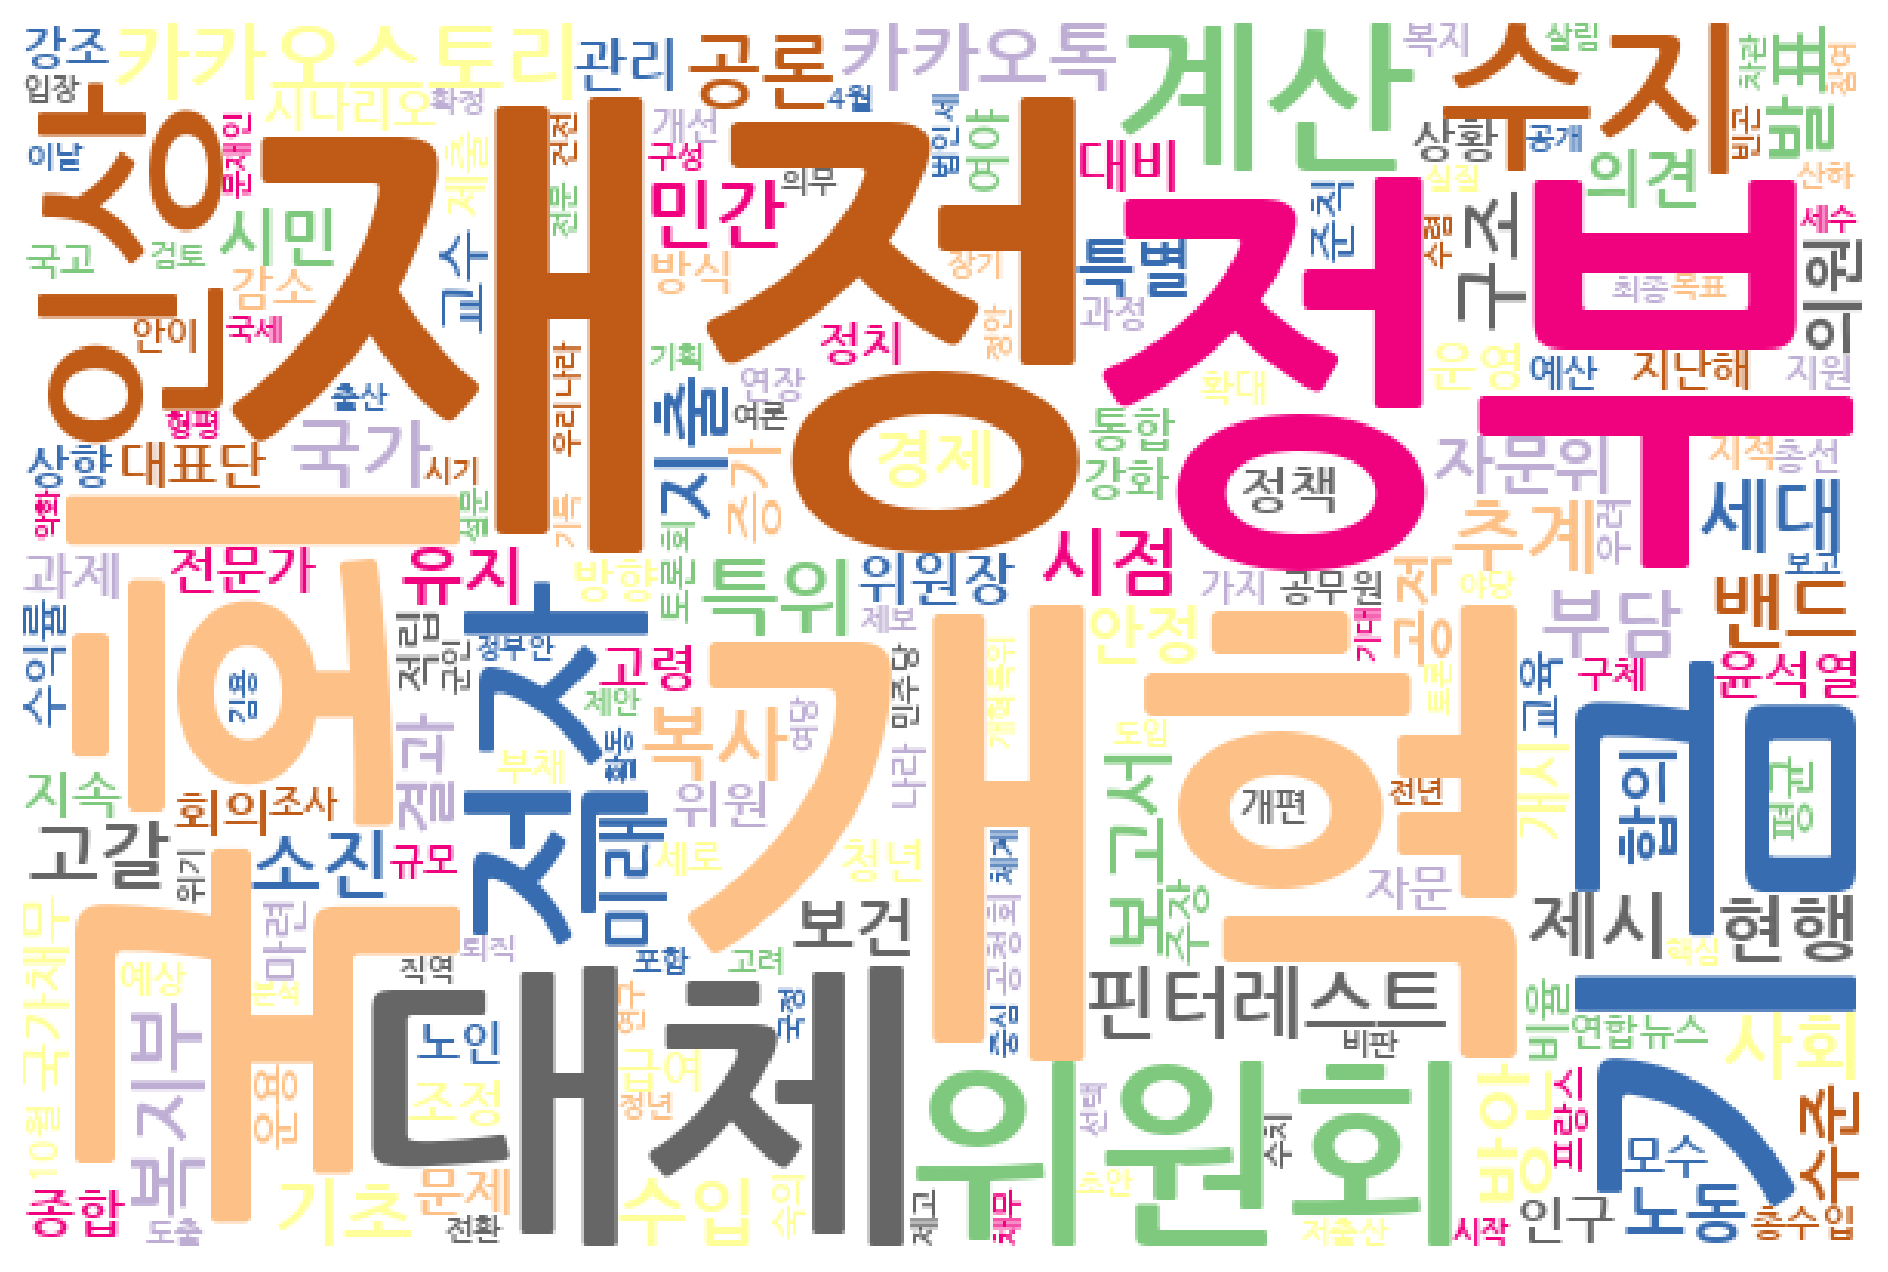

In [ ]:
text = ' '.join(cluster1_list)  # 'cluster1_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path='../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

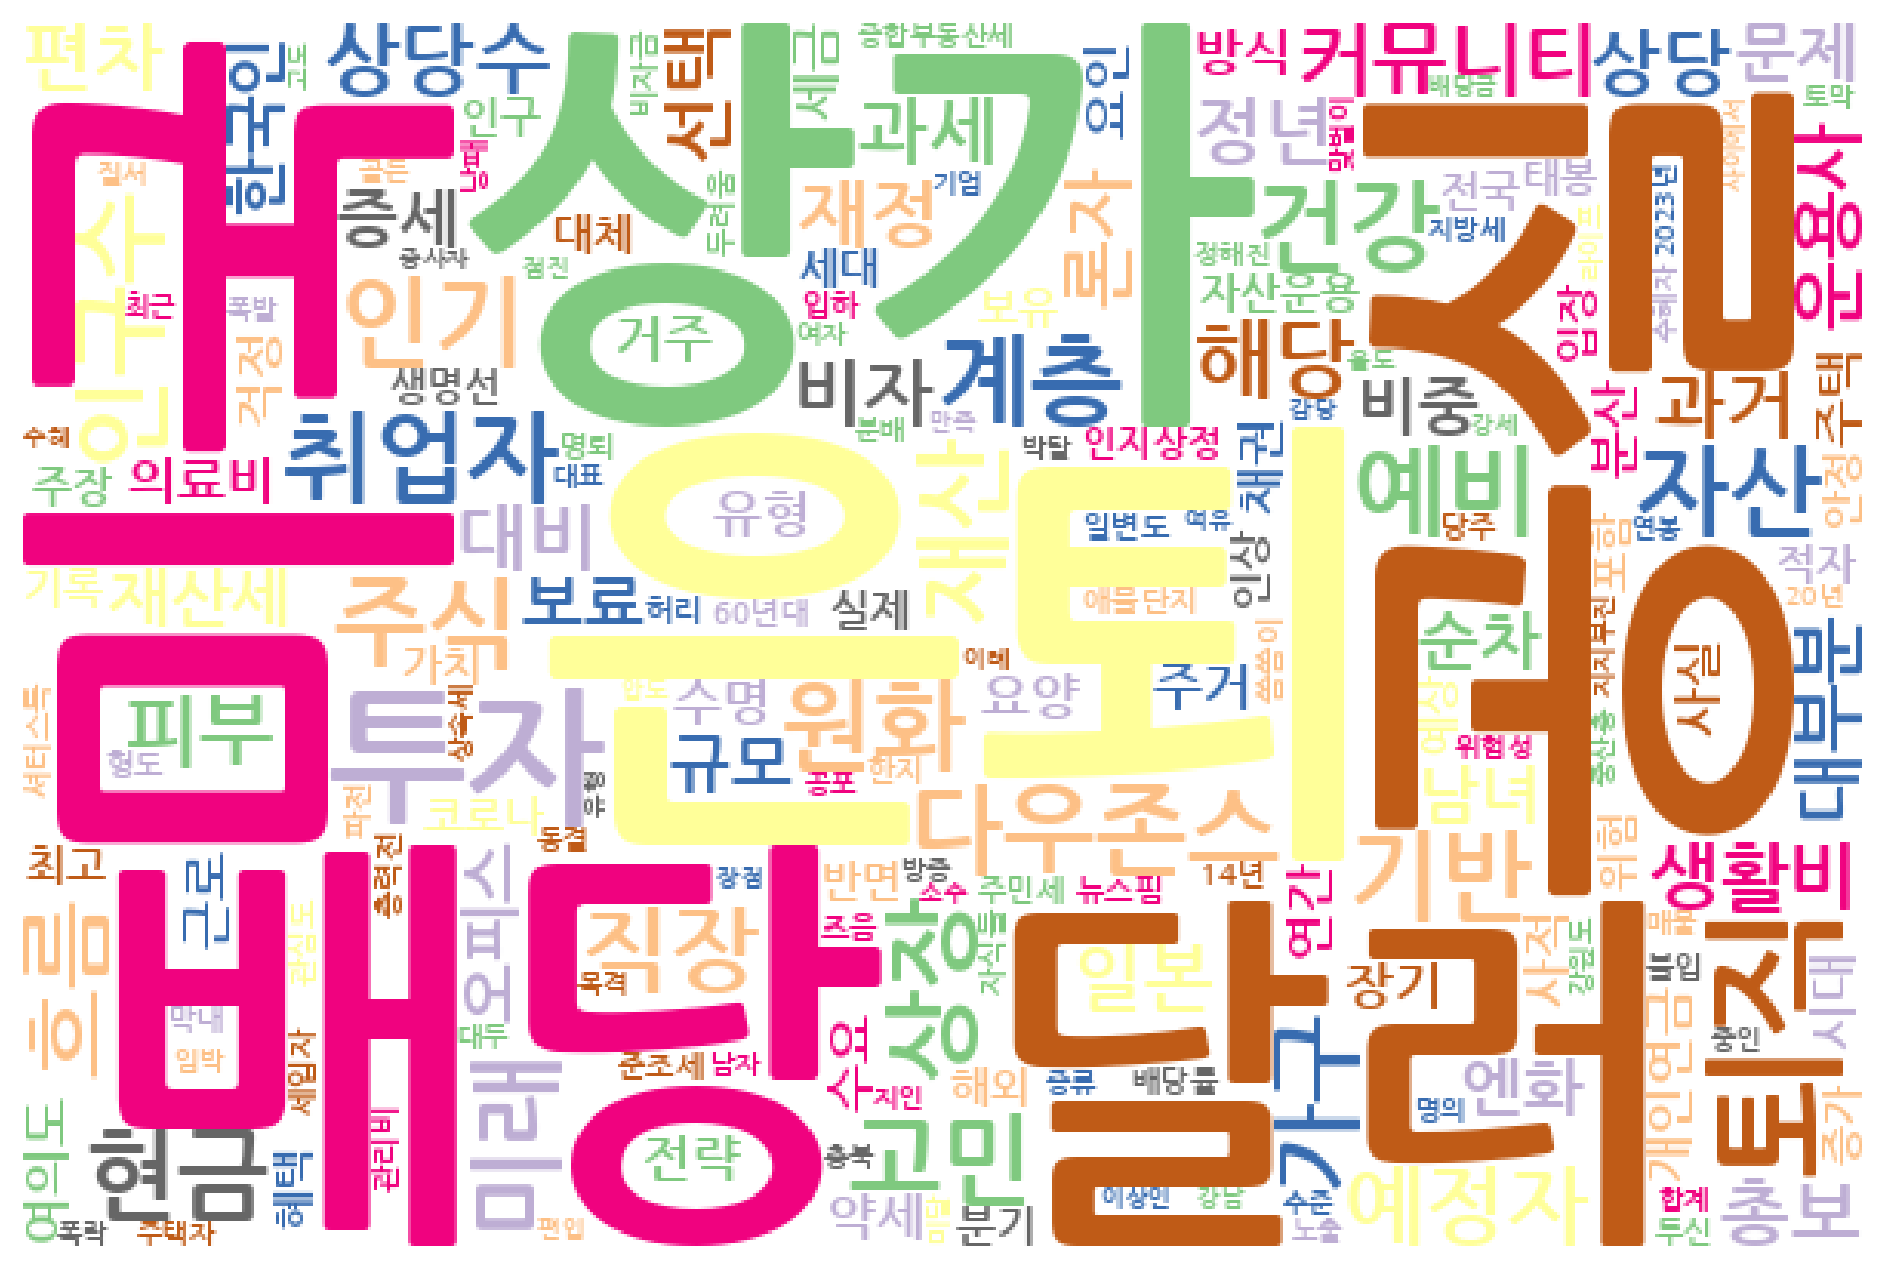

In [ ]:
text = ' '.join(cluster2_list)  # 'cluster1_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path='../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

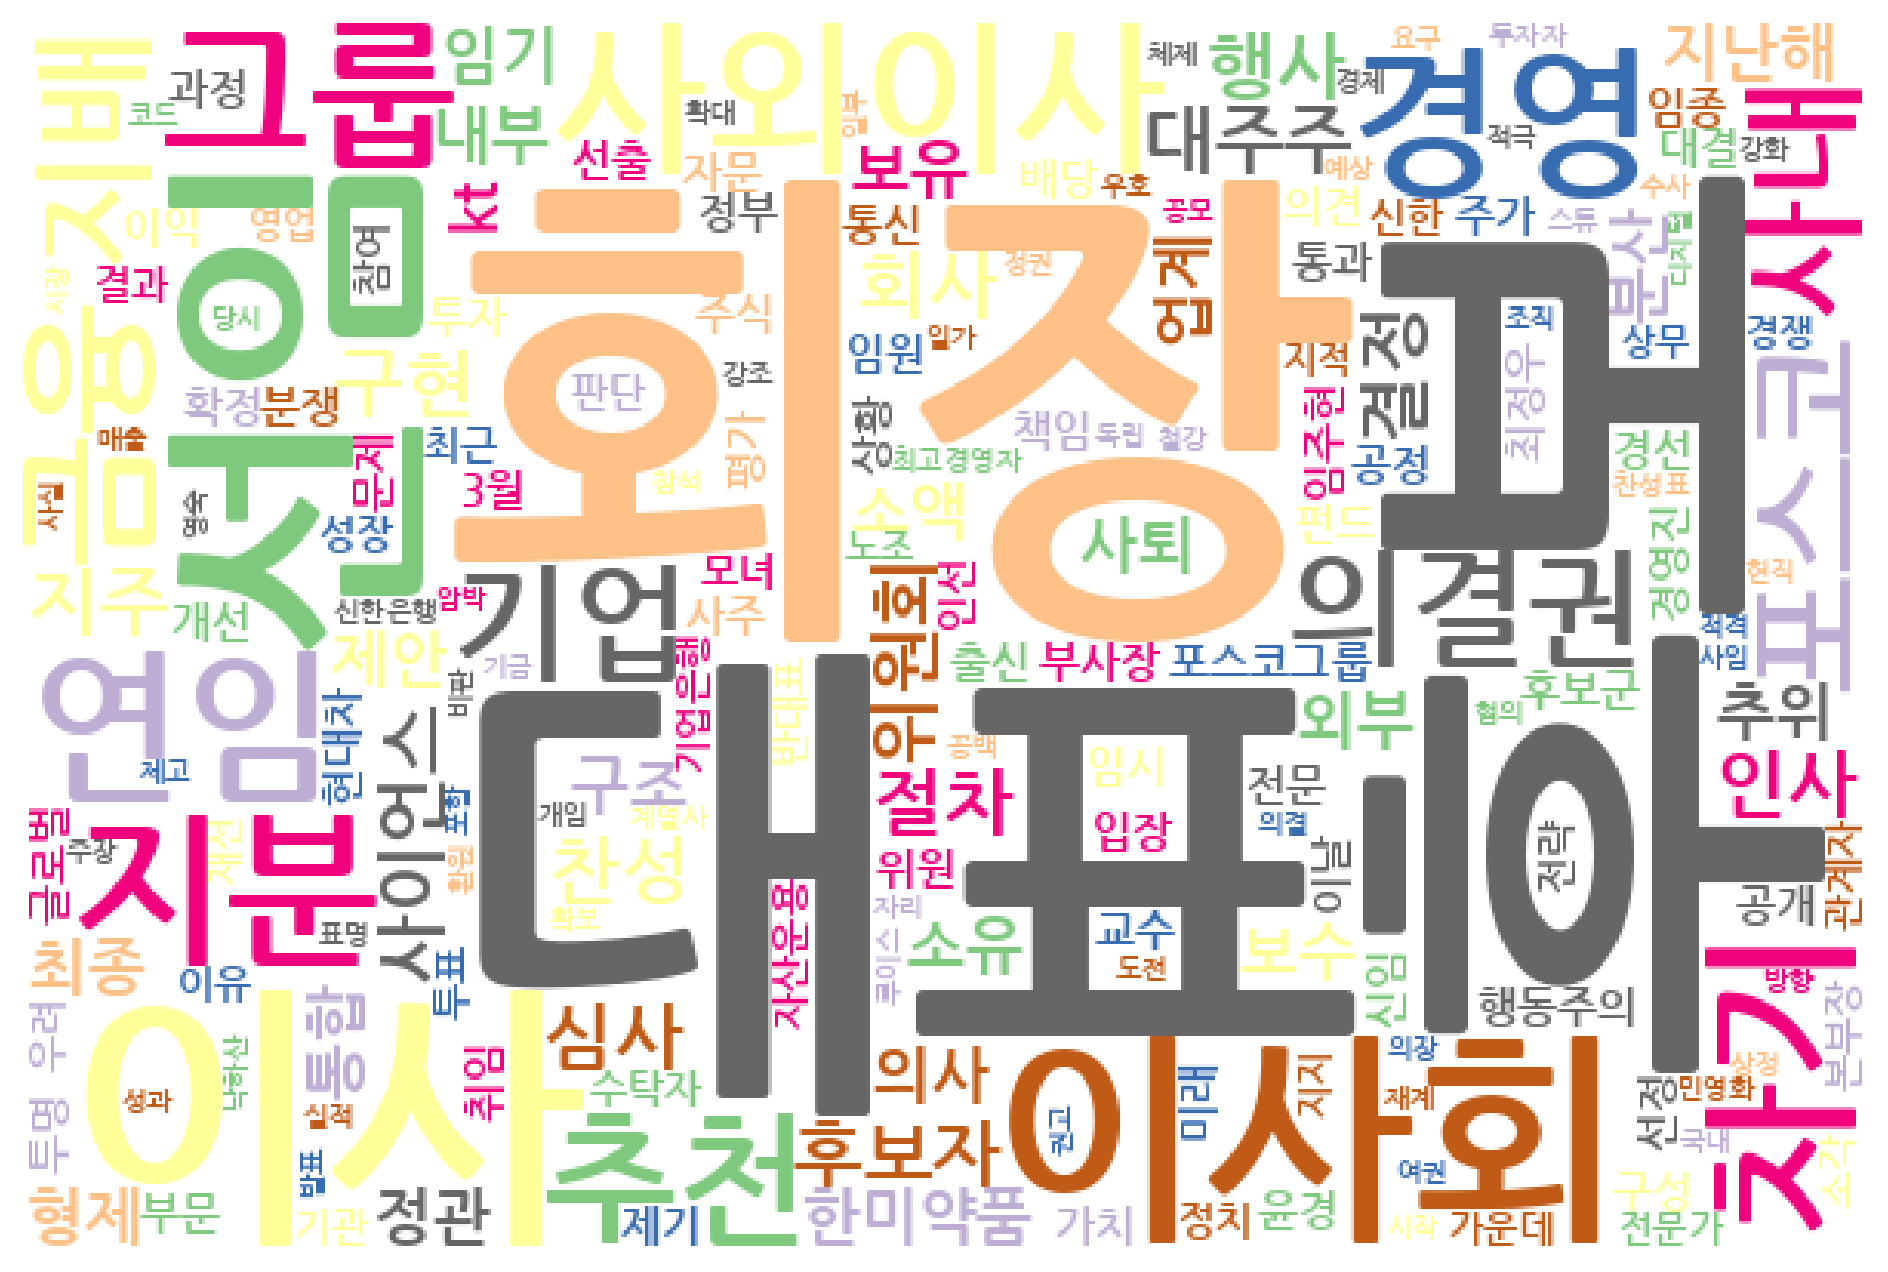

In [ ]:
text = ' '.join(cluster3_list)  # 'cluster1_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path='../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

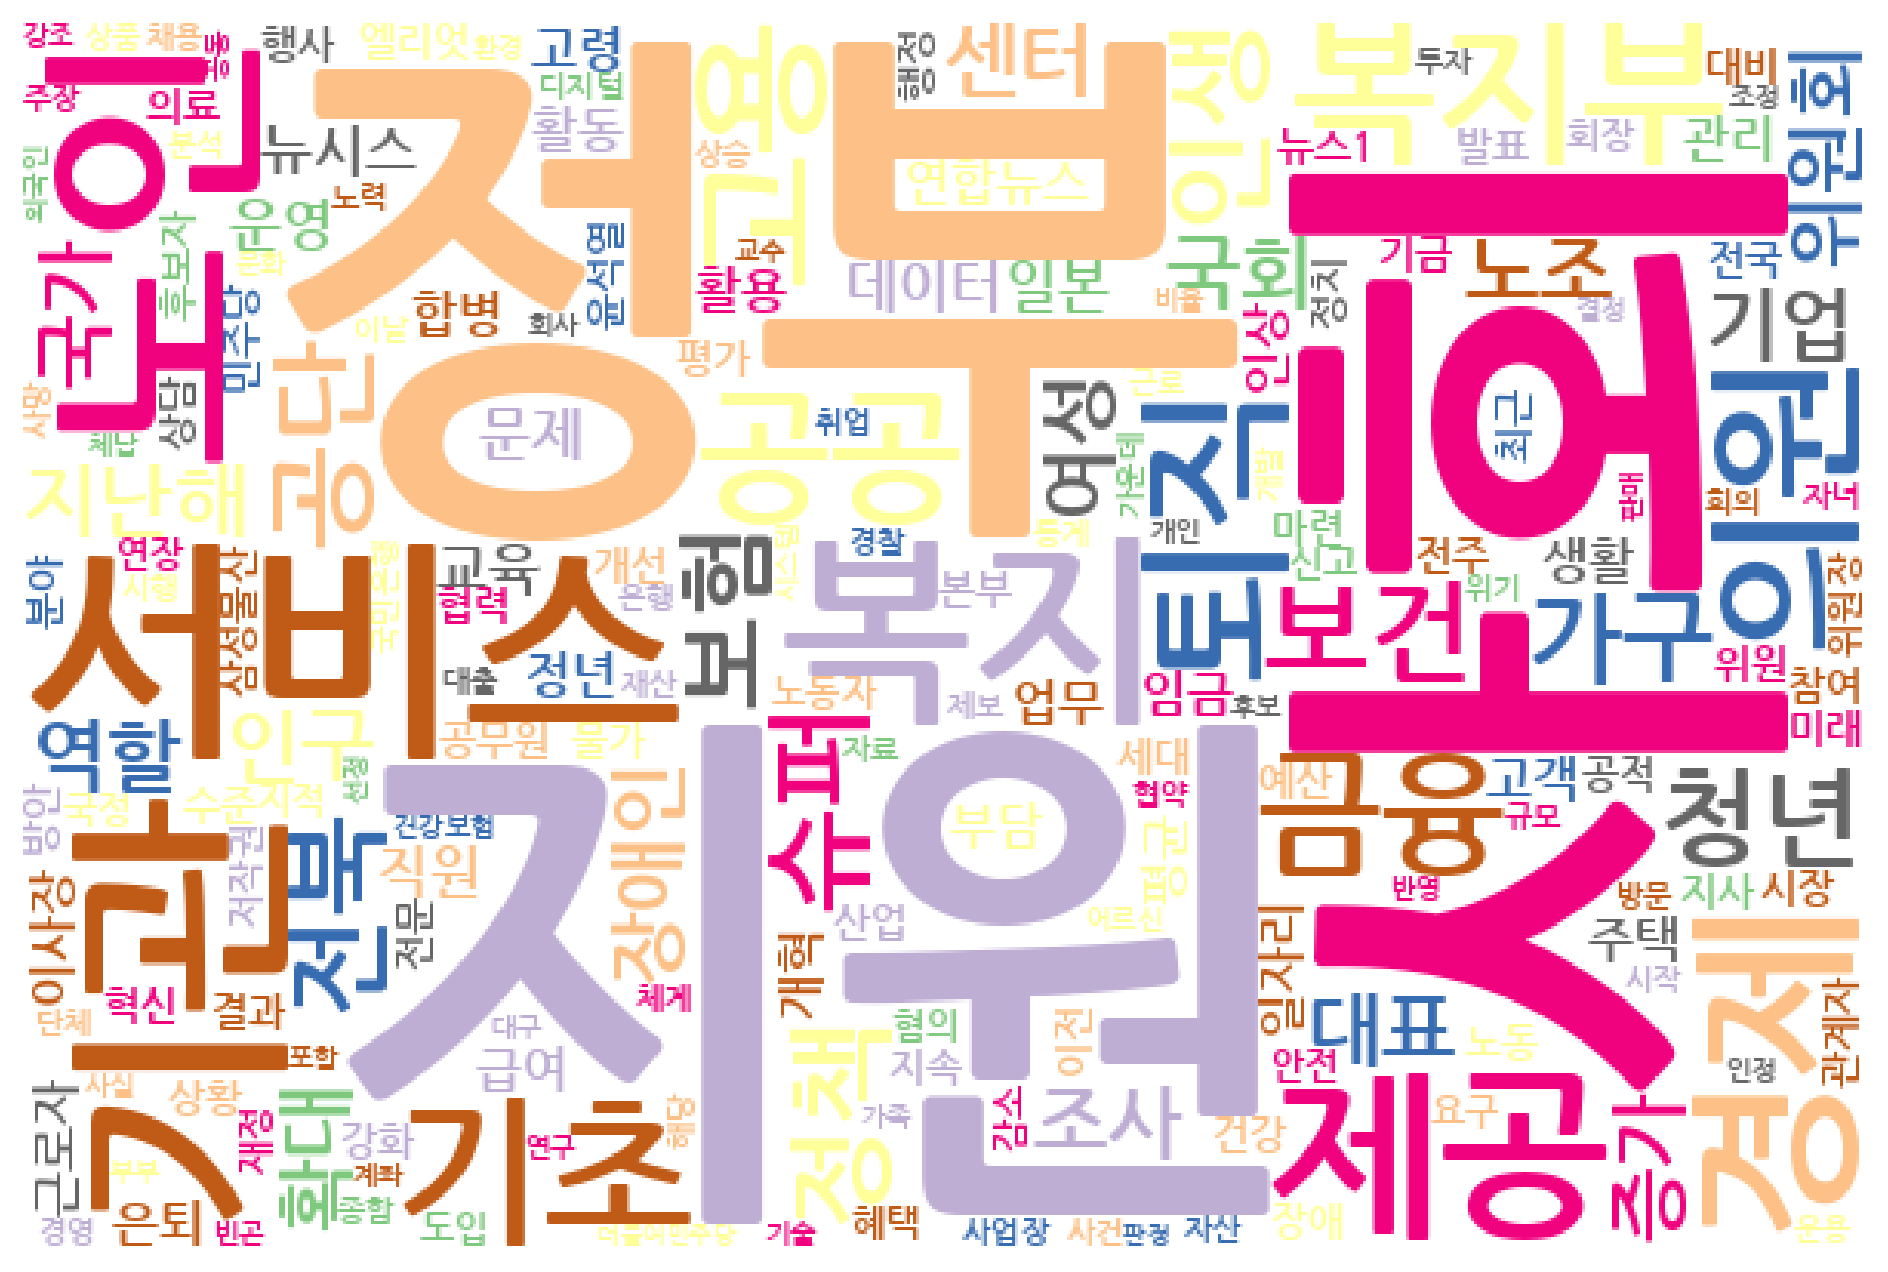

In [ ]:
text = ' '.join(cluster4_list)  # 'cluster1_list'에 있는 단어들을 하나의 문자열로 연결

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path='../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## LDA

In [3]:
import pandas as pd
import numpy as np

In [4]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from matplotlib import rc, font_manager
import seaborn as sns

/tmp/ipykernel_39594/479636918.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


In [ ]:
df= pd.read_pickle("../data/analysis_data/news/pension_news_불용어처리.pkl")

In [6]:
df.head(2)

title  \
0  실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1         국민연금 4월 말 수익률 379전월보다 악화   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   

                                title_token_list_pos   title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...           [실직, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...  [4월, 수익률, 전월, 악화]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   

                                  doc_token_list_pos  
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...  
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...

In [7]:
# 명사만 추출한 리스트를 바탕으로 단어 빈도별 목록을 생성.
from gensim import corpora, models
noun_dic=corpora.Dictionary(df['doc_token_noun'])  # 딕셔너리 클래스로 사전생성, 각 단어별 id도 함께 생성
noun_dic.token2id                                # 각 단어 별 생성된 id 확인     

{'1995년 7월': 0,
 '2012년 7월': 1,
 '7월': 2,
 '강화': 3,
 '개선': 4,
 '경제': 5,
 '계층': 6,
 '공단': 7,
 '국장': 8,
 '근로자': 9,
 '기대': 10,
 '노력': 11,
 '누리': 12,
 '도움': 13,
 '방문': 14,
 '방안': 15,
 '보건': 16,
 '복지부': 17,
 '부담': 18,
 '비율': 19,
 '사각지대': 20,
 '사업장': 21,
 '상대': 22,
 '상황': 23,
 '센터': 24,
 '시작': 25,
 '실직': 26,
 '안내': 27,
 '어려움': 28,
 '어업인': 29,
 '영세': 30,
 '예상': 31,
 '예외': 32,
 '예외자': 33,
 '우편': 34,
 '운영': 35,
 '유도': 36,
 '이로': 37,
 '인해': 38,
 '재개': 39,
 '적극': 40,
 '전국': 41,
 '정책': 42,
 '정호': 43,
 '종합': 44,
 '중단': 45,
 '지사': 46,
 '지속': 47,
 '지원': 48,
 '처음': 49,
 '팩스': 50,
 '하반기': 51,
 '혜택': 52,
 '확대': 53,
 '휴직': 54,
 '역할': 55,
 '인생': 56,
 '건강보험': 57,
 '공공': 58,
 '공공기관 부채': 59,
 '공동': 60,
 '공적': 61,
 '관리': 62,
 '광범위': 63,
 '구축': 64,
 '국가': 65,
 '기자회견': 66,
 '노조': 67,
 '라고': 68,
 '무상': 69,
 '민간': 70,
 '민영화': 71,
 '발표': 72,
 '보험': 73,
 '본부': 74,
 '사회': 75,
 '세계': 76,
 '실비': 77,
 '요구': 78,
 '운동': 79,
 '운수': 80,
 '윤석열': 81,
 '의료': 82,
 '의료 민영화': 83,
 '자리': 84,
 '재무': 85,
 '저지': 86,
 '저축': 87,
 '전문가

In [8]:
corpus = [noun_dic.doc2bow(text) for text in df['doc_token_noun']]
# 문서별 문서 안의 단어의 id와 빈도수로 수치화

In [9]:
import gensim
from gensim.models import CoherenceModel

Lda = gensim.models.ldamodel.LdaModel 
perplexity_score = []  # perplexity_score를 저장할 리스트
coherence_score = []   # coherence_score를 저장할 리스트

for i in notebook.tqdm(range(1,6)): # 토픽 개수가 5개인 경우의 혼잡도와 일관성 측정
    ldamodel = Lda(corpus, num_topics = i, id2word = noun_dic, passes = 15, random_state = 0) # passes : 모델 학습 시 알고리즘의 동작 횟수
    perplexity_score.append(ldamodel.log_perplexity(corpus)) # 혼잡도 : 실제로 관측되는 값을 얼마나 잘 예측하는지
    coherence_score.append(CoherenceModel(model = ldamodel, texts = df['doc_token_noun'],
                                         dictionary = noun_dic, coherence = 'c_v').get_coherence()) # 일관성 : 한 주제 안에 유사한 단어가 많이 모여있는가
    print(i,'process complete')

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

### 토픽 개수 결정

#### 토픽 수에 따른 혼잡성 점수 그래프 확인

혼잡성
- 확률 모델이 결과를 얼마나 정확하게
예측하는지 판단
- 낮을수록 정확하게 예측
- 하지만 낮다고 해서, 
결과가 해석에 용이하다는 의미는 아님

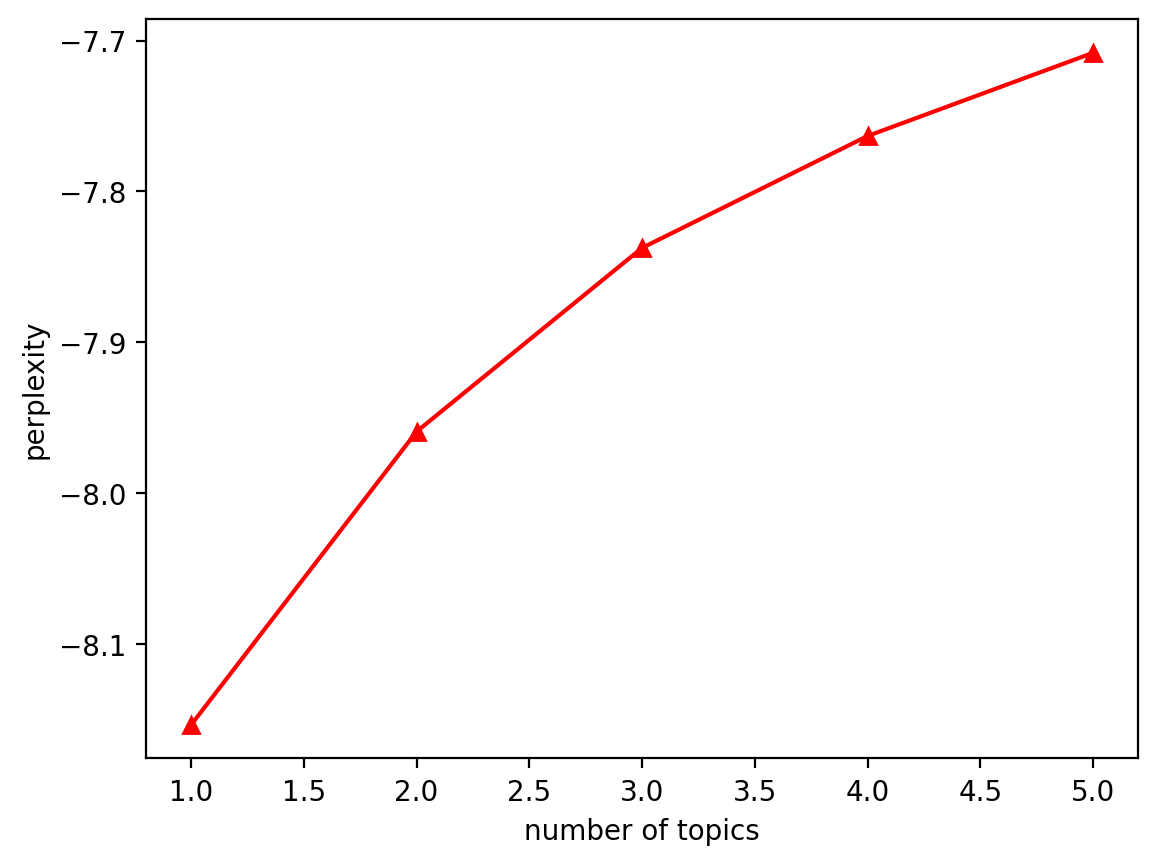

In [60]:
plt.plot(range(1,6), perplexity_score, 'r', marker ='^') #(x,y,color)
plt.xlabel("number of topics")
plt.ylabel("perplexity") # 혼잡도
plt.show()

#### 토픽 수에 따른 일관성 점수 그래프 확인

일관성
- 토픽이 얼마나 의미론적으로 일관성
있는지 판단
- 높을수록 의미론적 일관성 높음

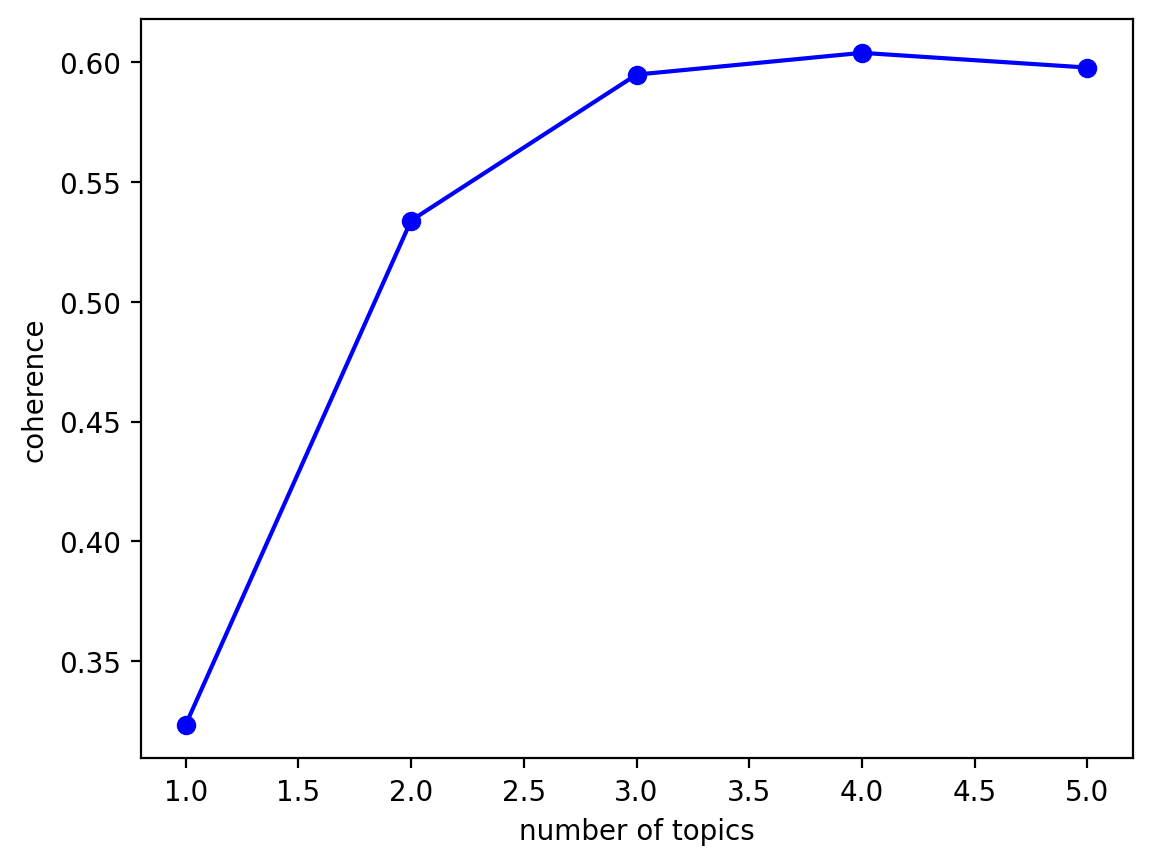

In [61]:
plt.plot(range(1,6), coherence_score, 'b', marker ='o') # 파란색, o 모양
plt.xlabel("number of topics")
plt.ylabel("coherence") # 일관성
plt.show()

### LDA 토픽 모델링 진행

In [10]:
from tqdm import trange, notebook

In [11]:
# 최적의 토픽수(5)으로 토픽 모델링 진행
noun_lda = Lda(corpus, num_topics = 5, id2word = noun_dic, passes = 15, random_state = 0)
topics = noun_lda.print_topics(num_words = 5) # 토픽별 5개의 단어씩 출력
for topic in notebook.tqdm(topics): # 5개의 토픽이므로 5로 압축된 토픽을 각각 출력
    print(topic)

  0%|          | 0/5 [00:00<?, ?it/s]

(0, '0.031*"투자" + 0.018*"은퇴" + 0.015*"미국" + 0.014*"자산" + 0.013*"달러"')
(1, '0.030*"개혁" + 0.022*"정부" + 0.018*"재정" + 0.014*"기금" + 0.014*"국회"')
(2, '0.011*"노인" + 0.011*"사회" + 0.009*"보험" + 0.008*"지원" + 0.008*"고용"')
(3, '0.020*"대표" + 0.017*"회장" + 0.014*"이사" + 0.013*"후보" + 0.013*"선임"')
(4, '0.011*"금융" + 0.010*"기관" + 0.009*"기업" + 0.008*"지원" + 0.008*"서비스"')


In [12]:
print(noun_lda)

LdaModel<num_terms=53406, num_topics=5, decay=0.5, chunksize=2000>


In [13]:
len(corpus)

52029

In [14]:
print(noun_dic)

Dictionary<53406 unique tokens: ['1995년 7월', '2012년 7월', '7월', '강화', '개선']...>


In [15]:
noun_dtm = [noun_dic.doc2bow(text) for text in df['doc_token_noun']] # 문서별 문서 안의 단어의 id와 빈도수로 수치화
ldamodel=Lda(noun_dtm, num_topics=5, id2word=noun_dic, passes=10,random_state=0)

topics = [] # 예측된 토픽들을 저장할 리스트
for i in trange(len(noun_dtm)):  # 각 문서에 대해 반복
    prop_sort=[]  # 토픽별 확률을 저장할 리스트
    topic_sort=[] # 토픽 인덱스를 저장할 리스트
    for topic , prop in ldamodel.get_document_topics(noun_dtm)[i]:  #각 문서마다 토픽 별로 해당할 확률이 부여됨
        prop_sort.append(prop)  # 해당 토픽의 확률을 리스트에 추가
        topic_sort.append(topic)  # 해당 토픽의 인덱스를 리스트에 추가
    topics.append(topic_sort[prop_sort.index(max(prop_sort))])  #확률 중 가장 높은 확률의 토픽을 해당 문서의 토픽으로 지정

df['doc_topic'] = topics #모든 문서의 토픽을 데이터프레임에 추가

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52029/52029 [00:07<00:00, 6761.57it/s]


In [16]:
for doc_topic, prop in notebook.tqdm(ldamodel.get_document_topics(noun_dtm)[1]):
    print(doc_topic, prop) # 토픽, 확률을 출력

  0%|          | 0/5 [00:00<?, ?it/s]

0 0.06727615
1 0.06728515
2 0.067529514
3 0.06733025
4 0.73057896


In [17]:
df.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...                [실직, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          2  
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          4  
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          1  
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          2  
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          1

In [ ]:
f = open("../data/analysis_data/news/pension_news_topic_doc.pkl", "wb")
pickle.dump(df, f)  # 파일로 저장
f.close()

In [ ]:
f = open("../data/analysis_data/news/pension_news_topic_doc.pkl", "rb")
aa = pickle.load(f) # 불러오기
f.close()

In [22]:
aa.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...                [실직, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          2  
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          4  
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          1  
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          2  
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          1

In [23]:
aa['doc_topic'].value_counts()

doc_topic
1    14598
4    11839
3     9735
2     9263
0     6594
Name: count, dtype: int64

In [24]:
topic0 = aa[aa['doc_topic'] == 0]  # 'doc_topic' 컬럼 값이 0인 행들만 선택하여 topic0에 저장
topic1 = aa[aa['doc_topic'] == 1]  # 'doc_topic' 컬럼 값이 1인 행들만 선택하여 topic1에 저장
topic2 = aa[aa['doc_topic'] == 2]  # 'doc_topic' 컬럼 값이 2인 행들만 선택하여 topic2에 저장
topic3 = aa[aa['doc_topic'] == 3]  # 'doc_topic' 컬럼 값이 2인 행들만 선택하여 topic2에 저장
topic4 = aa[aa['doc_topic'] == 4]  # 'doc_topic' 컬럼 값이 2인 행들만 선택하여 topic2에 저장

In [25]:
topic0_tn = topic0['doc_token_noun']  # 토픽 번호가 0인 문서들의 토큰화된 명사들을 topic0_tn에 저장
topic1_tn = topic1['doc_token_noun']  # 토픽 번호가 1인 문서들의 토큰화된 명사들을 topic1_tn에 저장
topic2_tn = topic2['doc_token_noun']  # 토픽 번호가 2인 문서들의 토큰화된 명사들을 topic2_tn에 저장
topic3_tn = topic3['doc_token_noun']
topic4_tn = topic4['doc_token_noun']

In [26]:
import itertools
topic0_nlist = list(itertools.chain(*topic0_tn)) # 리스트 언패킹
topic1_nlist = list(itertools.chain(*topic1_tn)) # 리스트 언패킹
topic2_nlist = list(itertools.chain(*topic2_tn)) # 리스트 언패킹
topic3_nlist = list(itertools.chain(*topic3_tn)) # 리스트 언패킹
topic4_nlist = list(itertools.chain(*topic4_tn)) # 리스트 언패킹

In [27]:
from collections import Counter # 단어들을 쉽게 집계하기 위해 사용

### 토픽 0

In [28]:
count = Counter(topic0_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund0 = dict(count.most_common(500)) # 상위 500개 단어 출력
hund0

{'투자': 44581,
 '은퇴': 30203,
 '달러': 24139,
 '미국': 23777,
 '자산': 22148,
 '주식': 18969,
 '시장': 17485,
 '운용': 14993,
 '퇴직': 13307,
 '배당': 12969,
 '공실': 11950,
 '수익률': 11926,
 '규모': 11346,
 '금융': 10943,
 '해외': 10425,
 '국내': 10264,
 '상가': 9892,
 '기업': 9736,
 '대비': 9573,
 '금리': 9021,
 '상장': 8708,
 '비중': 8636,
 '채권': 8631,
 '기금': 8191,
 '펀드': 8050,
 '지난해': 7794,
 '외환': 7629,
 '원화': 7257,
 '환율': 7248,
 '상승': 7099,
 '최근': 7091,
 '미래': 7083,
 '현금': 6922,
 '분기': 6897,
 '대체': 6614,
 '정부': 6578,
 '수준': 6564,
 '경제': 6410,
 '거래': 6404,
 '고민': 6356,
 '기록': 6310,
 '해당': 6253,
 '운용사': 6204,
 '보유': 6149,
 '문제': 6147,
 '계층': 5966,
 '가치': 5959,
 '투자자': 5953,
 '증가': 5879,
 '전략': 5780,
 '안정': 5752,
 '기관': 5722,
 '장기': 5713,
 '상황': 5477,
 '위험': 5457,
 '상품': 5432,
 '기반': 5428,
 '흐름': 5377,
 '주가': 5280,
 '자금': 5276,
 '재정': 5262,
 '자산운용': 5143,
 '은행': 5081,
 '건강': 5068,
 '인상': 5065,
 '예상': 5041,
 '다우존스': 5012,
 '평가': 4795,
 '대표': 4765,
 '하락': 4760,
 '증권': 4682,
 '글로벌': 4571,
 '확대': 4471,
 '사실': 4302,
 '연기금': 4239,

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

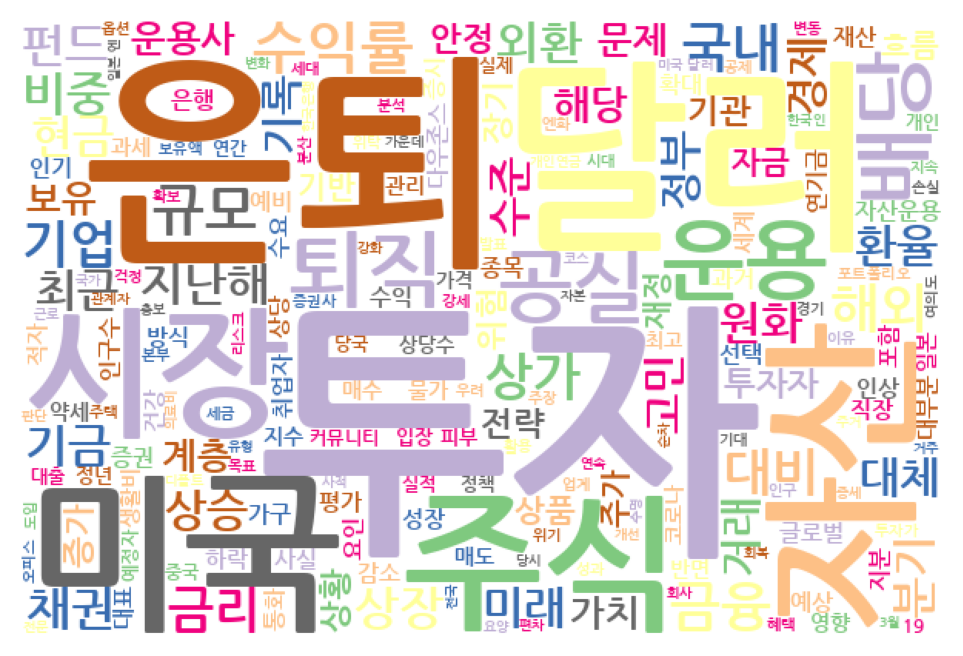

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund0)
# 워드클라우드 출력

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 1

In [31]:
count = Counter(topic1_nlist) # Counter 객체를 사용하여 topic2_nlist 리스트의 요소들을 카운트
hund1 = dict(count.most_common(500)) # 상위 500개 단어 출력
hund1

{'개혁': 64161,
 '정부': 48882,
 '재정': 47379,
 '기금': 26466,
 '국회': 26356,
 '위원회': 21504,
 '대체': 16508,
 '의원': 15431,
 '경제': 15426,
 '사회': 15090,
 '정책': 14921,
 '인상': 14327,
 '문제': 13235,
 '복지부': 12891,
 '방안': 12650,
 '세대': 12171,
 '국가': 12053,
 '적자': 11915,
 '정치': 11603,
 '운용': 10768,
 '윤석열': 10163,
 '상황': 10067,
 '보건': 9999,
 '대표': 9754,
 '미래': 9590,
 '부담': 9574,
 '지출': 9415,
 '구조': 9369,
 '위원': 9301,
 '수준': 9052,
 '결과': 8874,
 '수지': 8751,
 '발표': 8590,
 '계산': 8534,
 '확대': 8446,
 '기초': 8388,
 '노동': 8235,
 '복지': 8133,
 '지원': 7910,
 '특위': 7889,
 '제시': 7813,
 '위원장': 7754,
 '인구': 7581,
 '대비': 7540,
 '강화': 7503,
 '민주당': 7482,
 '증가': 7429,
 '안정': 7347,
 '고갈': 7346,
 '관리': 7325,
 '강조': 7225,
 '지난해': 7099,
 '지적': 7083,
 '유지': 6984,
 '운영': 6969,
 '전문가': 6954,
 '추계': 6920,
 '교수': 6841,
 '공론': 6801,
 '과제': 6766,
 '투자': 6751,
 '예산': 6654,
 '주장': 6585,
 '의견': 6559,
 '마련': 6505,
 '청년': 6428,
 '민간': 6366,
 '회의': 6254,
 '시장': 6177,
 '지속': 6136,
 '규모': 6128,
 '개선': 6013,
 '수익률': 5916,
 '보고서': 5754,
 '방향': 

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

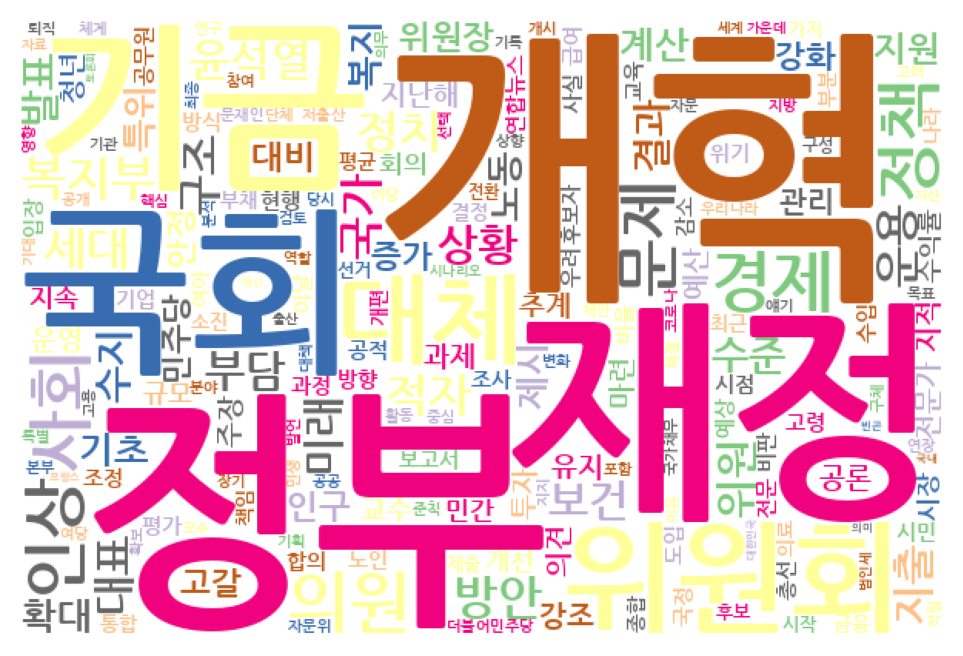

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund1)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 2

In [34]:
count = Counter(topic2_nlist) # Counter 객체를 사용하여 topic2_nlist 리스트의 요소들을 카운트
hund2 = dict(count.most_common(500)) # 상위 50개 단어 출력
hund2

{'지원': 12666,
 '노인': 12513,
 '사회': 11949,
 '고용': 9600,
 '퇴직': 9516,
 '기초': 8944,
 '보험': 8028,
 '정부': 7746,
 '가구': 7562,
 '급여': 7386,
 '정년': 7214,
 '임금': 7106,
 '지난해': 7090,
 '증가': 7069,
 '주택': 7032,
 '인구': 6898,
 '근로자': 6824,
 '부담': 6818,
 '평균': 6797,
 '복지': 6612,
 '조사': 6548,
 '고령': 6200,
 '확대': 6138,
 '수준': 5720,
 '노조': 5663,
 '문제': 5541,
 '경제': 5459,
 '인상': 5333,
 '장애인': 5227,
 '상황': 5205,
 '생활': 5065,
 '연장': 4980,
 '은퇴': 4850,
 '대비': 4784,
 '서비스': 4729,
 '근로': 4642,
 '정책': 4538,
 '재산': 4485,
 '노동': 4375,
 '일자리': 4264,
 '결과': 4213,
 '청년': 4122,
 '건강': 4105,
 '감소': 4079,
 '노동자': 4056,
 '빈곤': 3996,
 '공무원': 3985,
 '최근': 3973,
 '활동': 3863,
 '자녀': 3794,
 '국가': 3780,
 '금융': 3779,
 '공적': 3697,
 '세대': 3645,
 '공제': 3586,
 '혜택': 3527,
 '물가': 3508,
 '여성': 3492,
 '기업': 3443,
 '제공': 3426,
 '해당': 3396,
 '상승': 3380,
 '복지부': 3362,
 '부부': 3226,
 '포함': 3226,
 '비율': 3202,
 '보건': 3159,
 '마련': 3151,
 '장애': 3148,
 '도입': 3101,
 '자료': 3093,
 '개선': 3090,
 '회사': 3078,
 '저축': 3048,
 '요구': 3021,
 '건강보험': 2998,

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

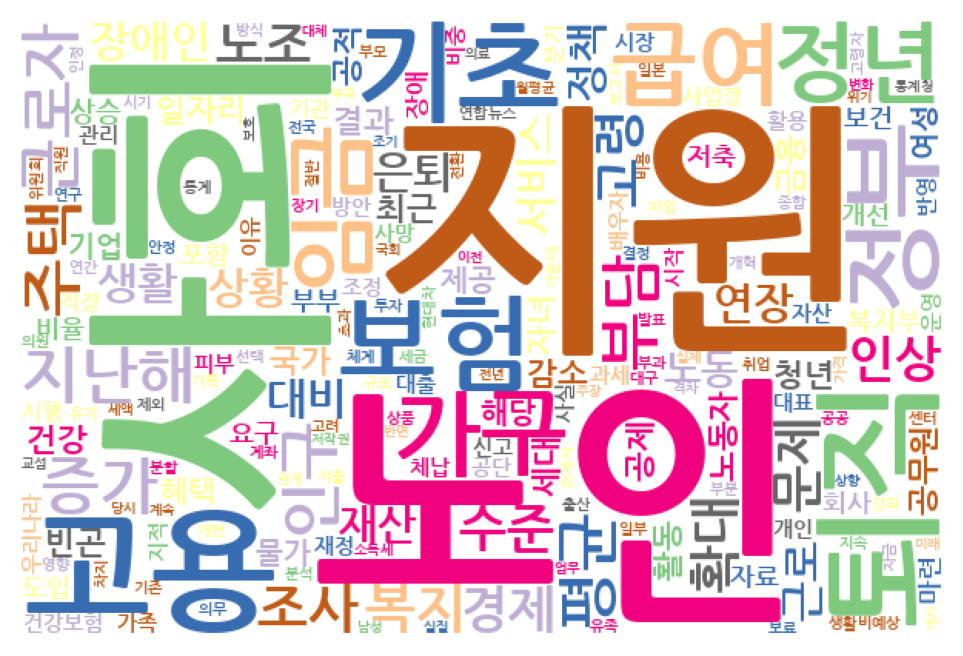

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund2)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 3

In [37]:
count = Counter(topic3_nlist) # Counter 객체를 사용하여 topic2_nlist 리스트의 요소들을 카운트
hund3 = dict(count.most_common(500)) # 상위 50개 단어 출력
hund3

{'대표': 34853,
 '회장': 31672,
 '지분': 23858,
 '기업': 22088,
 '이사': 21448,
 '후보': 20472,
 '선임': 19985,
 '경영': 18658,
 '금융': 17880,
 '이사회': 16120,
 '투자': 15589,
 '정부': 12963,
 '그룹': 11891,
 '사외이사': 11820,
 '회사': 10982,
 '행사': 10787,
 '의결권': 10209,
 '연임': 9970,
 '결정': 9879,
 '보유': 9717,
 '위원회': 9616,
 '지난해': 9220,
 '구조': 9156,
 '합병': 9094,
 '지배': 8784,
 '주식': 8523,
 '대주주': 8471,
 '시장': 7886,
 '추천': 7724,
 '주가': 7513,
 '차기': 7338,
 '포스코': 7145,
 '절차': 6800,
 '카카오': 6650,
 '상황': 6633,
 '삼성물산': 6532,
 '과정': 6517,
 '심사': 6500,
 '가치': 6486,
 '업계': 6303,
 '평가': 6189,
 '제안': 6181,
 '문제': 6049,
 '투자자': 5947,
 '펀드': 5936,
 '인사': 5893,
 '제기': 5704,
 '입장': 5699,
 '찬성': 5641,
 '최근': 5594,
 '기관': 5576,
 '지주': 5515,
 '행동주의': 5503,
 '배당': 5161,
 '후보자': 5140,
 '결과': 5065,
 '당시': 5057,
 '소액': 5054,
 '사주': 5029,
 '관계자': 4989,
 '사내': 4972,
 '인수': 4941,
 '개선': 4788,
 '책임': 4750,
 '상장': 4748,
 '국내': 4733,
 '최종': 4630,
 '확보': 4629,
 '매각': 4626,
 '11번가': 4567,
 '이날': 4546,
 '판단': 4516,
 '위원': 4514,
 '엘리엇': 4450,
 '

<function matplotlib.pyplot.show(close=None, block=None)>

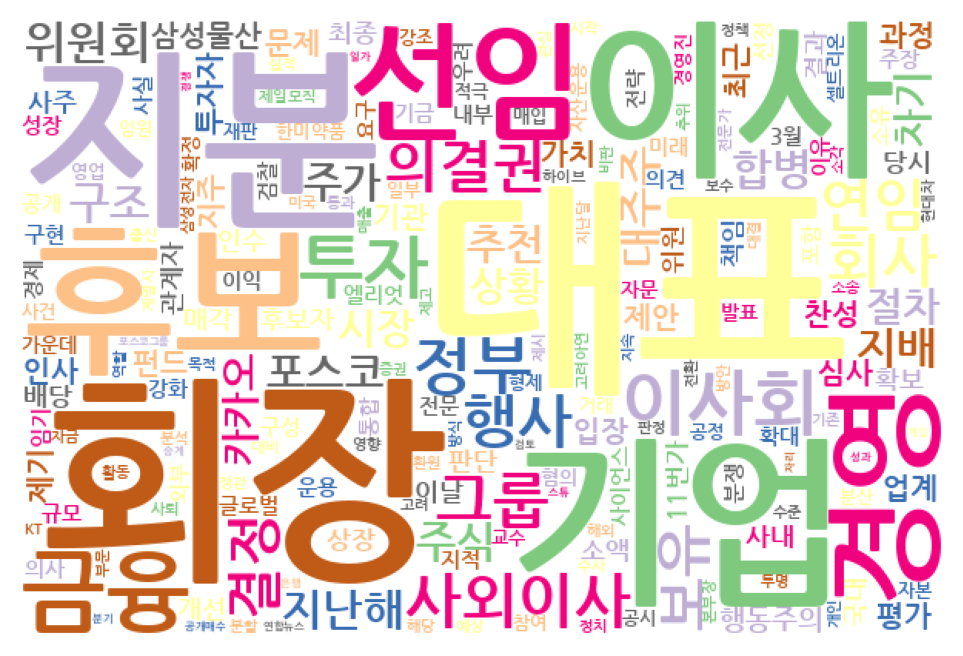

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund3)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 4

In [39]:
count = Counter(topic4_nlist) # Counter 객체를 사용하여 topic2_nlist 리스트의 요소들을 카운트
hund4 = dict(count.most_common(500)) # 상위 50개 단어 출력
hund4

{'금융': 22421,
 '기업': 19169,
 '기관': 16989,
 '지원': 16493,
 '투자': 15742,
 '서비스': 13842,
 '제공': 10817,
 '정부': 10115,
 '시장': 9127,
 '경제': 9126,
 '사회': 8781,
 '센터': 8149,
 '공공': 8037,
 '산업': 7891,
 '확대': 7697,
 '데이터': 7503,
 '고객': 7170,
 '관리': 7142,
 '운영': 6983,
 '대표': 6980,
 '정책': 6556,
 '은행': 6553,
 '전북': 6514,
 '평가': 6471,
 '일본': 5640,
 '강화': 5634,
 '교육': 5493,
 '국내': 5442,
 '자산': 5418,
 '참여': 5341,
 '활용': 5299,
 '규모': 5283,
 '지난해': 5191,
 '글로벌': 5163,
 '혁신': 5116,
 '개발': 5044,
 '본부': 5036,
 '성장': 5035,
 '운용': 4990,
 '지속': 4967,
 '기술': 4884,
 '분야': 4791,
 '업무': 4752,
 '개선': 4672,
 '경영': 4585,
 '협력': 4572,
 '위원회': 4542,
 '디지털': 4506,
 '마련': 4476,
 '방안': 4399,
 '공단': 4398,
 '퇴직': 4394,
 '활동': 4303,
 '환경': 4291,
 '전문': 4255,
 '국가': 4253,
 '발전': 4225,
 '전략': 4142,
 '관계자': 4031,
 '노력': 3928,
 '최근': 3822,
 '신용': 3773,
 '여성': 3739,
 '상황': 3729,
 '고용': 3703,
 '기반': 3700,
 '미래': 3645,
 '적극': 3630,
 '발표': 3621,
 '구축': 3571,
 '복지': 3557,
 '상품': 3539,
 '안전': 3483,
 '회사': 3432,
 '세계': 3416,
 '전환': 338

<function matplotlib.pyplot.show(close=None, block=None)>

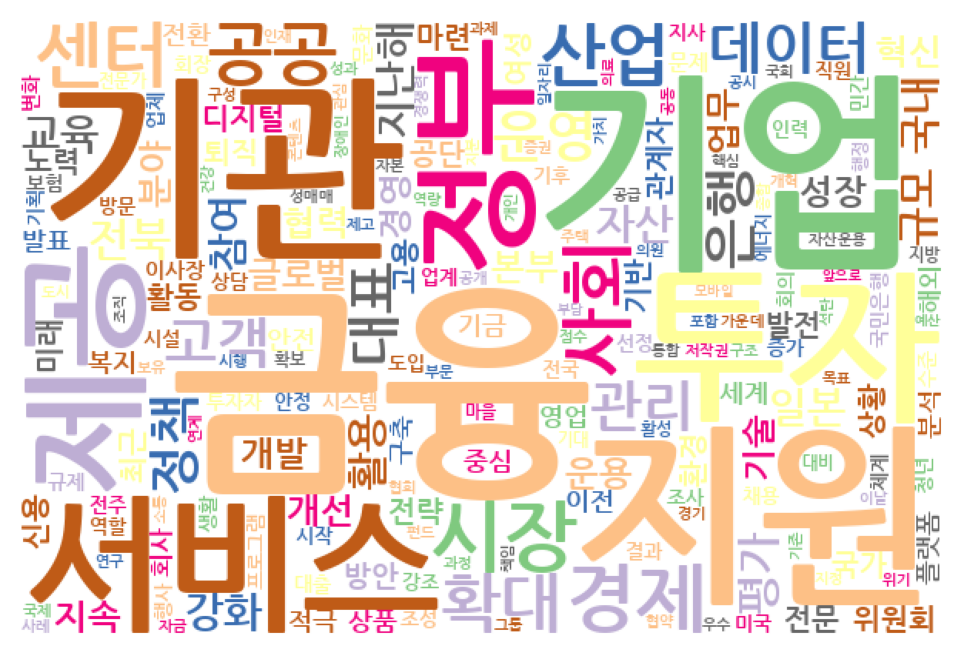

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund4)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 5

In [41]:
count = Counter(topic5_nlist) # Counter 객체를 사용하여 topic2_nlist 리스트의 요소들을 카운트
hund5= dict(count.most_common(500)) # 상위 50개 단어 출력
hund5

NameError: name 'topic5_nlist' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

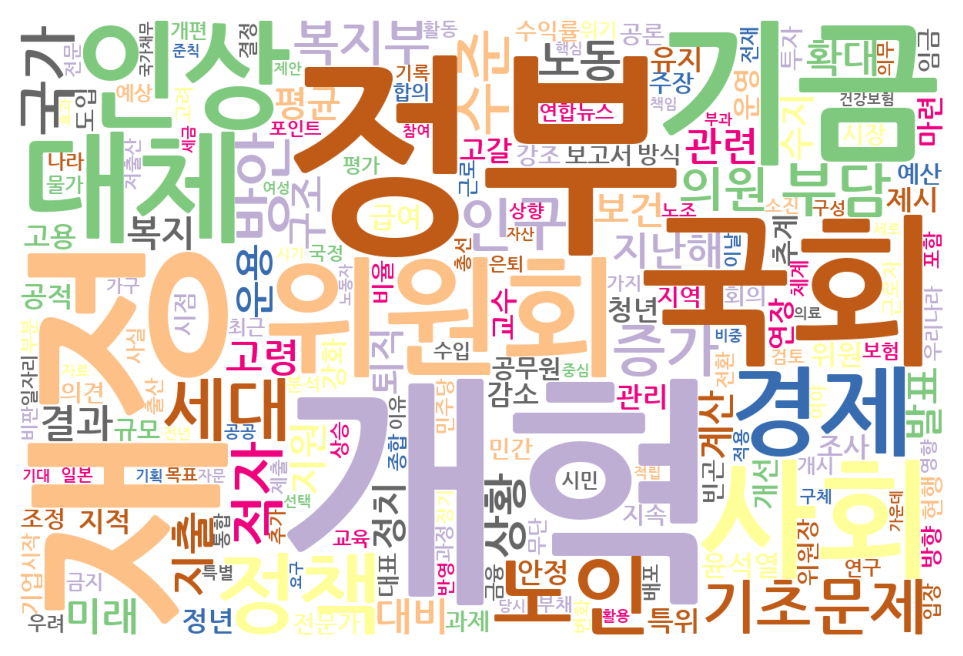

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 1200, height = 800).generate_from_frequencies(hund5)

plt.figure(figsize = (6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

## 감성분석

### SentiwordNet(긍정, 부정, 중립)

In [42]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np

In [ ]:
# pickle 파일로 저장된 데이터 불러오기
import pickle
f = open("../data/analysis_data/news/pension_news_topic_doc.pkl", "rb")
df = pickle.load(f) # 불러오기
f.close()
df

title  \
0             실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1                    국민연금 4월 말 수익률 379전월보다 악화   
2             포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3          연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4                국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   
...                                       ...   
52024   연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관   
52025               진옥동에 반대표 던진 국민연금업계 반응은 글쎄   
52026     하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까   
52028            주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디   

                                                     doc     ch  \
0      이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                     신혜선 인생은 길고 역할은 많아요  naver   
2      30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3      정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4      연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   
...                                                  ...    ...   
52024  연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...  naver   
52025  진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506  수정 ...  naver   
52026  하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...  naver   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...  naver   
52028  주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디입력 20230314 1103  ...  naver   

                                    title_token_list_pos  \
0      [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...   
1      [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...   
2      [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...   
3      [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...   
4      [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...   
...                                                  ...   
52024  [(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...   
52025  [(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...   
52026  [(하나, NR), (금융, NNP), (주총, NNG), (이승열, NNP), (...   
52027  [(비즈, NNP), (토크, NNP), (상, XSN), (닻, NNG), (올리...   
52028  [(주총, NNG), (시즌, NNP), (막, MAG), (오르, VV), (았,...   

                            title_token_noun  \
0                                   [실직, 지원]   
1                          [4월, 수익률, 전월, 악화]   
2                     [포착, 상식, 정부, 건강보험, 책임]   
3                               [피부, 9월, 보료]   
4                                      [토론회]   
...                                      ...   
52024                 [특위, 자문위, 개시, 상향, 사진관]   
52025                      [옥동, 반대표, 업계, 반응]   
52026  [금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관]   
52027              [비즈, 토크, 폭풍우, KT, 윤경, 출범]   
52028                           [총장, 예고, 기업]   

                                          doc_token_noun  \
0      [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                               [인생, 역할]   
2      [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3      [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4      [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   
...                                                  ...   
52024  [특위, 자문위, 개시, 상향, 사진관, 입력, 수정, 주호영, 국회, 개혁, 특별...   
52025  [옥동, 반대표, 업계, 반응, 수정, 수탁자, 책임, 전문, 위원회, 위원회, 신...   
52026  [금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관, 입력, 수정, ...   
52027  [비즈, 토크, 폭풍우, KT, 윤경, 출범, 입력, 수정, KT, 윤경, 그룹, ...   
52028  [총장, 예고, 기업, 입력, 수정, 국내, 대기업, 삼성전자, 시작, 2018년 ...   

                                      doc_token_list_pos  doc_topic  
0      [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          2  
1      [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          4  
2      [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          1  
3      [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          2  
4      [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          1  
...                                                  ...        ...  
52024  [(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...          1  
52025  [(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...          3

##  문서별 극성어휘,  극성값 부여, 감성점수(극성값들의 평균) 산출

In [ ]:
# 데이터프레임에 감성분석 score 삽입
import json
from tqdm import tqdm
# 감정분석 json데이터(knu감성사전) 불러오기
with open('../data/SentiWord_info.json',encoding = 'UTF-8') as json_file:
    sentiword = json.load(json_file)

s_word = []  
values = []
score = []

def average(list):  # 각 문서의 평균 감성 score 반환  # 리스트의 평균 값을 계산하는 함수
    return sum(list)/len(list)

for word in notebook.tqdm(df['doc']):
    temp_s_word=[]    # 문서에서 발견된 감성 단어 리스트 초기화
    temp_value=[]
    
# 감성사전에 있는 단어와 현재 문서의 단어 비교
    for s in (sentiword):
        if s['word'] in word:
            if len(s['word']) > 1 : # 한글자 이상의 감성단어와 비교 
                temp_s_word.append(s['word'])
                temp_value.append(int(s['polarity'])) 
    s_word.append(temp_s_word) # 해당하는 감성단어 추가
    values.append(temp_value) # 해당 단어의 polarity값 추가
    try:
        score.append(average(temp_value)) # 각 문서의 평균 polarity 추가
    except ZeroDivisionError:
        score.append(int(0))



  0%|          | 0/52029 [00:00<?, ?it/s]

In [46]:
# 결과 데이터프레임에 감성분석 결과 삽입
df=df.assign(sentiword = s_word,values=values,score=score) # 결과 데이터프레임에 삽입

In [ ]:
import pickle

# 갱신된 데이터프레임 파일로 저장
f = open("../data/analysis_data/news/pension_news_total_docs1.pkl", "wb")
pickle.dump(df, f)
f.close()

In [48]:
df.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...                [실직, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  \
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          2   
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          4   
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          1   
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          2   
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          1   

                                           sentiword  \
0  [개선, 기대, 높다, 능하고, 대상, 도움, 부담, 소득, 약한, 어려움, 어려움...   
1                                                 []   
2                                     [아니다, 전문가, 축하]   
3  [높은, 능력, 대상, 부담, 소득, 아니다, 없다, 인정, 제대로, 편안, 혜택,...   
4    [개선, 대상, 부담, 비판, 소득, 어려운, 없다, 자신감, 젊은, 좋을, 중요한]   

                                              values     score  
0  [2, 1, 1, 2, 1, 1, -2, 1, -1, -2, -2, 1, 1, 1,...  0.157895  
1                                                 []  0.000000  
2                                         [-2, 1, 2]  0.333333  
3            [1, 1, 1, -2, 1, -2, -1, 1, 1, 2, 1, 1]  0.416667  
4              [2, 1, -2, -1, 1, -2, -1, 1, 2, 2, 1]  0.363636

In [ ]:
import pickle

# 불러오기
f = open("../data/analysis_data/news/pension_news_total_docs1.pkl", "rb")
ff = pickle.load(f)
f.close()

In [50]:
# 데이터프레임 복원
import pandas as pd
total_docs = pd.DataFrame()
total_docs['doc'] = ff['doc']
total_docs['doc_token_noun'] = ff['doc_token_noun']
total_docs['doc_topic'] = ff['doc_topic']
total_docs['sentiword'] = ff['sentiword']
total_docs['values'] = ff['values']
total_docs['score'] = ff['score']
total_docs

doc  \
0      이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...   
1                                     신혜선 인생은 길고 역할은 많아요   
2      30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...   
3      정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...   
4      연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...   
...                                                  ...   
52024  연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...   
52025  진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506  수정 ...   
52026  하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...   
52028  주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디입력 20230314 1103  ...   

                                          doc_token_noun  doc_topic  \
0      [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...          2   
1                                               [인생, 역할]          4   
2      [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...          1   
3      [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...          2   
4      [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...          1   
...                                                  ...        ...   
52024  [특위, 자문위, 개시, 상향, 사진관, 입력, 수정, 주호영, 국회, 개혁, 특별...          1   
52025  [옥동, 반대표, 업계, 반응, 수정, 수탁자, 책임, 전문, 위원회, 위원회, 신...          3   
52026  [금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관, 입력, 수정, ...          3   
52027  [비즈, 토크, 폭풍우, KT, 윤경, 출범, 입력, 수정, KT, 윤경, 그룹, ...          3   
52028  [총장, 예고, 기업, 입력, 수정, 국내, 대기업, 삼성전자, 시작, 2018년 ...          3   

                                               sentiword  \
0      [개선, 기대, 높다, 능하고, 대상, 도움, 부담, 소득, 약한, 어려움, 어려움...   
1                                                     []   
2                                         [아니다, 전문가, 축하]   
3      [높은, 능력, 대상, 부담, 소득, 아니다, 없다, 인정, 제대로, 편안, 혜택,...   
4        [개선, 대상, 부담, 비판, 소득, 어려운, 없다, 자신감, 젊은, 좋을, 중요한]   
...                                                  ...   
52024                                           [상한, 소득]   
52025               [가치, 고한, 높은, 사모, 성을, 소홀, 자책, 함께, 훼손]   
52026                                   [개선, 성이, 소홀, 자책]   
52027  [가치, 다침, 못하다, 못한, 무사히, 발전, 불편, 불편한, 불황, 비판, 생생...   
52028  [개선, 개선하고, 걱정, 걱정을, 고한, 기대, 분에, 성을, 성이, 수선, 어수...   

                                                  values     score  
0      [2, 1, 1, 2, 1, 1, -2, 1, -1, -2, -2, 1, 1, 1,...  0.157895  
1                                                     []  0.000000  
2                                             [-2, 1, 2]  0.333333  
3                [1, 1, 1, -2, 1, -2, -1, 1, 1, 2, 1, 1]  0.416667  
4                  [2, 1, -2, -1, 1, -2, -1, 1, 2, 2, 1]  0.363636  
...                                                  ...       ...  
52024                                            [-2, 1] -0.500000  
52025                    [1, -2, 1, 2, 0, -2, -1, 1, -1] -0.111111  
52026                                     [2, 0, -2, -1] -0.250000  
52027  [1, -2, -2, -1, 1, 1, -2, -2, -2, -1, 1, 0, 0,... -0.107143  
52028  [2, 1, -2, -1, -2, 1, -2, 0, 0, -1, -1, -1, -1... -0.400000  

[52029 rows x 6 columns]

### 감성분석(토픽)

In [51]:
# 토픽별 평균 score에 따른 감성 클래스 구분
# 토픽별 평균 score 0.3 초과  -> 긍정
# 토픽별 평균 score -0.3 이상 0.3 이하  -> 중립
# 토픽별 평균 score -0.3 미만  -> 부정

senti_0 = [0,0,0,0,0,0]  # [긍정빈도, 긍정비율, 중립빈도, 중립비율, 부정빈도, 부정비율]
senti_1 = [0,0,0,0,0,0]
senti_2 = [0,0,0,0,0,0]
senti_3 = [0,0,0,0,0,0]
senti_4 = [0,0,0,0,0,0]

for i in trange(len(total_docs)):
    if total_docs['doc_topic'].iloc[i] == 0:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_0[0] = senti_0[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_0[2] = senti_0[2] + 1
        else:
            senti_0[4] = senti_0[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 1:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_1[0] = senti_1[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_1[2] = senti_1[2] + 1
        else:
            senti_1[4] = senti_1[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 2:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_2[0] = senti_2[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_2[2] = senti_2[2] + 1
        else:
            senti_2[4] = senti_2[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 3:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_3[0] = senti_3[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_3[2] = senti_3[2] + 1
        else:
            senti_3[4] = senti_3[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 4:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_4[0] = senti_4[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_4[2] = senti_4[2] + 1
        else:
            senti_4[4] = senti_4[4] + 1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52029/52029 [00:01<00:00, 36747.77it/s]


In [52]:
# 감성 클래스별 비율 계산
for i in trange(1,7,2):
    senti_0[i] = senti_0[i-1] / (senti_0[0]+senti_0[2]+senti_0[4])
for i in trange(1,7,2):
    senti_1[i] = senti_1[i-1] / (senti_1[0]+senti_1[2]+senti_1[4])
for i in trange(1,7,2):
    senti_2[i] = senti_2[i-1] / (senti_2[0]+senti_2[2]+senti_2[4])
for i in trange(1,7,2):
    senti_3[i] = senti_3[i-1] / (senti_3[0]+senti_3[2]+senti_3[4])
for i in trange(1,7,2):
    senti_4[i] = senti_4[i-1] / (senti_4[0]+senti_4[2]+senti_4[4])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42945.09it/s]


In [53]:
# 토픽별 감성 비율 데이터프레임 생성
graph = pd.DataFrame([senti_0,senti_1,senti_2,senti_3,senti_4],
                  index=['topic1','topic2','topic3','topic4','topic5'],
                  columns=[['긍정','긍정','중립','중립','부정','부정'],['빈도','비율','빈도','비율','빈도','비율']])

In [54]:
graph

긍정              중립              부정          
          빈도        비율    빈도        비율    빈도        비율
topic1  2523  0.382621  3024  0.458599  1047  0.158781
topic2  3214  0.220167  7982  0.546787  3402  0.233046
topic3  2720  0.293641  3986  0.430314  2557  0.276044
topic4  3245  0.333333  4255  0.437083  2235  0.229584
topic5  6809  0.575133  3795  0.320551  1235  0.104316

In [55]:
# 토픽별 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([ [senti_0[0],senti_0[2],senti_0[4]],
                           [senti_1[0],senti_1[2],senti_1[4]],
                           [senti_2[0],senti_2[2],senti_2[4]],
                           [senti_3[0],senti_3[2],senti_3[4]],
                           [senti_4[0],senti_4[2],senti_4[4]] ], index=['topic1','topic2','topic3','topic4','topic5'], columns=['긍정','중립','부정'])

In [56]:
senti_bar

긍정    중립    부정
topic1  2523  3024  1047
topic2  3214  7982  3402
topic3  2720  3986  2557
topic4  3245  4255  2235
topic5  6809  3795  1235

In [57]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [58]:
x= ['topic1','topic2','topic3','topic4','topic5']

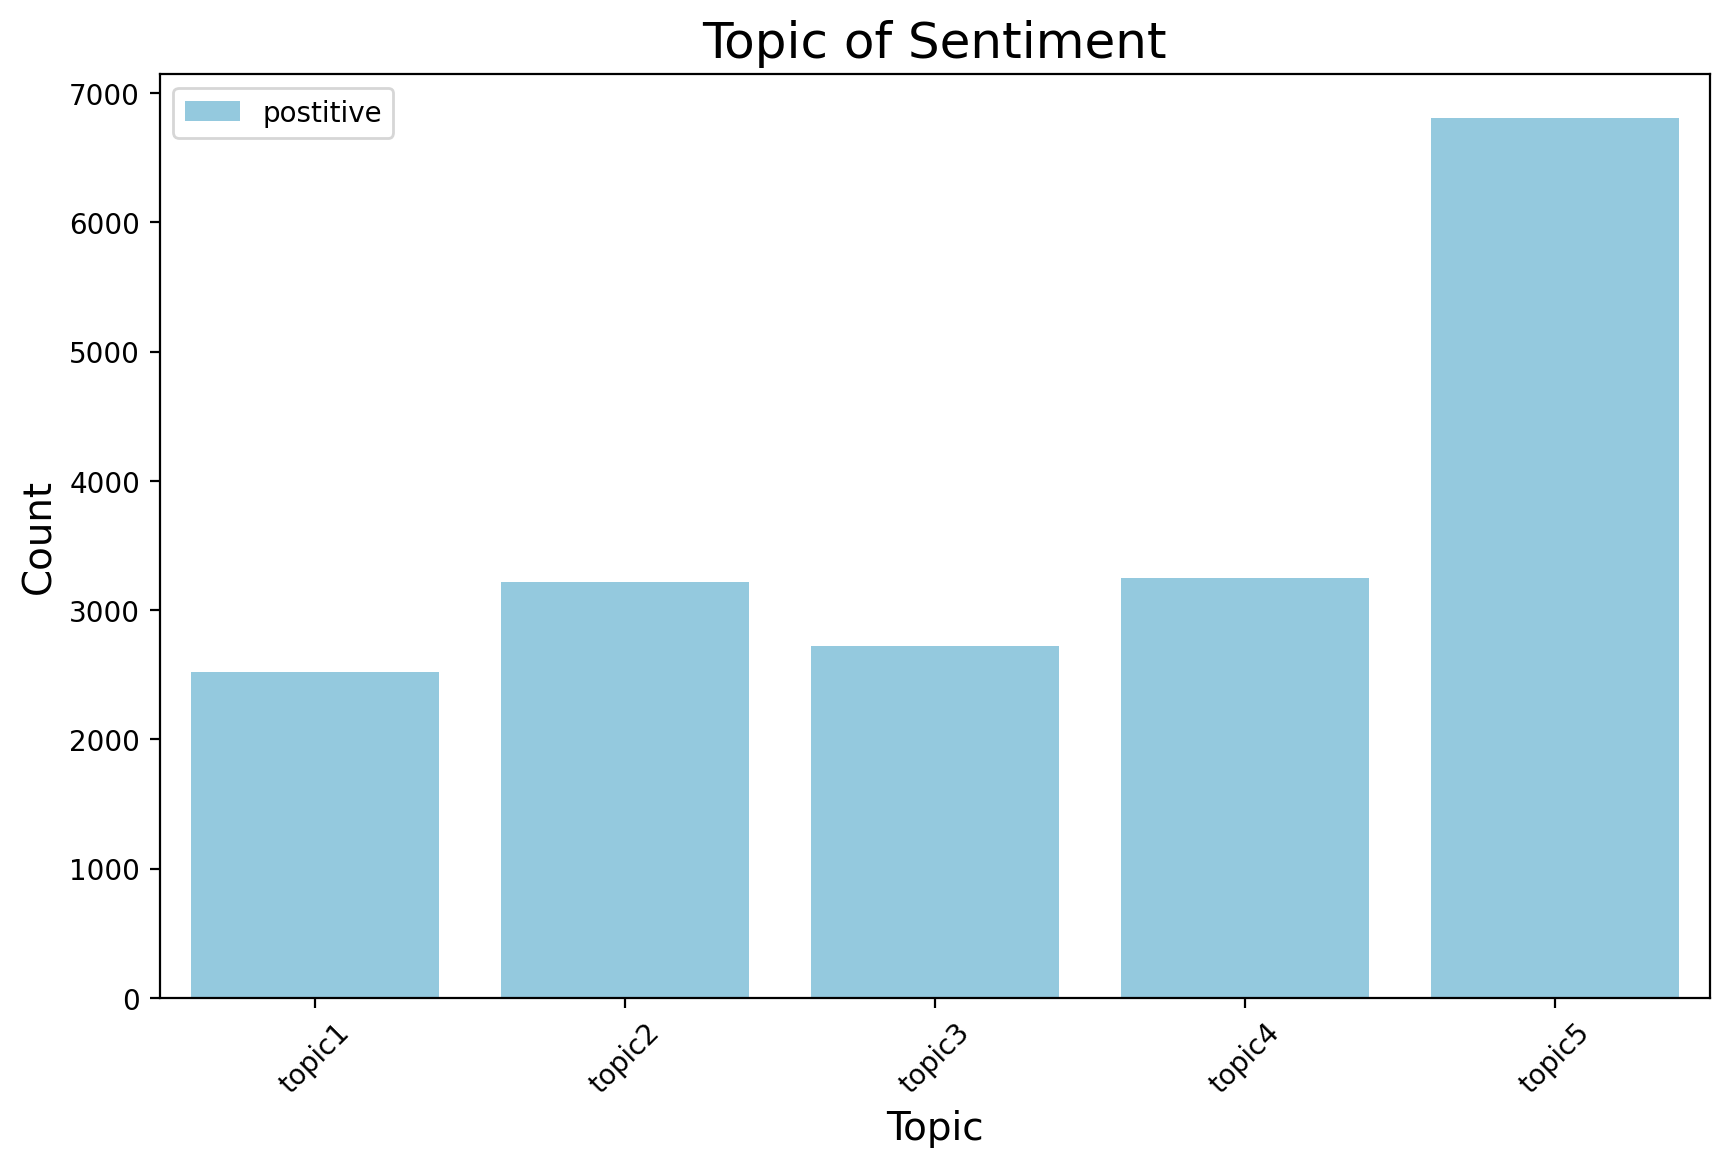

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=senti_bar['긍정'], data=senti_bar, color='skyblue', label='postitive')

# 제목, 축 레이블 설정
plt.title('Topic of Sentiment', fontsize=18)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend()

plt.show()

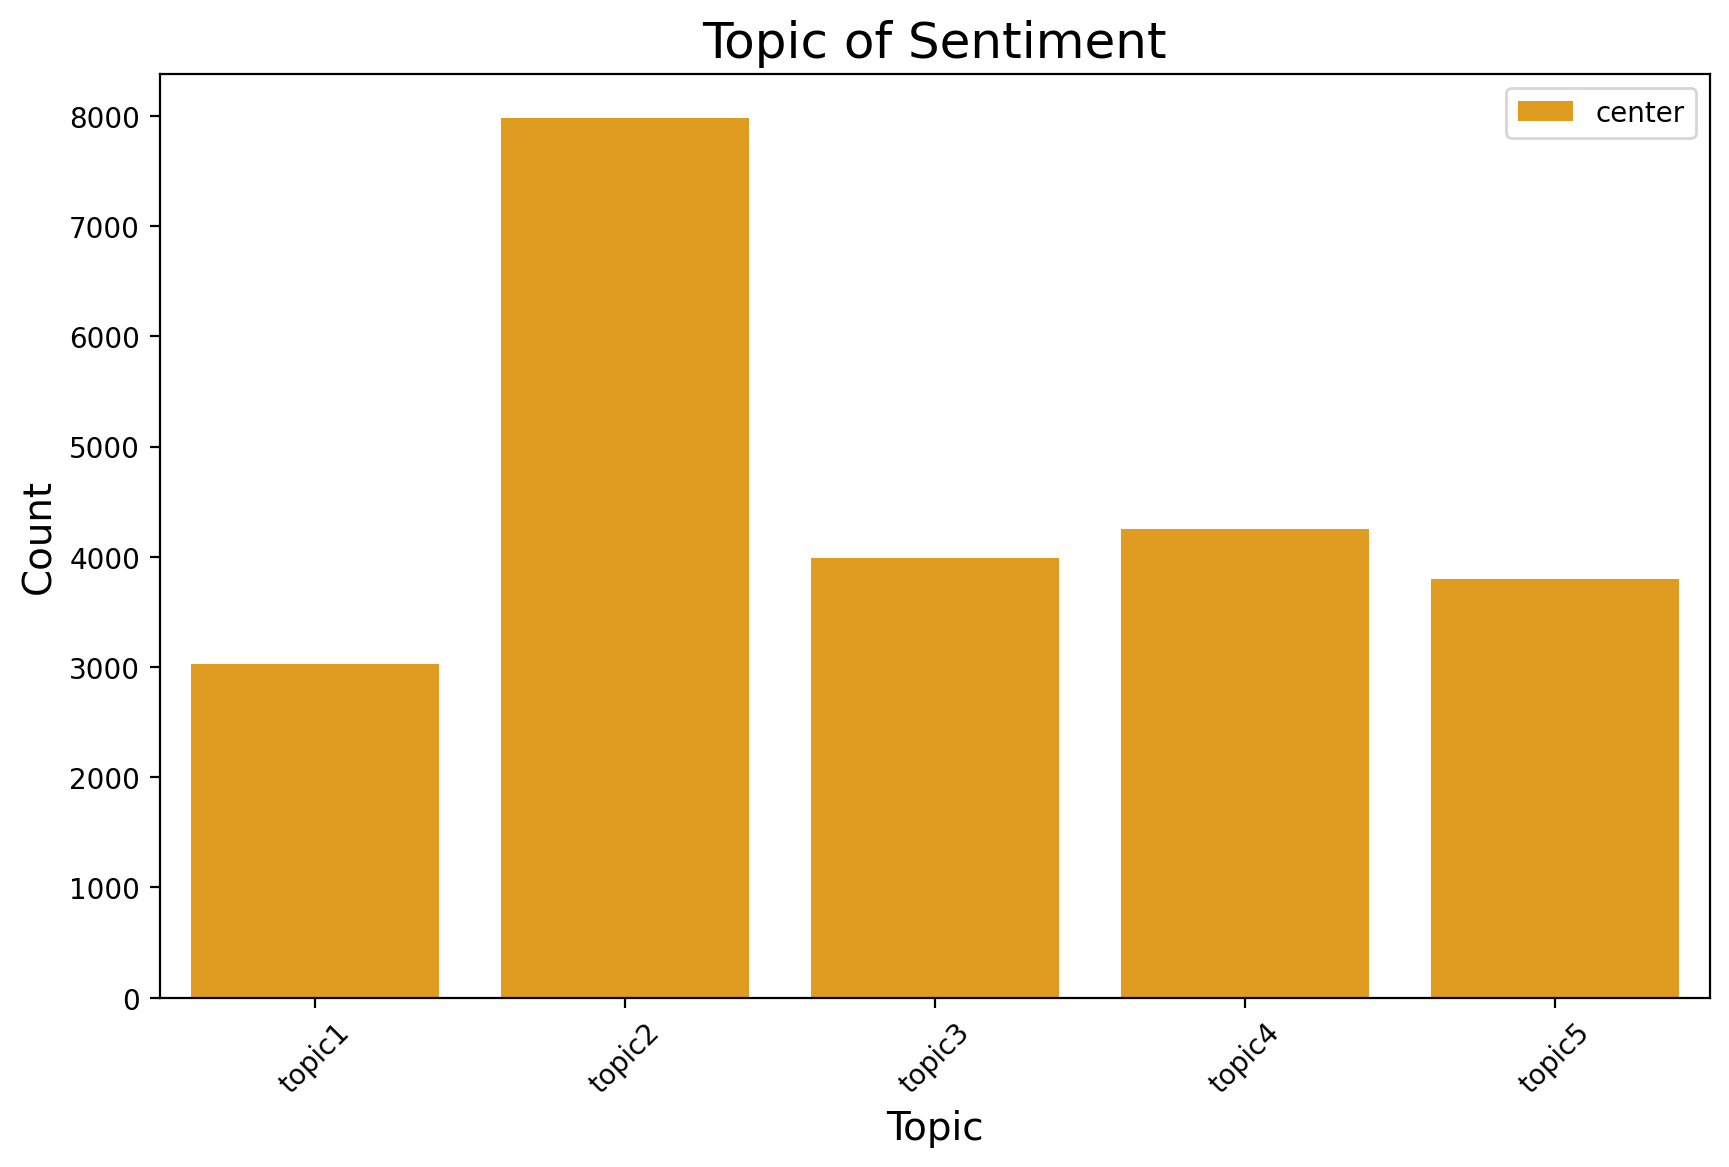

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=senti_bar['중립'], data=senti_bar, color='orange', label='center')

# 제목, 축 레이블 설정
plt.title('Topic of Sentiment', fontsize=18)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend()

plt.show()

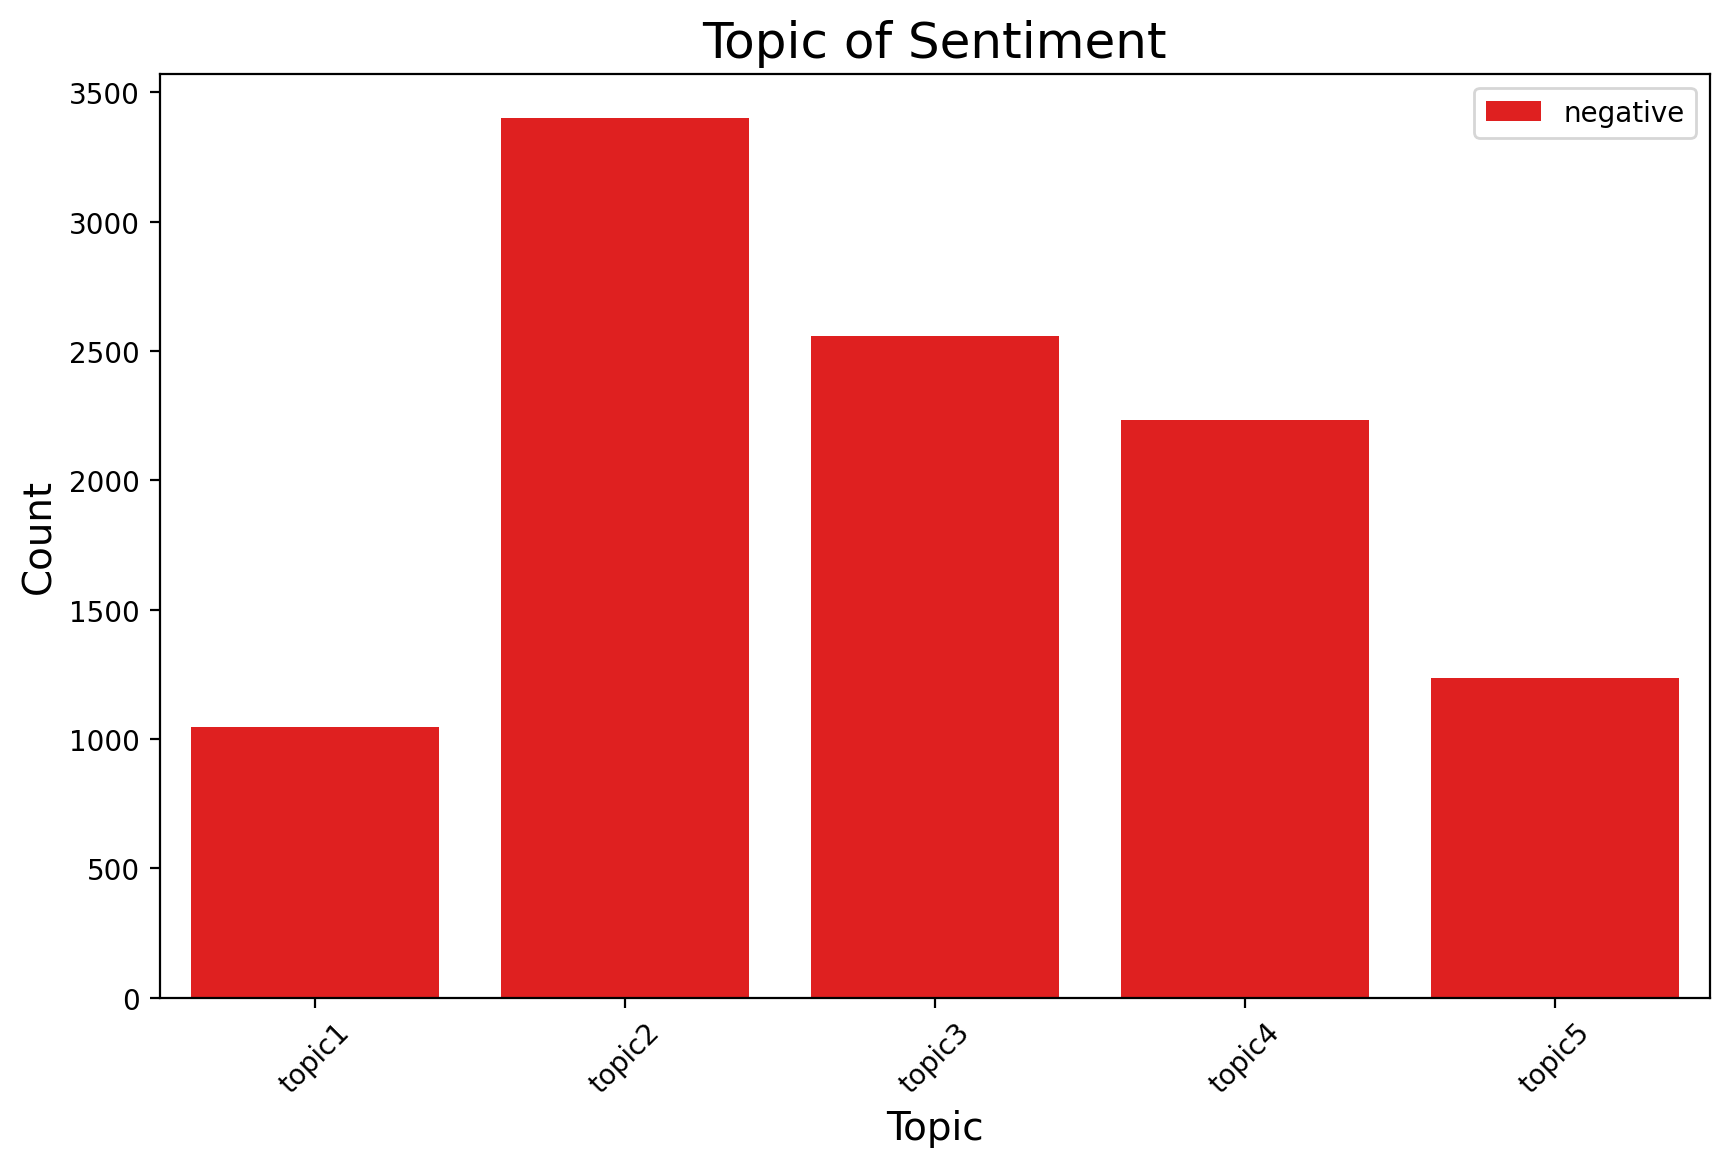

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=senti_bar['부정'], data=senti_bar, color='red', label='negative')

# 제목, 축 레이블 설정
plt.title('Topic of Sentiment', fontsize=18)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend()

plt.show()

## 토픽별 극성에 따른 어휘 비율 plot

In [62]:
 # 토픽별 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([[senti_0[1],senti_0[3],senti_0[5]],[senti_1[1],senti_1[3],senti_1[5]],[senti_2[1],senti_2[3],senti_2[5]], [senti_3[1],senti_3[3],senti_3[5]] , [senti_4[1],senti_4[3],senti_4[5]]],
                  index=['topic1','topic2','topic3','topic4','topic5'],
                  columns=['긍정','중립','부정'])

In [63]:
senti_bar

긍정        중립        부정
topic1  0.382621  0.458599  0.158781
topic2  0.220167  0.546787  0.233046
topic3  0.293641  0.430314  0.276044
topic4  0.333333  0.437083  0.229584
topic5  0.575133  0.320551  0.104316

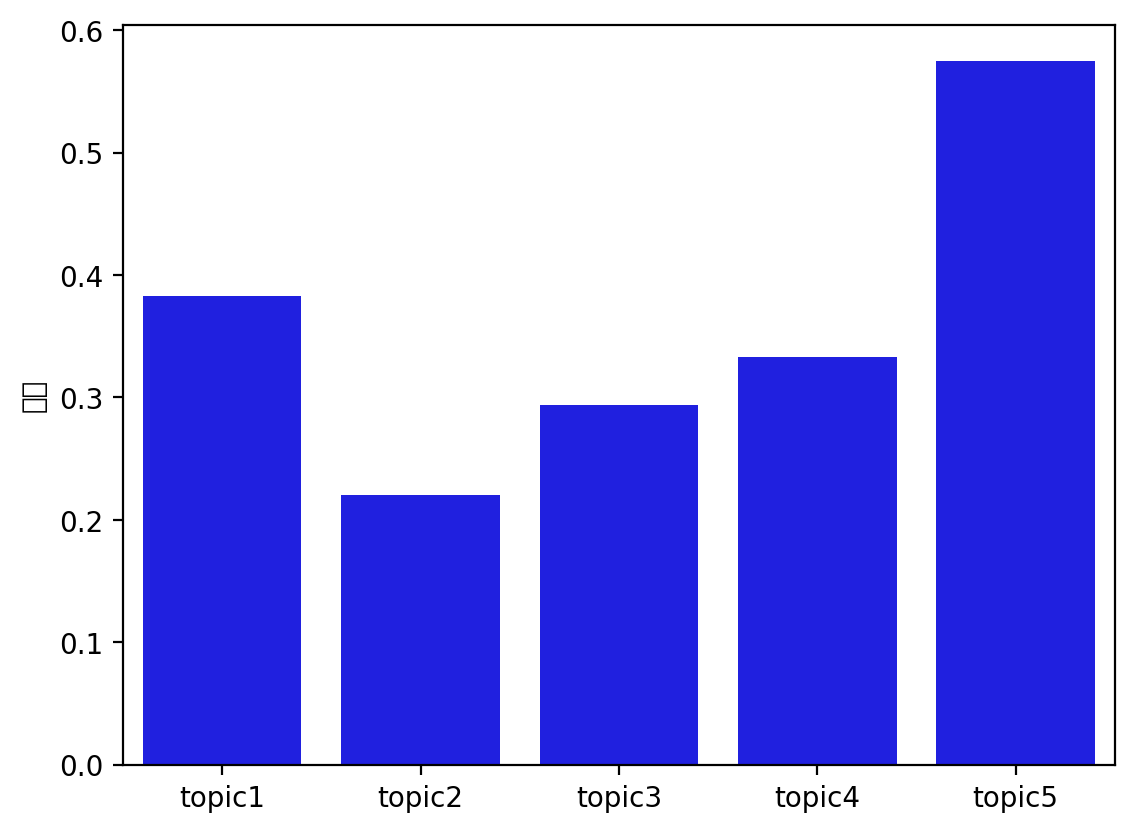

In [64]:
sns.barplot(x= senti_bar.index,y=senti_bar['긍정'], color='blue')
plt.show()

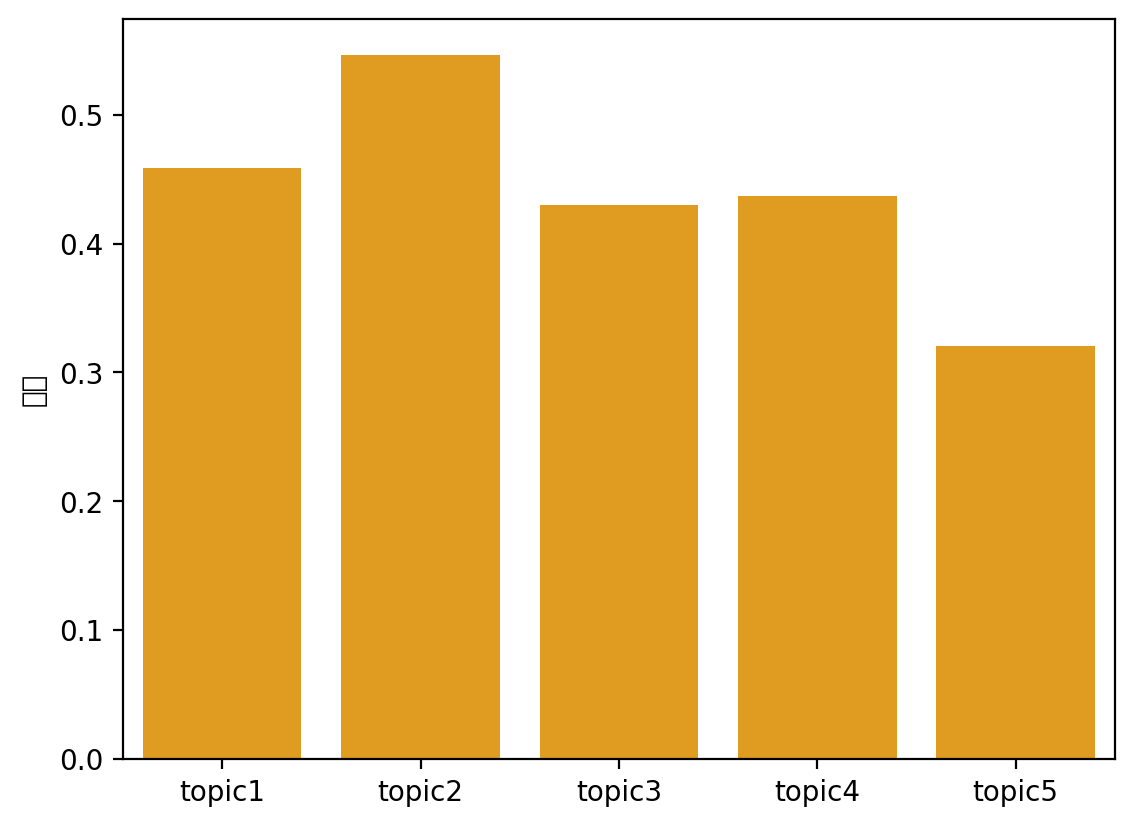

In [65]:
sns.barplot(x= senti_bar.index,y=senti_bar['중립'], color='orange')
plt.show()

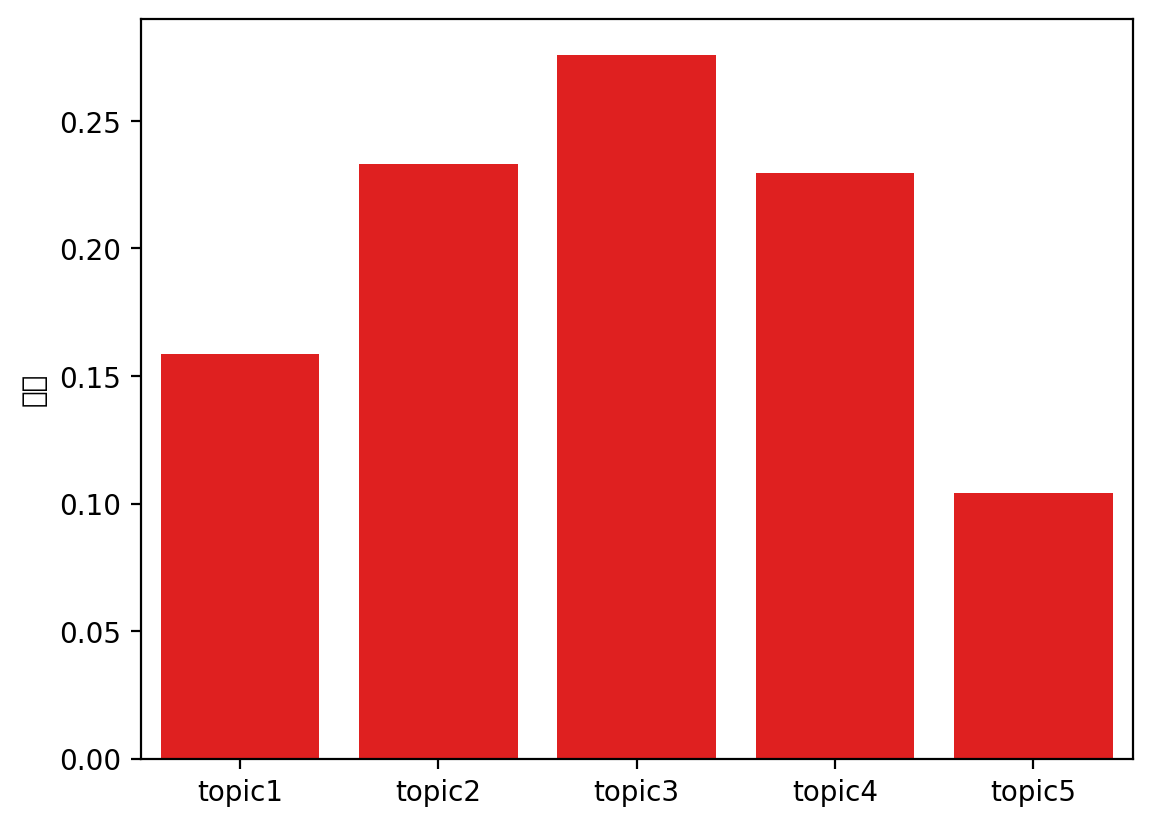

In [66]:
sns.barplot(x= senti_bar.index,y=senti_bar['부정'], color='red')
plt.show()

### 감성분석( 모든 토픽 전체)

In [67]:
# 전체 평균 score에 따른 감성 클래스 구분
# 전체 평균 score 0.3 초과  -> 긍정
# 전체 평균 score -0.3 이상 0.3 이하  -> 중립
# 전체 평균 score -0.3 미만  -> 부정

senti_total = [0,0,0,0,0,0]

for i in trange(len(total_docs)):
    if total_docs['score'].iloc[i] > 0.3:  
        senti_total[0] = senti_total[0] + 1
    elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
        senti_total[2] = senti_total[2] + 1
    else:
        senti_total[4] = senti_total[4] + 1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52029/52029 [00:00<00:00, 83922.08it/s]


In [68]:
# 전체 감성 클래스별 비율 계산
for i in trange(1,7,2):
    senti_total[i] = senti_total[i-1] / (senti_total[0] + senti_total[2] +senti_total[4])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 20100.50it/s]


In [69]:
# 전체 감성 비율 데이터프레임 생성
graph = pd.DataFrame([senti_total], index=['전체'],
                  columns=[['긍정','긍정','중립','중립','부정','부정'],['빈도','비율','빈도','비율','빈도','비율']])

In [70]:
graph

긍정               중립               부정          
       빈도        비율     빈도        비율     빈도        비율
전체  18511  0.355782  23042  0.442868  10476  0.201349

In [71]:
# 전체 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([[senti_total[0],senti_total[2],senti_total[4]],],
                        index = ['전체'], columns = ['긍정','중립','부정'])

In [72]:
senti_bar

긍정     중립     부정
전체  18511  23042  10476

### Emolex

In [ ]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict # 딕셔너리 기본값을 설정할 수 있는 라이브러리
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud # Word Cloud 만들기
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리

from IPython.display import set_matplotlib_formats #matplotlib의 plot 출력 형식 지정 Ex: set_matplotlib_formats('pdf', 'svg'), svg(Scalable Vector Graphics)
from gensim import corpora, models # 토픽 모델링을 위한 라이브러리
set_matplotlib_formats('retina')   # 고해상도 시각화
font_path = '../data/NanumGothicBold.ttf'  # 폰트 경로 지정
from sklearn.cluster import KMeans # KMeans 군집화 알고리즘을 사용하는 라이브러리
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

In [74]:
from tqdm import trange, notebook

In [ ]:
# pickle 파일에서 데이터 불러오기
import pickle
f = open("../data/analysis_data/news/pension_news_topic_doc.pkl", "rb")
data = pickle.load(f) # 불러오기
f.close()
data

title  \
0             실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1                    국민연금 4월 말 수익률 379전월보다 악화   
2             포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3          연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4                국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   
...                                       ...   
52024   연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관   
52025               진옥동에 반대표 던진 국민연금업계 반응은 글쎄   
52026     하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까   
52028            주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디   

                                                     doc     ch  \
0      이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                     신혜선 인생은 길고 역할은 많아요  naver   
2      30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3      정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4      연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   
...                                                  ...    ...   
52024  연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...  naver   
52025  진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506  수정 ...  naver   
52026  하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...  naver   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...  naver   
52028  주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디입력 20230314 1103  ...  naver   

                                    title_token_list_pos  \
0      [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...   
1      [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...   
2      [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...   
3      [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...   
4      [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...   
...                                                  ...   
52024  [(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...   
52025  [(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...   
52026  [(하나, NR), (금융, NNP), (주총, NNG), (이승열, NNP), (...   
52027  [(비즈, NNP), (토크, NNP), (상, XSN), (닻, NNG), (올리...   
52028  [(주총, NNG), (시즌, NNP), (막, MAG), (오르, VV), (았,...   

                            title_token_noun  \
0                                   [실직, 지원]   
1                          [4월, 수익률, 전월, 악화]   
2                     [포착, 상식, 정부, 건강보험, 책임]   
3                               [피부, 9월, 보료]   
4                                      [토론회]   
...                                      ...   
52024                 [특위, 자문위, 개시, 상향, 사진관]   
52025                      [옥동, 반대표, 업계, 반응]   
52026  [금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관]   
52027              [비즈, 토크, 폭풍우, KT, 윤경, 출범]   
52028                           [총장, 예고, 기업]   

                                          doc_token_noun  \
0      [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                               [인생, 역할]   
2      [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3      [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4      [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   
...                                                  ...   
52024  [특위, 자문위, 개시, 상향, 사진관, 입력, 수정, 주호영, 국회, 개혁, 특별...   
52025  [옥동, 반대표, 업계, 반응, 수정, 수탁자, 책임, 전문, 위원회, 위원회, 신...   
52026  [금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관, 입력, 수정, ...   
52027  [비즈, 토크, 폭풍우, KT, 윤경, 출범, 입력, 수정, KT, 윤경, 그룹, ...   
52028  [총장, 예고, 기업, 입력, 수정, 국내, 대기업, 삼성전자, 시작, 2018년 ...   

                                      doc_token_list_pos  doc_topic  
0      [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          2  
1      [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          4  
2      [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          1  
3      [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          2  
4      [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          1  
...                                                  ...        ...  
52024  [(연금, NNG), (특위, NNG), (자문위, NNG), (국민연금, NNP)...          1  
52025  [(지, VX), (ㄴ, ETM), (옥동, NNP), (에, JKB), (반대표,...          3

In [ ]:
# 한국어 감성사전 파일 불러오기
nrc = pd.read_table("../data/Korean-NRC-EmoLex.txt", engine = "python", header = None, sep = "\t")

In [77]:
# 감성사전 열 이름 지정 및 불필요한 행 제거
nrc.columns = nrc.iloc[0]
nrc = nrc[1:]
nrc.reset_index(drop=True, inplace=True)  #기존인텍스를 삭제하고 Dataframe을 수정
nrc

0     English Word anger anticipation disgust fear joy negative positive  \
0            aback     0            0       0    0   0        0        0   
1           abacus     0            0       0    0   0        0        0   
2          abandon     0            0       0    1   0        1        0   
3        abandoned     1            0       0    1   0        1        0   
4      abandonment     1            0       0    1   0        1        0   
...            ...   ...          ...     ...  ...  ..      ...      ...   
14149         zone     0            0       0    0   0        0        0   
14150          zoo     0            0       0    0   0        0        0   
14151   zoological     0            0       0    0   0        0        0   
14152      zoology     0            0       0    0   0        0        0   
14153         zoom     0            0       0    0   0        0        0   

0     sadness surprise trust Korean Word  
0           0        0     0          당황  
1           0        0     1          주판  
2           1        0     0         버리다  
3           1        0     0         버려진  
4           1        1     0          포기  
...       ...      ...   ...         ...  
14149       0        0     0           존  
14150       0        0     0         동물원  
14151       0        0     0         동물학  
14152       0        0     0         동물학  
14153       0        0     0           줌  

[14154 rows x 12 columns]

In [78]:
data.shape

(52029, 8)

In [79]:
len(nrc['Korean Word'])

14154

In [80]:
from tqdm import trange, notebook

In [81]:
# 데이터프레임에 감성사전의 감성값 삽입
s_word = []
values = []

for word in notebook.tqdm(data['doc']):
    temp_s_word=[]   # 문서에서 발견된 감성사전의 단어 리스트 초기화
    temp_value = [0,0,0,0,0,0,0,0,0,0]   # 초기 감성값 리스트 초기화
    
# 감성사전의 단어와 현재 문서의 단어를 비교
    for i in range(1, len(nrc)):
        if nrc['Korean Word'][i] in word:
            if len(nrc['Korean Word'][i]) > 1:
                temp_s_word.append(nrc['Korean Word'][i])
                b = list(map(int, nrc.iloc[i,1:11].tolist())) # 1~10 번째 변수(감성어휘)를 리스트로 반환한 후 정수로 변환 
                temp_value = [x + y for x, y in zip(temp_value,b)] # temp_value & b 변수를 쌍으로 묶어 합쳐라
    s_word.append(temp_s_word) # 현재 문서에서 발견된 감성사전의 단어 리스트를 전체 리스트에 추가
    values.append(temp_value)  # 현재 문서에서 발견된 감성사전의 감성값 리스트를 전체 리스트에 추가

# 결과 데이터프레임에 감성사전 결과 삽입
data=data.assign(sentiword = s_word,values=values) # 결과 데이터프레임에 삽입

  0%|          | 0/52029 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import pickle

# 갱신된 데이터프레임 파일로 저장
f = open("../data/analysis_data/news/pension_news_불용어처리_emolex.pkl", "wb")
pickle.dump(data, f)
f.close()

In [17]:
data.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...            [실직, 지역, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 지역, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  \
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          0   
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          3   
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          0   
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          4   
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          4   

                                           sentiword  \
0  [가입, 가입, 지원, 전부, 확대, 부가, 연금, 신청, 지역, 준비, 시작, 보...   
1                                               [역할]   
2  [책임, 행동, 관리, 공기, 공기, 주장, 범위, 확대, 발표, 연금, 반대, 주...   
3  [능력, 이상, 가입, 인정, 토지, 추가, 지방, 가입, 인정, 인정, 양자, 나...   
4  [입장, 가입, 가입, 입장, 오후, 아가, 앞으로, 완화, 주장, 연금, 어려운,...   

                                 values  
0    [4, 17, 2, 4, 3, 14, 26, 5, 0, 12]  
1        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
2     [7, 7, 3, 5, 5, 13, 17, 0, 3, 14]  
3    [4, 10, 5, 6, 9, 20, 26, 9, 5, 18]  
4  [5, 14, 5, 11, 10, 18, 47, 7, 3, 30]

In [ ]:
ff= pd.read_pickle("../data/analysis_data/news/pension_news_불용어처리_emolex.pkl")

In [20]:
# 데이터프레임 복원
import pandas as pd
total_docs = pd.DataFrame()
total_docs['doc'] = ff['doc']
total_docs['doc_token_noun'] = ff['doc_token_noun']
total_docs['doc_topic'] = ff['doc_topic']
total_docs['sentiword'] = ff['sentiword']
total_docs['values'] = ff['values']
total_docs

doc  \
0      이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...   
1                                     신혜선 인생은 길고 역할은 많아요   
2      30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...   
3      정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...   
4      연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...   
...                                                  ...   
52024  연금특위 자문위 국민연금 보험료율 수급개시 연령 상향해야 TF사진관입력 202303...   
52025  진옥동에 반대표 던진 국민연금업계 반응은 글쎄입력 20230317 1506  수정 ...   
52026  하나금융 주총 이승열 행장 비상임이사 선임분기배당 위한 정관변경입력 20230324...   
52027  비즈토크상 닻 올리기 전 몰아치는 폭풍우KT 윤경림호 무사히 출범할까입력 20230...   
52028  주총 시즌 막 올랐다뜨거운 주총장 예고한 기업 어디입력 20230314 1103  ...   

                                          doc_token_noun  doc_topic  \
0      [보건, 복지부, 지역, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선,...          0   
1                                               [인생, 역할]          3   
2      [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...          0   
3      [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...          4   
4      [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...          4   
...                                                  ...        ...   
52024  [특위, 자문위, 개시, 상향, 사진관, 입력, 수정, 주호영, 국회, 개혁, 특별...          4   
52025  [옥동, 반대표, 업계, 반응, 수정, 수탁자, 책임, 전문, 위원회, 위원회, 신...          2   
52026  [금융, 이승열, 행장, 비상, 이사, 선임, 분기, 배당, 정관, 입력, 수정, ...          2   
52027  [비즈, 토크, 폭풍우, KT, 윤경, 출범, 입력, 수정, KT, 윤경, 그룹, ...          2   
52028  [총장, 예고, 기업, 입력, 수정, 국내, 대기업, 삼성전자, 시작, 2018년 ...          2   

                                               sentiword  \
0      [가입, 가입, 지원, 전부, 확대, 부가, 연금, 신청, 지역, 준비, 시작, 보...   
1                                                   [역할]   
2      [책임, 행동, 관리, 공기, 공기, 주장, 범위, 확대, 발표, 연금, 반대, 주...   
3      [능력, 이상, 가입, 인정, 토지, 추가, 지방, 가입, 인정, 인정, 양자, 나...   
4      [입장, 가입, 가입, 입장, 오후, 아가, 앞으로, 완화, 주장, 연금, 어려운,...   
...                                                  ...   
52024  [입장, 가입, 가입, 입장, 주장, 발표, 연금, 주장, 공동, 위원장, 오는, ...   
52025  [학원, 입장, 책임, 입장, 대주, 경고, 분석, 연금, 반대, 정자, 자산, 찬...   
52026  [이상, 책임, 행정, 전에, 대주, 배당, 변경, 연금, 반대, 찬성, 찬성, 은...   
52027  [포기, 아바, 고발, 고발, 에이스, 동의, 동의, 합의, 대주, 배당, 융합, ...   
52028  [이상, 책임, 승인, 현실, 주소, 대주, 배당, 변경, 확대, 부가, 연금, 승...   

                                         values  
0            [4, 17, 2, 4, 3, 14, 26, 5, 0, 12]  
1                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
2             [7, 7, 3, 5, 5, 13, 17, 0, 3, 14]  
3            [4, 10, 5, 6, 9, 20, 26, 9, 5, 18]  
4          [5, 14, 5, 11, 10, 18, 47, 7, 3, 30]  
...                                         ...  
52024           [2, 6, 2, 1, 1, 6, 10, 2, 0, 6]  
52025        [9, 5, 2, 12, 1, 17, 22, 3, 4, 11]  
52026        [9, 6, 6, 10, 3, 22, 24, 4, 3, 11]  
52027  [32, 26, 13, 27, 10, 46, 72, 14, 10, 39]  
52028    [15, 19, 10, 18, 5, 38, 52, 11, 4, 22]  

[52029 rows x 5 columns]

In [22]:
# 토픽별 감성값 누적
senti_0 = [0,0,0,0,0,0,0,0,0,0]
senti_1 = [0,0,0,0,0,0,0,0,0,0]
senti_2 = [0,0,0,0,0,0,0,0,0,0]
senti_3 = [0,0,0,0,0,0,0,0,0,0]
senti_4 = [0,0,0,0,0,0,0,0,0,0]

for i in range(len(total_docs)):
    if total_docs['doc_topic'].iloc[i] == 0:
        senti_0 = [x + y for x, y in zip(senti_0,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 1:
        senti_1 = [x + y for x, y in zip(senti_1,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 2:
        senti_2 = [x + y for x, y in zip(senti_2,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 3:
        senti_3 = [x + y for x, y in zip(senti_3,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 4:
        senti_4 = [x + y for x, y in zip(senti_4,total_docs.iloc[i,4])]

In [23]:
# 토픽별 감성값 데이터프레임 생성
graph = pd.DataFrame([senti_0,senti_1,senti_2,senti_3,senti_4],
                  index=['topic1','topic2','topic3','topic4','topic5'],
                  columns=['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'])

In [167]:
graph

anger  anticipation  disgust   fear    joy  negative  positive  \
topic1  19635         43800    16447  30901  23614     68962    101533   
topic2   7591         19457     6818  10413  12544     25757     42029   
topic3  31318         65849    27374  49137  33313    111136    148771   
topic4  36239         61709    27905  50803  29346    108506    138991   
topic5  16585         37618    15286  26247  19645     59057     92645   
topic6  31410         50082    21639  44097  23559     89901    122415   

        sadness  surprise  trust  
topic1    29433     12342  65782  
topic2     9973      5520  24342  
topic3    48536     17723  99115  
topic4    43234     17845  83543  
topic5    24280     10418  65991  
topic6    31713     18143  71140

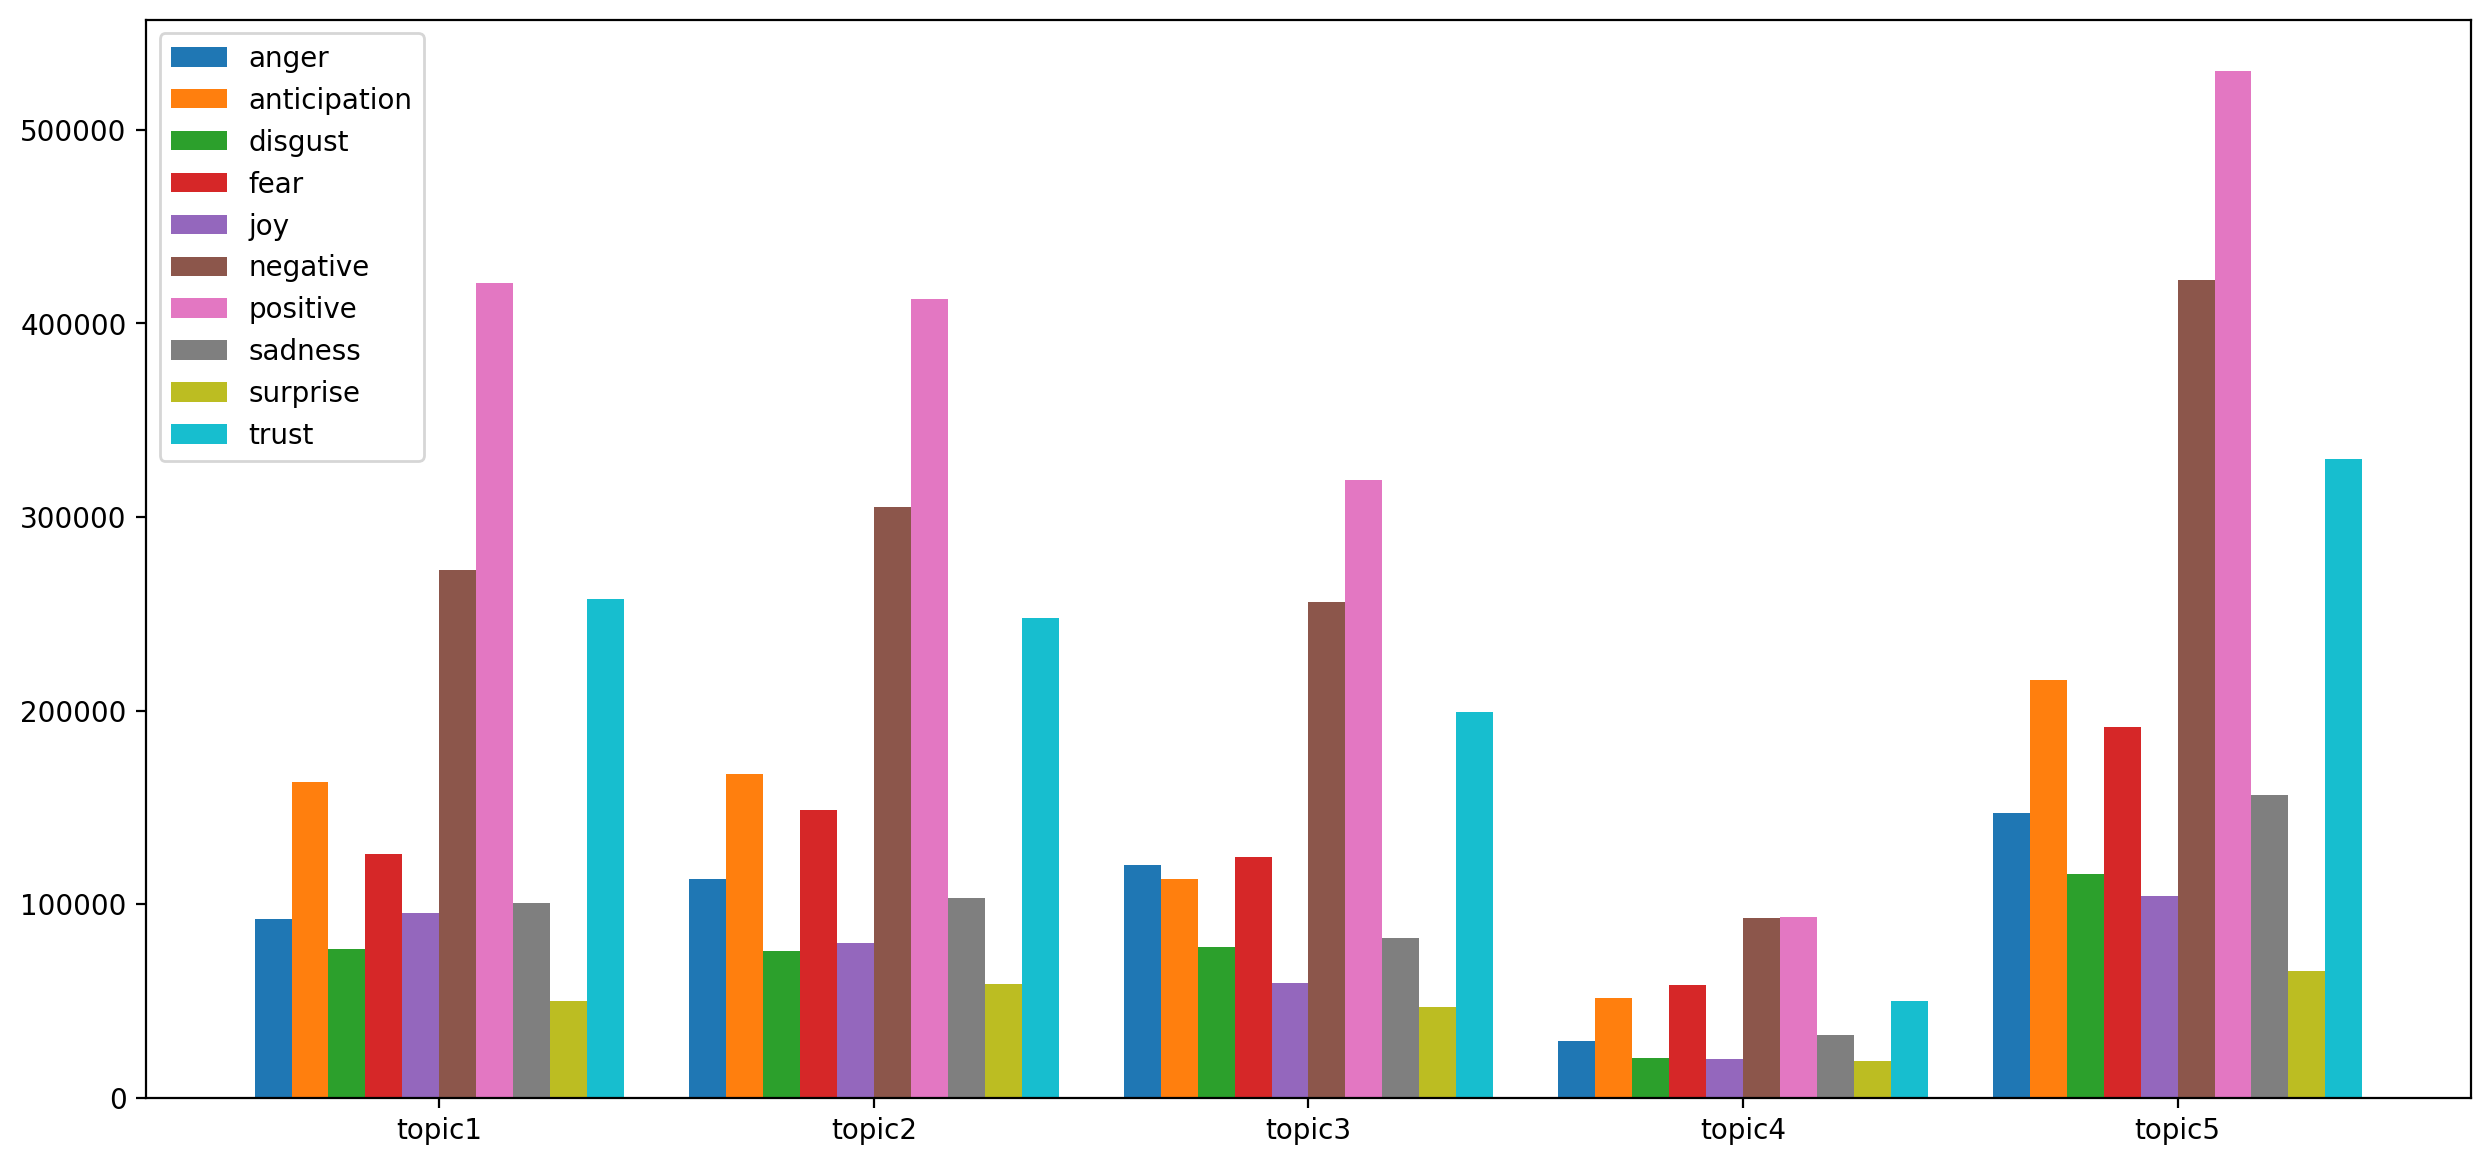

In [27]:
# 토픽별 감성값 막대 그래프
graph_plot = graph.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  

In [31]:
# 전체 감성값 누적
senti_total = [0,0,0,0,0,0,0,0,0,0]

for i in trange(len(total_docs)):
    senti_total = [x + y for x, y in zip(senti_total,total_docs.iloc[i,-1])]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52029/52029 [00:00<00:00, 85845.57it/s]


In [33]:
# 전체 감성값 데이터프레임 생성
graph = pd.DataFrame([senti_total],
                  index=['total'],
                  columns=['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'])

In [34]:
graph

anger  anticipation  disgust    fear     joy  negative  positive  \
total  501575        710620   366067  648295  358349   1348894   1776310   

       sadness  surprise    trust  
total   474872    239373  1084633

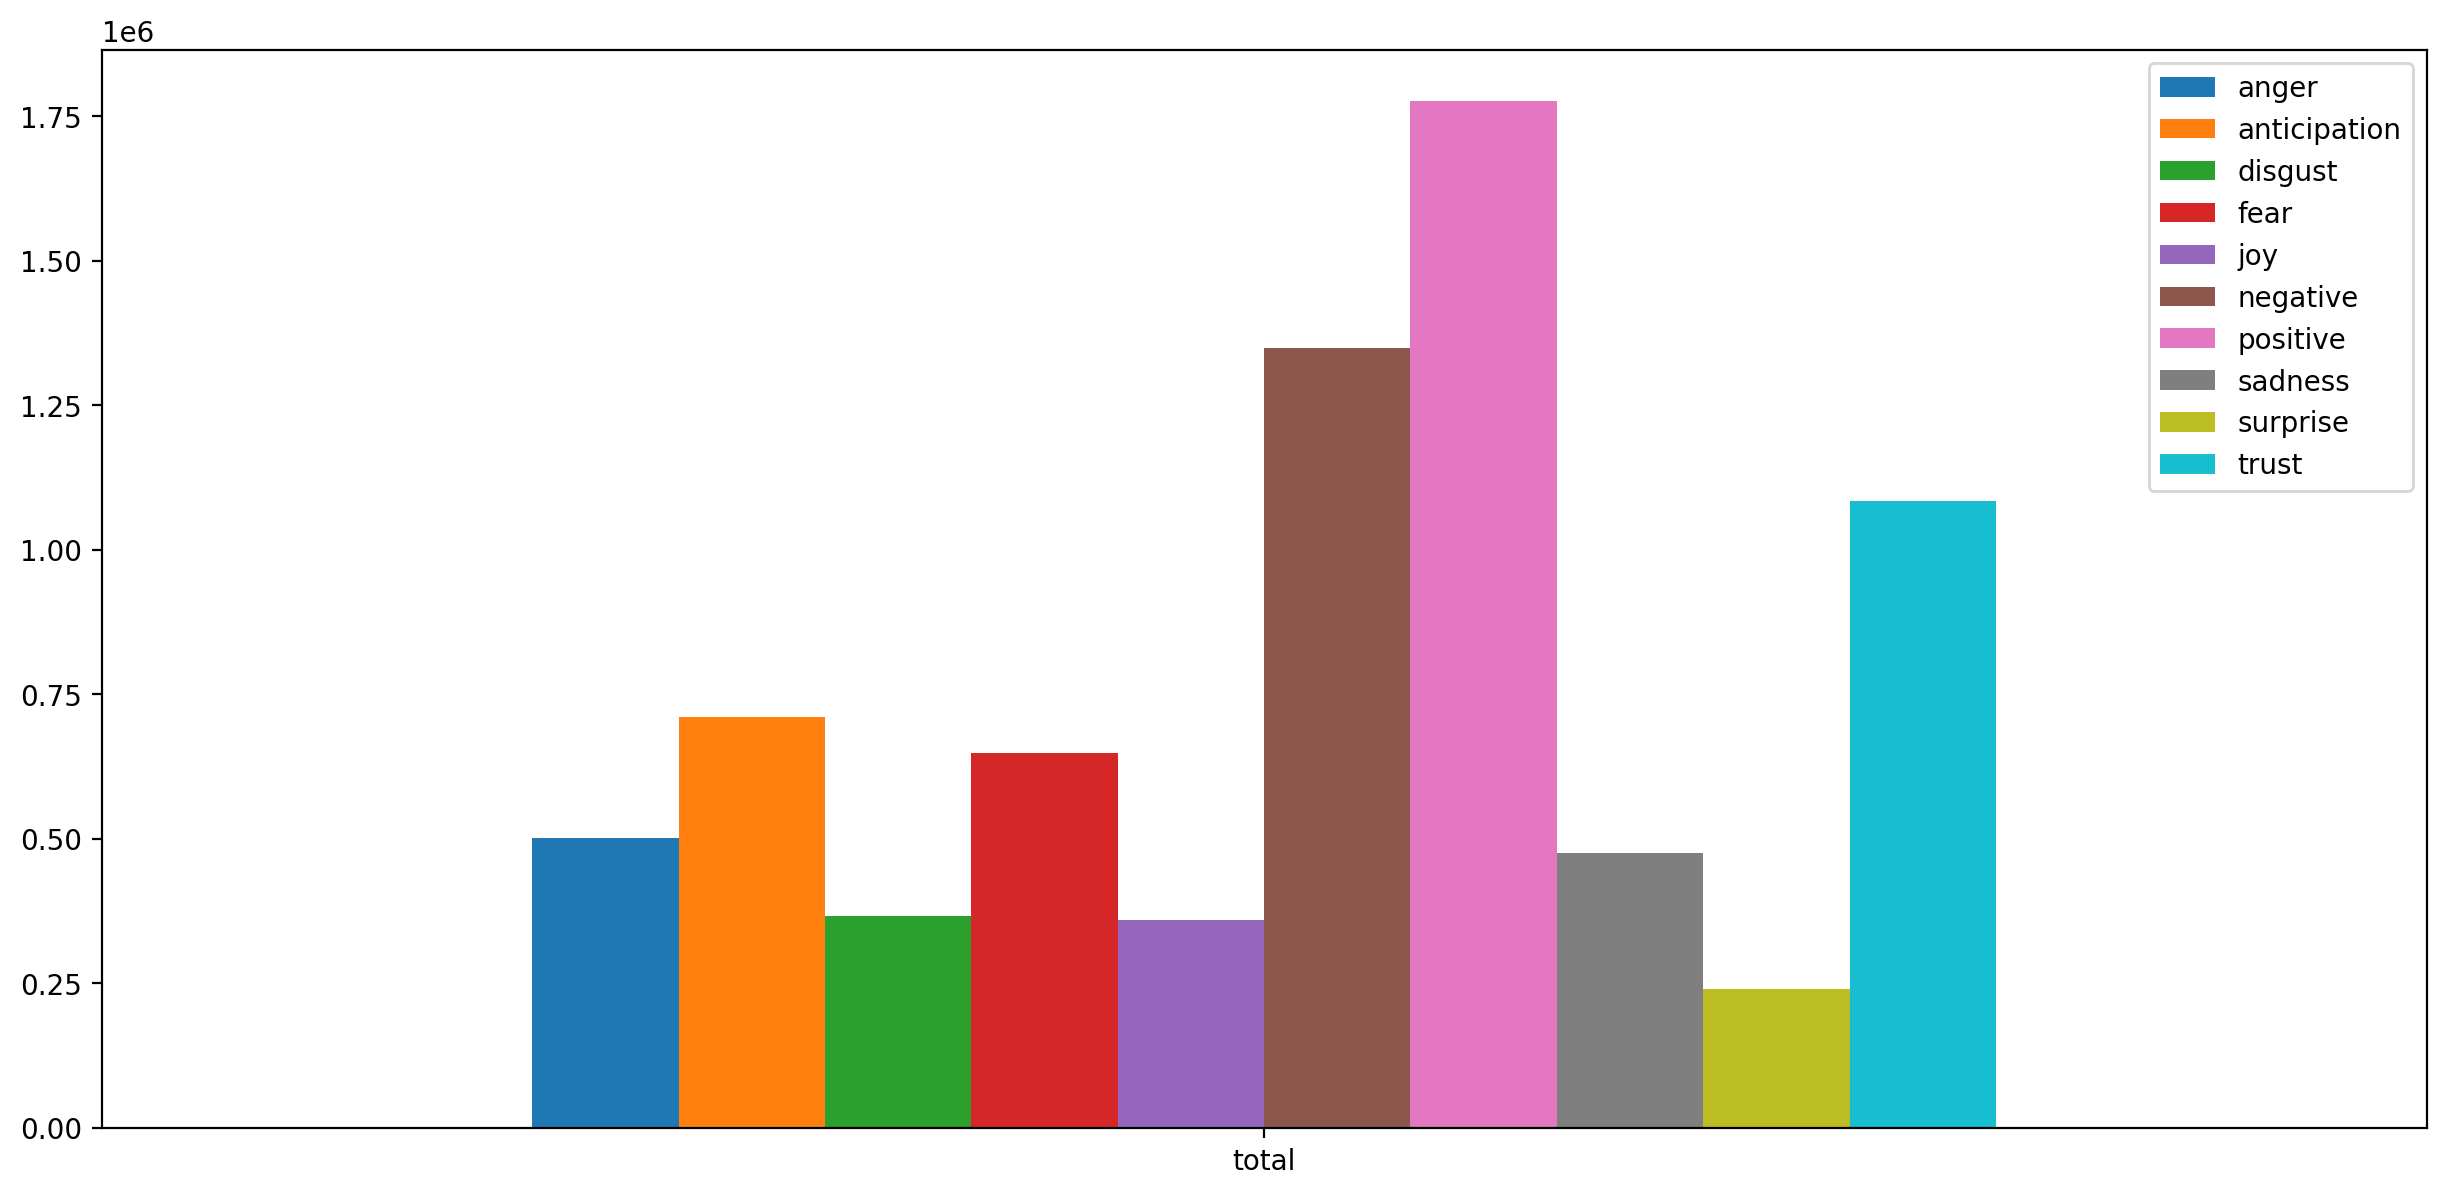

In [35]:
# 전체 감성값 막대 그래프
graph_plot = graph.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  



## N-gram

In [82]:
# 라이브러리 불러오기
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # 자연어 처리를 위한 파이썬 패키지
from nltk.util import ngrams # 문자열에서 N개의 연속된 요소를 추출하는 방법

In [ ]:
df= pd.read_pickle("../data/analysis_data/news/pension_news_total_docs1.pkl")

In [84]:
df.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...                [실직, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  \
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          2   
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          4   
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          1   
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          2   
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          1   

                                           sentiword  \
0  [개선, 기대, 높다, 능하고, 대상, 도움, 부담, 소득, 약한, 어려움, 어려움...   
1                                                 []   
2                                     [아니다, 전문가, 축하]   
3  [높은, 능력, 대상, 부담, 소득, 아니다, 없다, 인정, 제대로, 편안, 혜택,...   
4    [개선, 대상, 부담, 비판, 소득, 어려운, 없다, 자신감, 젊은, 좋을, 중요한]   

                                              values     score  
0  [2, 1, 1, 2, 1, 1, -2, 1, -1, -2, -2, 1, 1, 1,...  0.157895  
1                                                 []  0.000000  
2                                         [-2, 1, 2]  0.333333  
3            [1, 1, 1, -2, 1, -2, -1, 1, 1, 2, 1, 1]  0.416667  
4              [2, 1, -2, -1, 1, -2, -1, 1, 2, 2, 1]  0.363636

In [85]:
# 감성 분석 결과를 바탕으로 긍정, 중립, 부정을 나타내는 sentiment 열 추가
senti = []

for i in trange(len(df)):
    if df['score'].iloc[i] <= -0.4:
        senti.append(-1)     # -0.4 이하인 경우 부정적으로 판단, -1로 표시
    elif df['score'].iloc[i] <= 0.4:
        senti.append(0)      # -0.4 초과 0.4 이하인 경우 중립적으로 판단, 0으로 표시
    else:
        senti.append(1)      # 0.4 초과인 경우 긍정적으로 판단, 1로 표시
    
df['sentiment'] = senti

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52029/52029 [00:00<00:00, 104356.87it/s]


In [86]:
df.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...                [실직, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선, 방안,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  \
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          2   
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          4   
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          1   
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          2   
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          1   

                                           sentiword  \
0  [개선, 기대, 높다, 능하고, 대상, 도움, 부담, 소득, 약한, 어려움, 어려움...   
1                                                 []   
2                                     [아니다, 전문가, 축하]   
3  [높은, 능력, 대상, 부담, 소득, 아니다, 없다, 인정, 제대로, 편안, 혜택,...   
4    [개선, 대상, 부담, 비판, 소득, 어려운, 없다, 자신감, 젊은, 좋을, 중요한]   

                                              values     score  sentiment  
0  [2, 1, 1, 2, 1, 1, -2, 1, -1, -2, -2, 1, 1, 1,...  0.157895          0  
1                                                 []  0.000000          0  
2                                         [-2, 1, 2]  0.333333          0  
3            [1, 1, 1, -2, 1, -2, -1, 1, 1, 2, 1, 1]  0.416667          1  
4              [2, 1, -2, -1, 1, -2, -1, 1, 2, 2, 1]  0.363636          0

In [87]:
# Unigram 추출 함수 정의
def extract_ngrams(tokens, num):
    # ngrams() 함수를 사용하여 입력 토큰(tokens)에서 길이가 num인 n-그램을 추출
    n_grams = ngrams(tokens, num)
    n_grams = [ ' '.join(grams) for grams in n_grams] # 추출된 n-그램을 공백으로 구분된 문자열로 변환
    return n_grams # 변환된 n-그램 리스트를 반환

# Unigram 카운트 함수 정의
def count_ngrams(df, num):
    # 빈 딕셔너리를 생성하여 n-그램과 해당 빈도를 저장할 gram_dict 변수를 초기화
    gram_dict = {}
    for i in df:
        # extract_ngrams 함수를 사용하여 현재 항목 i에서 길이가 num인 n-그램을 추출
        grams = extract_ngrams(i, num)
        
        # 추출된 n-그램들을 반복하여 gram_dict에 추가하거나 갱신
        for j in grams:
            if j in gram_dict:
                gram_dict[j] += 1
            else:
                gram_dict[j] = 1
                
    # gram_dict의 항목들을 빈도를 기준으로 내림차순으로 정렬하여 새로운 딕셔너리로 변환
    gram_dict = dict(sorted(gram_dict.items(), key=lambda item: item[1], reverse=True))
    return gram_dict

### Unigrams : 1개의 단어로 토큰화

In [88]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumSquareRound'

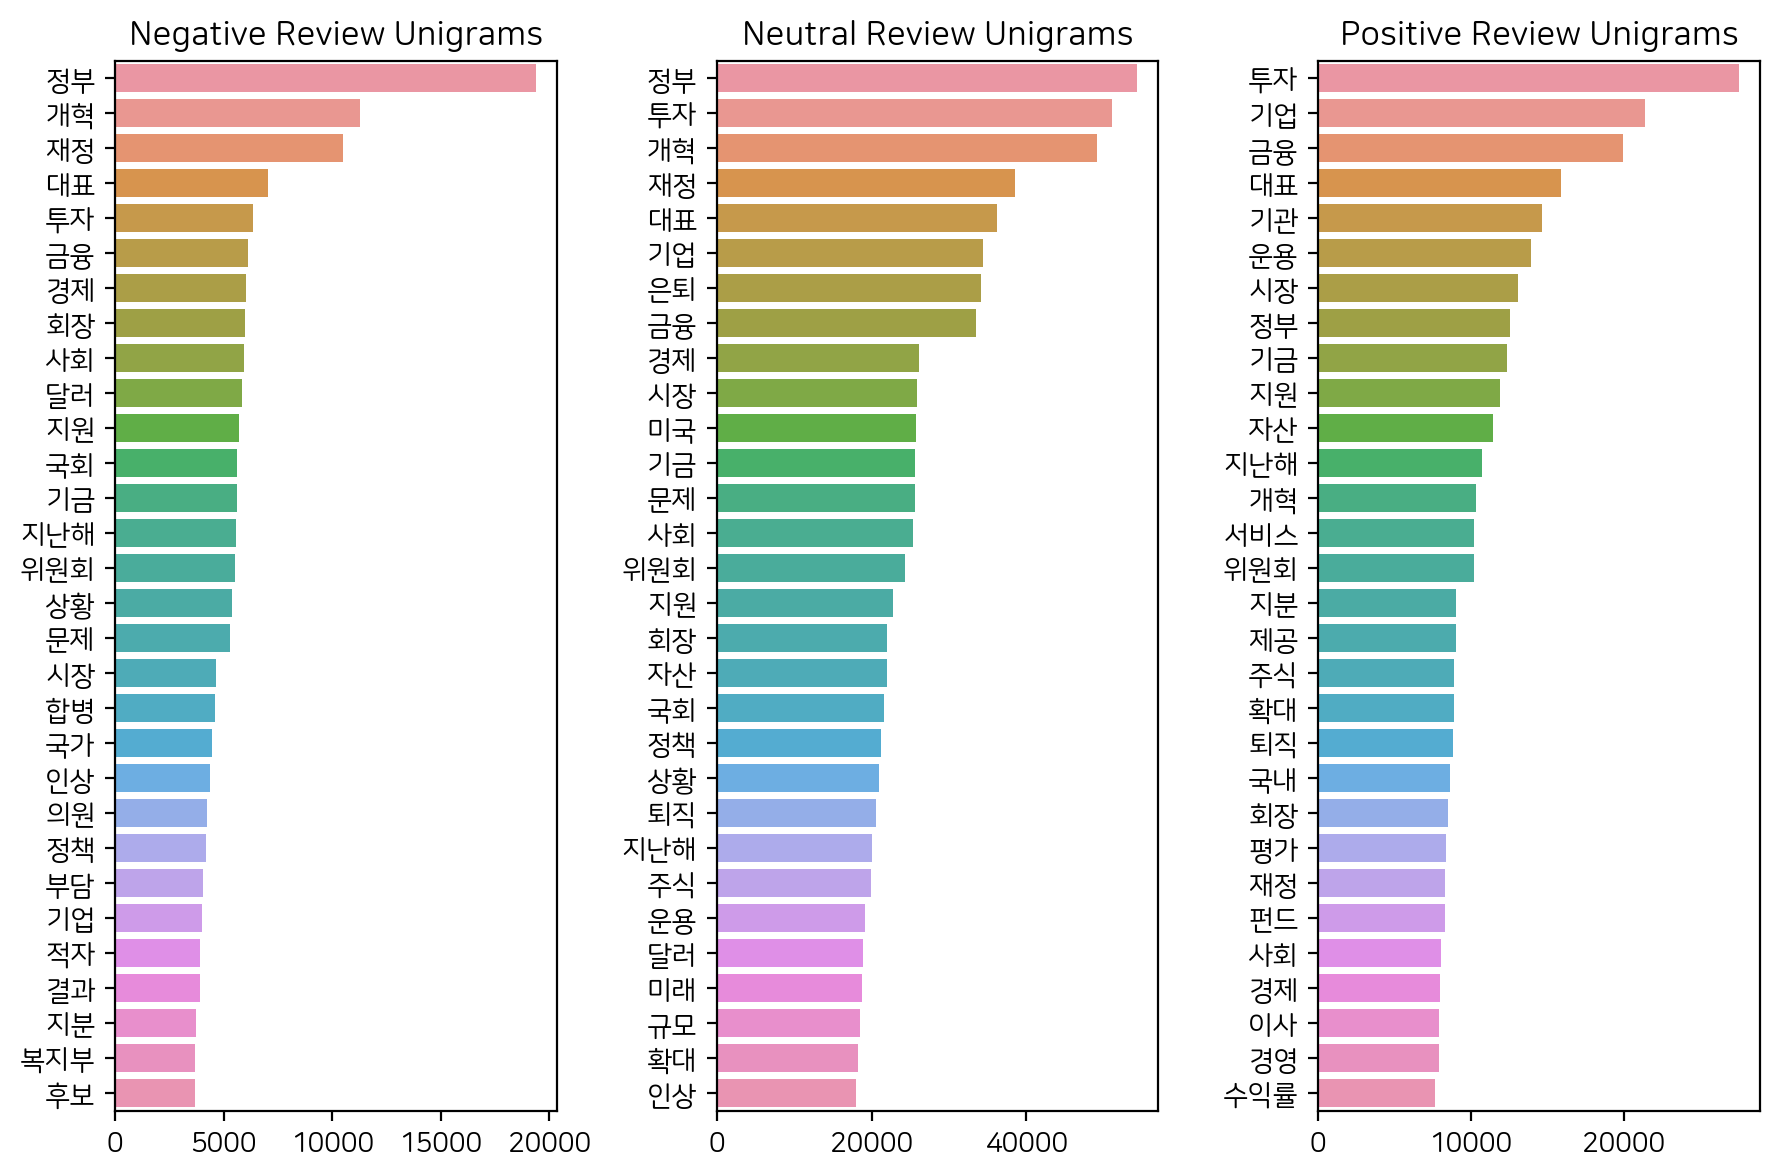

In [89]:
# 부정, 중립, 긍정 리뷰에 대한 Unigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 1)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 1)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 1)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Unigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')

# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

### Bigrams : 2개의 단어로 토큰화

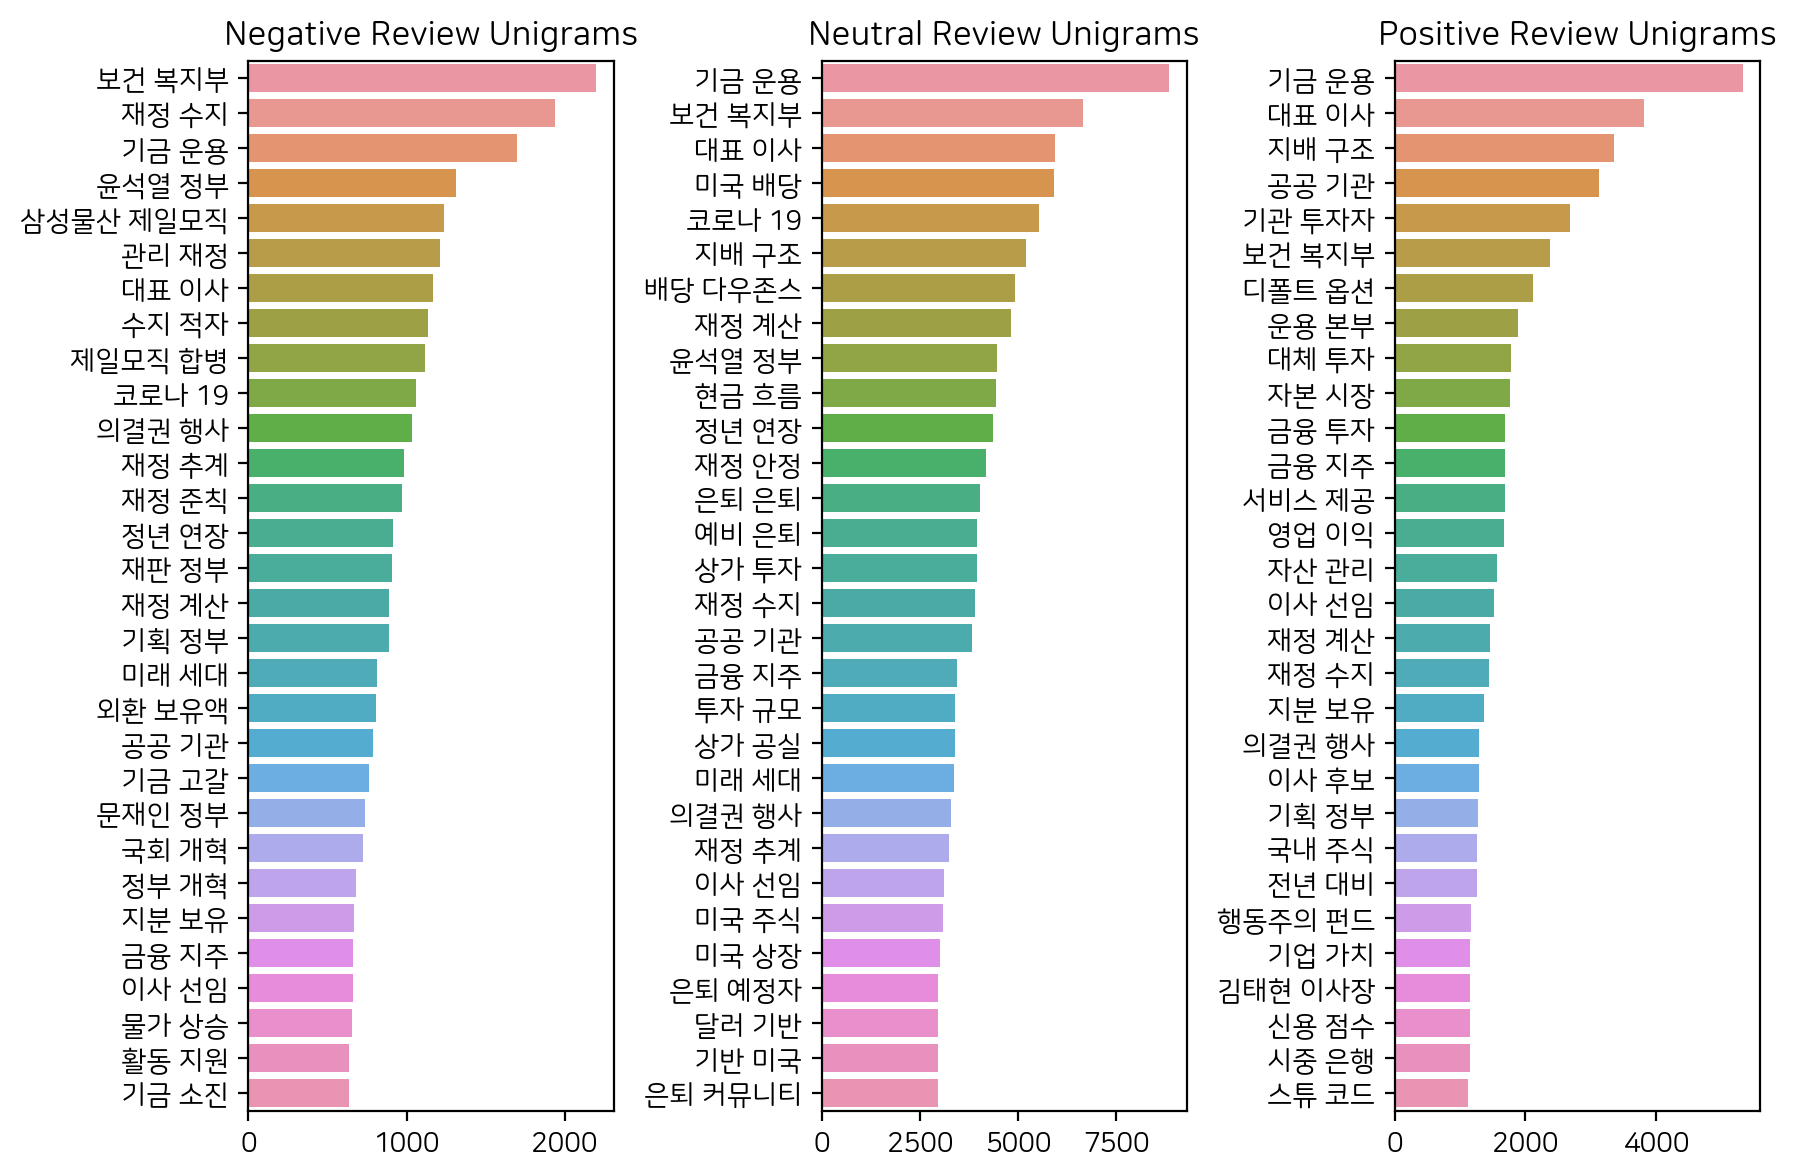

In [90]:
# 부정, 중립, 긍정 리뷰에 대한 Bigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 2)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 2)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 2)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Bigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')
'배포','금지','전재','무단'
# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

### trigrams : 3개의 단어로 토큰화

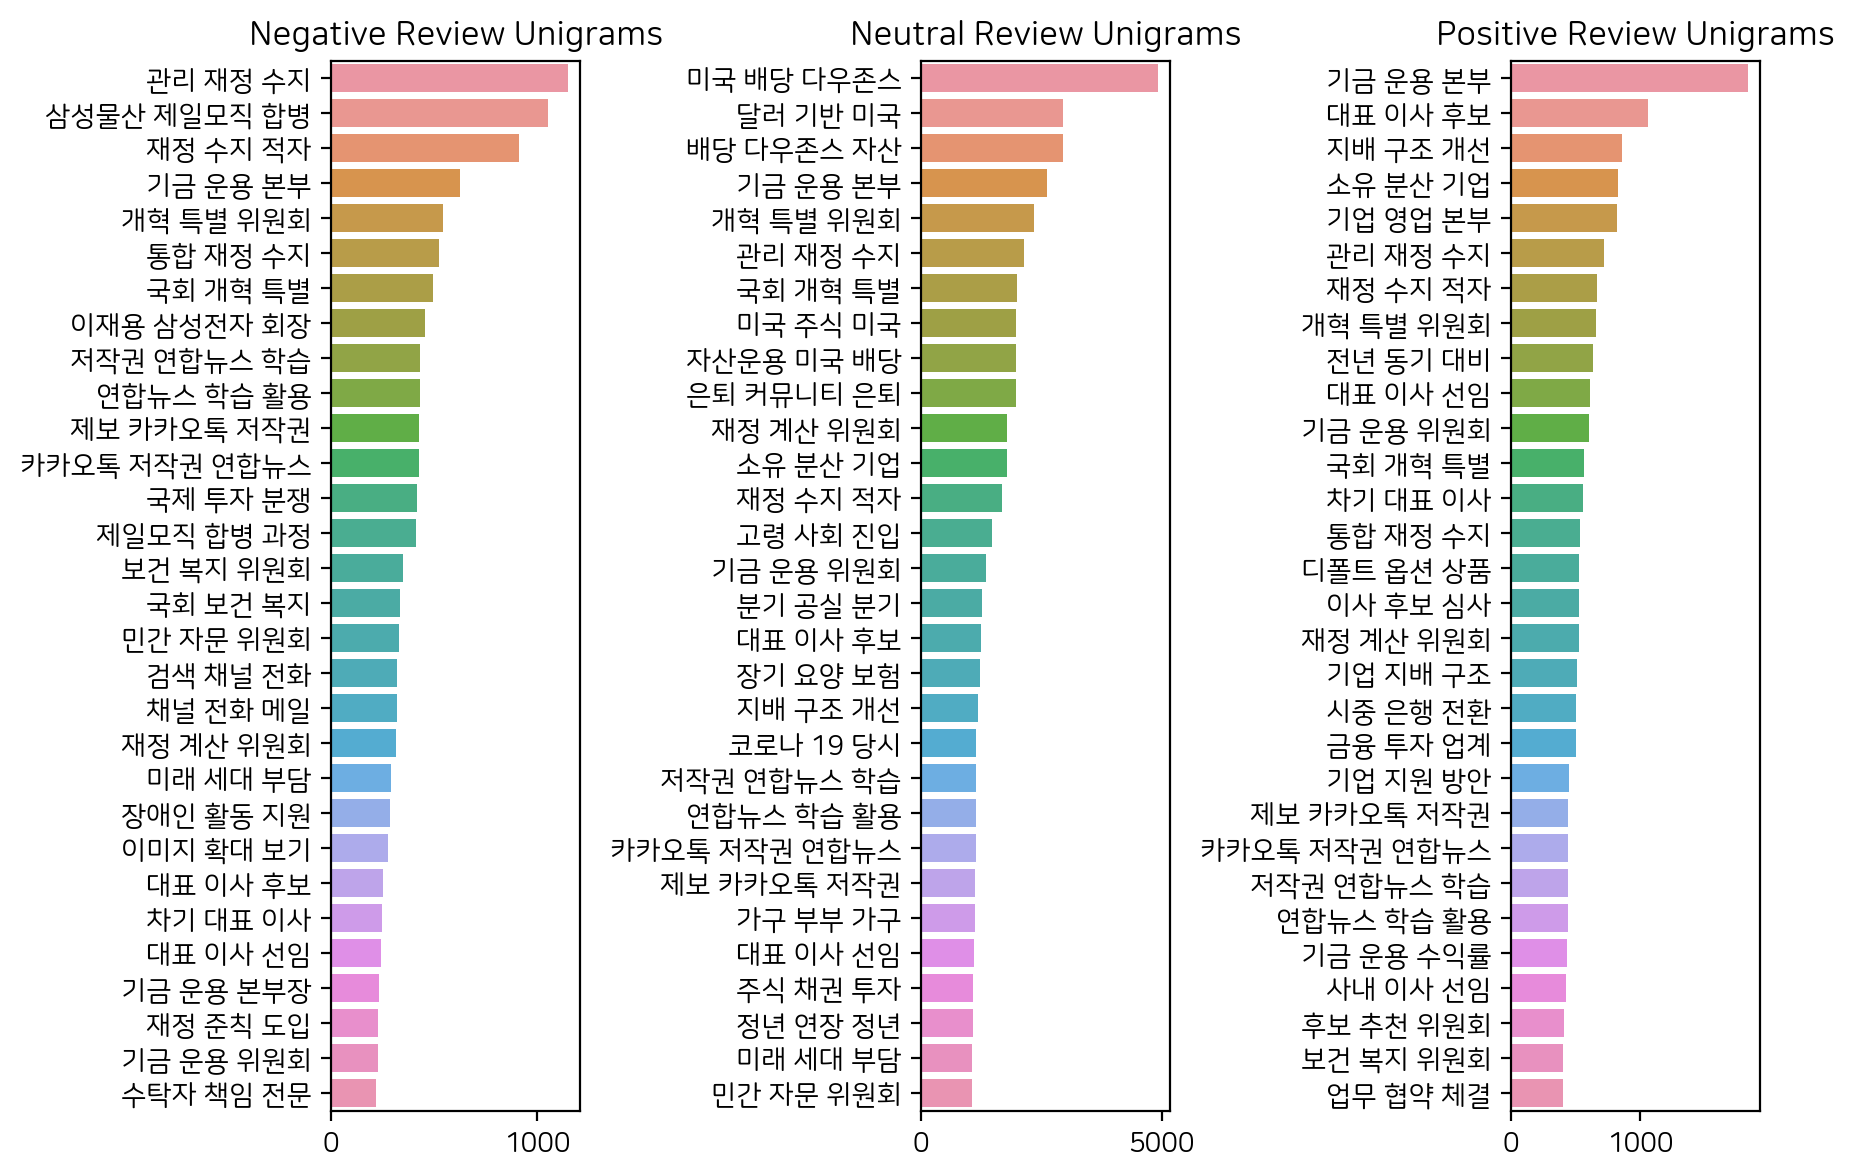

In [91]:
# 부정, 중립, 긍정 리뷰에 대한 Bigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 3)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 3)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 3)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Bigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')
'배포','금지','전재','무단'
# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

## Negativebionomial

### Hypothesis Testing : GLM

In [5]:
# 라이브러리 불러오기
import pandas as pd # 데이터 분석 및 조작을 위한 라이브러리
import numpy as np # 수학적 계산을 위한 라이브러리
import pickle # 객체 직렬화 및 역직렬화를 위한 라이브러리

from patsy import dmatrices # 통계 모델을 위한 모델 수식 생성을 지원하는 라이브러리
import statsmodels.api as sm # 통계 및 회귀 분석을 위한 라이브러리
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt # 데이터 시각화를 위한 라이브러리
import seaborn as sns # Matplotlib을 기반으로 한 시각화 라이브러리

from sklearn.metrics import mean_squared_error # 머신 러닝 및 데이터 분석을 위한 라이브러리
from sklearn.metrics import r2_score   # R-squares (결정계수)
from math import sqrt # 수학적 계산을 위한 라이브러리

In [6]:
# 파일 불러오기
file_path = './' # data가 저장된 파일 경로

In [ ]:
# 불러오기
f = open("../data/analysis_data/news/pension_news_불용어처리_emolex.pkl", "rb")
data1 = pickle.load(f)
f.close()

In [8]:
data1.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...            [실직, 지역, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 지역, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  \
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          0   
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          3   
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          0   
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          4   
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          4   

                                           sentiword  \
0  [가입, 가입, 지원, 전부, 확대, 부가, 연금, 신청, 지역, 준비, 시작, 보...   
1                                               [역할]   
2  [책임, 행동, 관리, 공기, 공기, 주장, 범위, 확대, 발표, 연금, 반대, 주...   
3  [능력, 이상, 가입, 인정, 토지, 추가, 지방, 가입, 인정, 인정, 양자, 나...   
4  [입장, 가입, 가입, 입장, 오후, 아가, 앞으로, 완화, 주장, 연금, 어려운,...   

                                 values  
0    [4, 17, 2, 4, 3, 14, 26, 5, 0, 12]  
1        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
2     [7, 7, 3, 5, 5, 13, 17, 0, 3, 14]  
3    [4, 10, 5, 6, 9, 20, 26, 9, 5, 18]  
4  [5, 14, 5, 11, 10, 18, 47, 7, 3, 30]

In [ ]:
# 불러오기
f = open("../data/analysis_data/news/pension_news_total_docs1.pkl", "rb")
data2 = pickle.load(f)
f.close()

In [4]:
data2.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc     ch  \
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  naver   
1                                 신혜선 인생은 길고 역할은 많아요  naver   
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  naver   
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  naver   
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  naver   

                                title_token_list_pos        title_token_noun  \
0  [(실직, NNG), (중, NNB), (지역, NNG), (가입자, NNG), (...            [실직, 지역, 지원]   
1  [(국민연금, NNP), (4월, NNP), (말, NNG), (수익률, NNP),...       [4월, 수익률, 전월, 악화]   
2  [(포착, NNG), (상식, NNP), (있, VV), (는, ETM), (정부,...  [포착, 상식, 정부, 건강보험, 책임]   
3  [(연금, NNP), (200, SN), (만원, NNP), (받, VV), (는,...            [피부, 9월, 보료]   
4  [(국민, NNG), (의, JKG), (힘, NNG), (연금, NNP), (토론...                   [토론회]   

                                      doc_token_noun  \
0  [보건, 복지부, 지역, 중단, 실직, 휴직, 예외자, 지원, 종합, 운영, 개선,...   
1                                           [인생, 역할]   
2  [집무실, 건강보험, 국가, 책임, 강화, 의료, 민영화, 기자회견, 공공, 운수,...   
3  [정부, 9월, 건강보험, 피부, 피부, 직장, 가족, 생계, 의존, 보료, 혜택,...   
4  [개혁, 방향, 주장, 제기, 정부, 개혁, 과제, 개혁, 이전, 정부, 안대, 비...   

                                  doc_token_list_pos  doc_topic  \
0  [(이데일리, NNP), (양희, NNP), (동, MM), (기자, NNG), (...          0   
1  [(신혜선, NNP), (인생, NNG), (은, JX), (길, VA), (고, ...          3   
2  [(30, SN), (일, NNB), (오전, NNP), (서울, NNP), (용산...          0   
3  [(정부, NNG), (가, JKS), (올해, NNG), (9월, NNP), (부...          4   
4  [(연금, NNP), (개혁, NNP), (방향, NNG), (더, MAG), (내...          4   

                                           sentiword  \
0  [개선, 기대, 높다, 능하고, 대상, 도움, 부담, 소득, 약한, 어려움, 어려움...   
1                                                 []   
2                                     [아니다, 전문가, 축하]   
3  [높은, 능력, 대상, 부담, 소득, 아니다, 없다, 인정, 제대로, 편안, 혜택,...   
4    [개선, 대상, 부담, 비판, 소득, 어려운, 없다, 자신감, 젊은, 좋을, 중요한]   

                                              values     score  
0  [2, 1, 1, 2, 1, 1, -2, 1, -1, -2, -2, 1, 1, 1,...  0.157895  
1                                                 []  0.000000  
2                                         [-2, 1, 2]  0.333333  
3            [1, 1, 1, -2, 1, -2, -1, 1, 1, 2, 1, 1]  0.416667  
4              [2, 1, -2, -1, 1, -2, -1, 1, 2, 2, 1]  0.363636

In [10]:
# 필요한 컬럼 선택하여 새로운 데이터프레임 'data' 생성
data = pd.DataFrame(dtype='int64')
data['title'] = data1['title']
data['doc'] = data1['doc']
data['score1'] = data2['score']

In [11]:
def max_index(lst):
    return lst.index(max(lst))

data['score2'] = data1['values'].apply(max_index)

In [12]:
data.head()

title  \
0     실직 중 지역가입자국민연금 보험료 50최대 12개월 지원   
1            국민연금 4월 말 수익률 379전월보다 악화   
2     포착 상식 있는 정부라면 건강보험국민연금 책임부터 다해야   
3  연금 200만원 받는 70대 피부양자 9월부턴 건보료 낸다얼마   
4        국민의힘 연금 토론회 국민연금 더 내고 늦게 받아야   

                                                 doc    score1  score2  
0  이데일리 양희동 기자 보건복지부는 다음달 1일부터 국민연금 지역가입자 중 사업중단실...  0.157895       6  
1                                 신혜선 인생은 길고 역할은 많아요  0.000000       0  
2  30일 오전 서울 용산 대통령 집무실 앞에서 열린 국민연금건강보험 국가 책임 강화 ...  0.333333       6  
3  정부가 올해 9월부터 소득이 많은데도 보험료를 내지 않는 건강보험 피부양자 27만3...  0.416667       6  
4  연금개혁 방향 더 내고 늦게 받아야 주장 제기국민의힘  정부 3대 개혁 과제로 연금...  0.363636       6